In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
import scipy.stats as stats
from scipy.stats import norm, skew, kurtosis, f_oneway, pearsonr, spearmanr, shapiro, anderson


In [ ]:
df = pd.read_csv('app/ai_service/src/data/raw/zomato.csv')
print(f"Dataset Shape: {df.shape}")
print(f"Total Restaurants: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
df.head(10)

Dataset Shape: (51717, 17)
Total Restaurants: 51,717
Total Features: 17


url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   
5  https://www.zomato.com/bangalore/timepass-dinn...   
6  https://www.zomato.com/bangalore/rosewood-inte...   
7  https://www.zomato.com/bangalore/onesta-banash...   
8  https://www.zomato.com/bangalore/penthouse-caf...   
9  https://www.zomato.com/bangalore/smacznego-ban...   

                                             address  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2  1112, Next to KIMS Medical College, 17th Cross...   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6  19/1, New Timberyard Layout, Beside Satellite ...   
7  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                              name online_order book_table  \
0                                            Jalsa          Yes        Yes   
1                                   Spice Elephant          Yes         No   
2                                  San Churro Cafe          Yes         No   
3                            Addhuri Udupi Bhojana           No         No   
4                                    Grand Village           No         No   
5                                  Timepass Dinner          Yes         No   
6  Rosewood International Hotel - Bar & Restaurant           No         No   
7                                           Onesta          Yes        Yes   
8                                   Penthouse Cafe          Yes         No   
9                                        Smacznego          Yes         No   

    rate  votes                             phone      location  \
0  4.1/5    775    080 42297555\r\n+91 9743772233  Banashankari   
1  4.1/5    787                      080 41714161  Banashankari   
2  3.8/5    918                    +91 9663487993  Banashankari   
3  3.7/5     88                    +91 9620009302  Banashankari   
4  3.8/5    166  +91 8026612447\r\n+91 9901210005  Basavanagudi   
5  3.8/5    286  +91 9980040002\r\n+91 9980063005  Basavanagudi   
6  3.6/5      8    +91 9731716688\r\n080 26740366   Mysore Road   
7  4.6/5   2556      080 48653961\r\n080 48655715  Banashankari   
8  4.0/5    324  +91 8884135549\r\n+91 9449449316  Banashankari   
9  4.2/5    504  +91 9945230807\r\n+91 9743804471  Banashankari   

             rest_type                                         dish_liked  \
0        Casual Dining  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3          Quick Bites                                        Masala Dosa   
4        Casual Dining                                Panipuri, Gol Gappe   
5        Casual Dining  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
6        Casual Dining                                                NaN   
7  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
8                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
9                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   

                                      cuisines approx_cost(for two people)  \
0               North Indian, Mughlai, Chinese                         800   
1                  Chinese, North Indian, Thai                         800   
2                       Cafe, Mexican, Italian                         800   
3                   South Indian, North Indian            

In [34]:

df['rate_clean'] = df['rate'].str.replace('/5', '').str.strip()
df['rate_clean'] = pd.to_numeric(df['rate_clean'], errors='coerce')
df['cost_clean'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '')
df['cost_clean'] = pd.to_numeric(df['cost_clean'], errors='coerce')
df['cost_category'] = pd.cut(df['cost_clean'], bins=[0, 300, 800, 1500, float('inf')], labels=['Budget', 'Mid-range', 'Premium', 'Luxury'])
df['rating_category'] = pd.cut(df['rate_clean'], bins=[0, 3.0, 3.5, 4.0, 4.5, 5.0],labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])

print(f"Missing values in rate: {df['rate_clean'].isnull().sum():,} ({df['rate_clean'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Missing values in cost: {df['cost_clean'].isnull().sum():,} ({df['cost_clean'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Missing values in dish_liked: {df['dish_liked'].isnull().sum():,} ({df['dish_liked'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Average Rating: {df['rate_clean'].mean():.2f}/5")
print(f"Average Cost: ₹{df['cost_clean'].mean():.0f}")

Missing values in rate: 10,052 (19.4%)
Missing values in cost: 346 (0.7%)
Missing values in dish_liked: 28,078 (54.3%)
Average Rating: 3.70/5
Average Cost: ₹555


In [35]:
print("=" * 60)

summary_stats = pd.DataFrame({
    'Rating': [
        df['rate_clean'].count(),
        df['rate_clean'].mean(),
        df['rate_clean'].median(),
        df['rate_clean'].std(),
        df['rate_clean'].min(),
        df['rate_clean'].max(),
        skew(df['rate_clean'].dropna()),
        kurtosis(df['rate_clean'].dropna())
    ],
    'Cost': [
        df['cost_clean'].count(),
        df['cost_clean'].mean(),
        df['cost_clean'].median(),
        df['cost_clean'].std(),
        df['cost_clean'].min(),
        df['cost_clean'].max(),
        skew(df['cost_clean'].dropna()),
        kurtosis(df['cost_clean'].dropna())
    ],
    'Votes': [
        df['votes'].count(),
        df['votes'].mean(),
        df['votes'].median(),
        df['votes'].std(),
        df['votes'].min(),
        df['votes'].max(),
        skew(df['votes']),
        kurtosis(df['votes'])
    ]
}, index=['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Skewness', 'Kurtosis'])

print(summary_stats.round(3))

correlation_matrix = df[['rate_clean', 'cost_clean', 'votes']].corr()
print(correlation_matrix.round(3))

print("Pearson Correlation Tests (with p-values):")
for i, col1 in enumerate(['rate_clean', 'cost_clean', 'votes']):
    for j, col2 in enumerate(['rate_clean', 'cost_clean', 'votes']):
        if i < j:
            valid_data = df[[col1, col2]].dropna()
            if len(valid_data) > 2:
                corr, p_val = stats.pearsonr(valid_data[col1], valid_data[col2])
                significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else ""
                print(f"  {col1} vs {col2}: r = {corr:.3f}, p = {p_val:.3e} {significance}")

print(f"Missing values in rate: {df['rate_clean'].isnull().sum():,} ({df['rate_clean'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Missing values in cost: {df['cost_clean'].isnull().sum():,} ({df['cost_clean'].isnull().sum()/len(df)*100:.1f}%)")
print(f"Missing values in dish_liked: {df['dish_liked'].isnull().sum():,} ({df['dish_liked'].isnull().sum()/len(df)*100:.1f}%)")

Q1_rating, Q3_rating = df['rate_clean'].quantile([0.25, 0.75])
IQR_rating = Q3_rating - Q1_rating
outliers_rating = ((df['rate_clean'] < (Q1_rating - 1.5 * IQR_rating)) | (df['rate_clean'] > (Q3_rating + 1.5 * IQR_rating))).sum()
print(f"Rating outliers (IQR method): {outliers_rating:,} ({outliers_rating/len(df)*100:.1f}%)")

Q1_cost, Q3_cost = df['cost_clean'].quantile([0.25, 0.75])
IQR_cost = Q3_cost - Q1_cost
outliers_cost = ((df['cost_clean'] < (Q1_cost - 1.5 * IQR_cost)) | (df['cost_clean'] > (Q3_cost + 1.5 * IQR_cost))).sum()
print(f"Cost outliers (IQR method): {outliers_cost:,} ({outliers_cost/len(df)*100:.1f}%)")

             Rating       Cost      Votes
Count     41665.000  51371.000  51717.000
Mean          3.700    555.432    283.698
Median        3.700    400.000     41.000
Std Dev       0.441    438.851    803.839
Min           1.800     40.000      0.000
Max           4.900   6000.000  16832.000
Skewness     -0.329      2.602      7.548
Kurtosis     -0.008     10.449     88.858
            rate_clean  cost_clean  votes
rate_clean       1.000       0.385  0.434
cost_clean       0.385       1.000  0.382
votes            0.434       0.382  1.000
Pearson Correlation Tests (with p-values):
  rate_clean vs cost_clean: r = 0.385, p = 0.000e+00 ***
  rate_clean vs votes: r = 0.434, p = 0.000e+00 ***
  cost_clean vs votes: r = 0.382, p = 0.000e+00 ***
Missing values in rate: 10,052 (19.4%)
Missing values in cost: 346 (0.7%)
Missing values in dish_liked: 28,078 (54.3%)
Rating outliers (IQR method): 187 (0.4%)
Cost outliers (IQR method): 4,764 (9.2%)


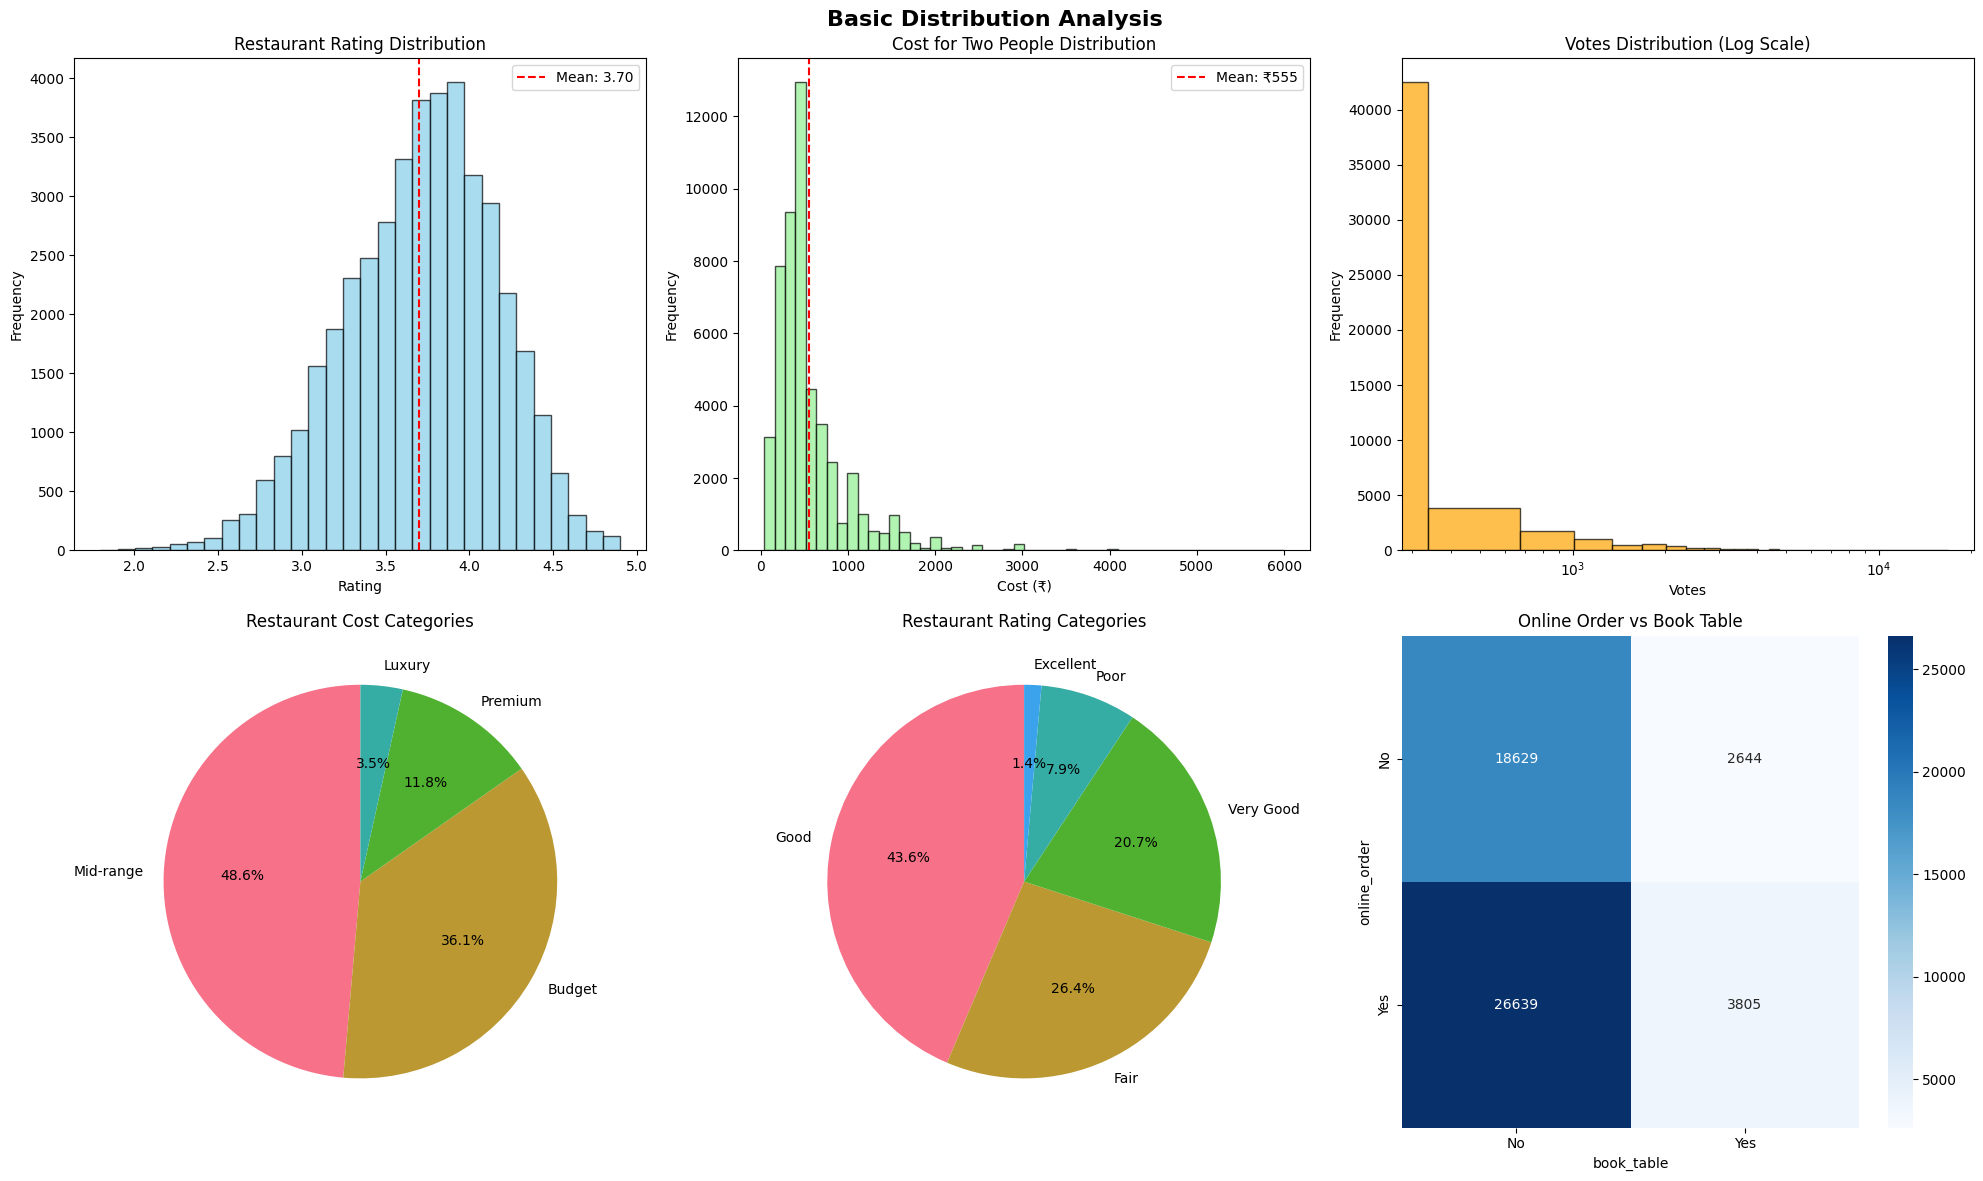

In [36]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Basic Distribution Analysis', fontsize=16, fontweight='bold')
axes[0, 0].hist(df['rate_clean'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Restaurant Rating Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['rate_clean'].mean(), color='red', linestyle='--', label=f'Mean: {df["rate_clean"].mean():.2f}')
axes[0, 0].legend()
axes[0, 1].hist(df['cost_clean'].dropna(), bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Cost for Two People Distribution')
axes[0, 1].set_xlabel('Cost (₹)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].axvline(df['cost_clean'].mean(), color='red', linestyle='--',label=f'Mean: ₹{df["cost_clean"].mean():.0f}')
axes[0, 1].legend()
axes[0, 2].hist(df['votes'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].set_title('Votes Distribution (Log Scale)')
axes[0, 2].set_xlabel('Votes')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_xscale('log')
cost_counts = df['cost_category'].value_counts()
axes[1, 0].pie(cost_counts.values, labels=cost_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Restaurant Cost Categories')
rating_counts = df['rating_category'].value_counts()
axes[1, 1].pie(rating_counts.values, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Restaurant Rating Categories')
cross_tab = pd.crosstab(df['online_order'], df['book_table'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', ax=axes[1, 2])
axes[1, 2].set_title('Online Order vs Book Table')
plt.tight_layout()
plt.show()

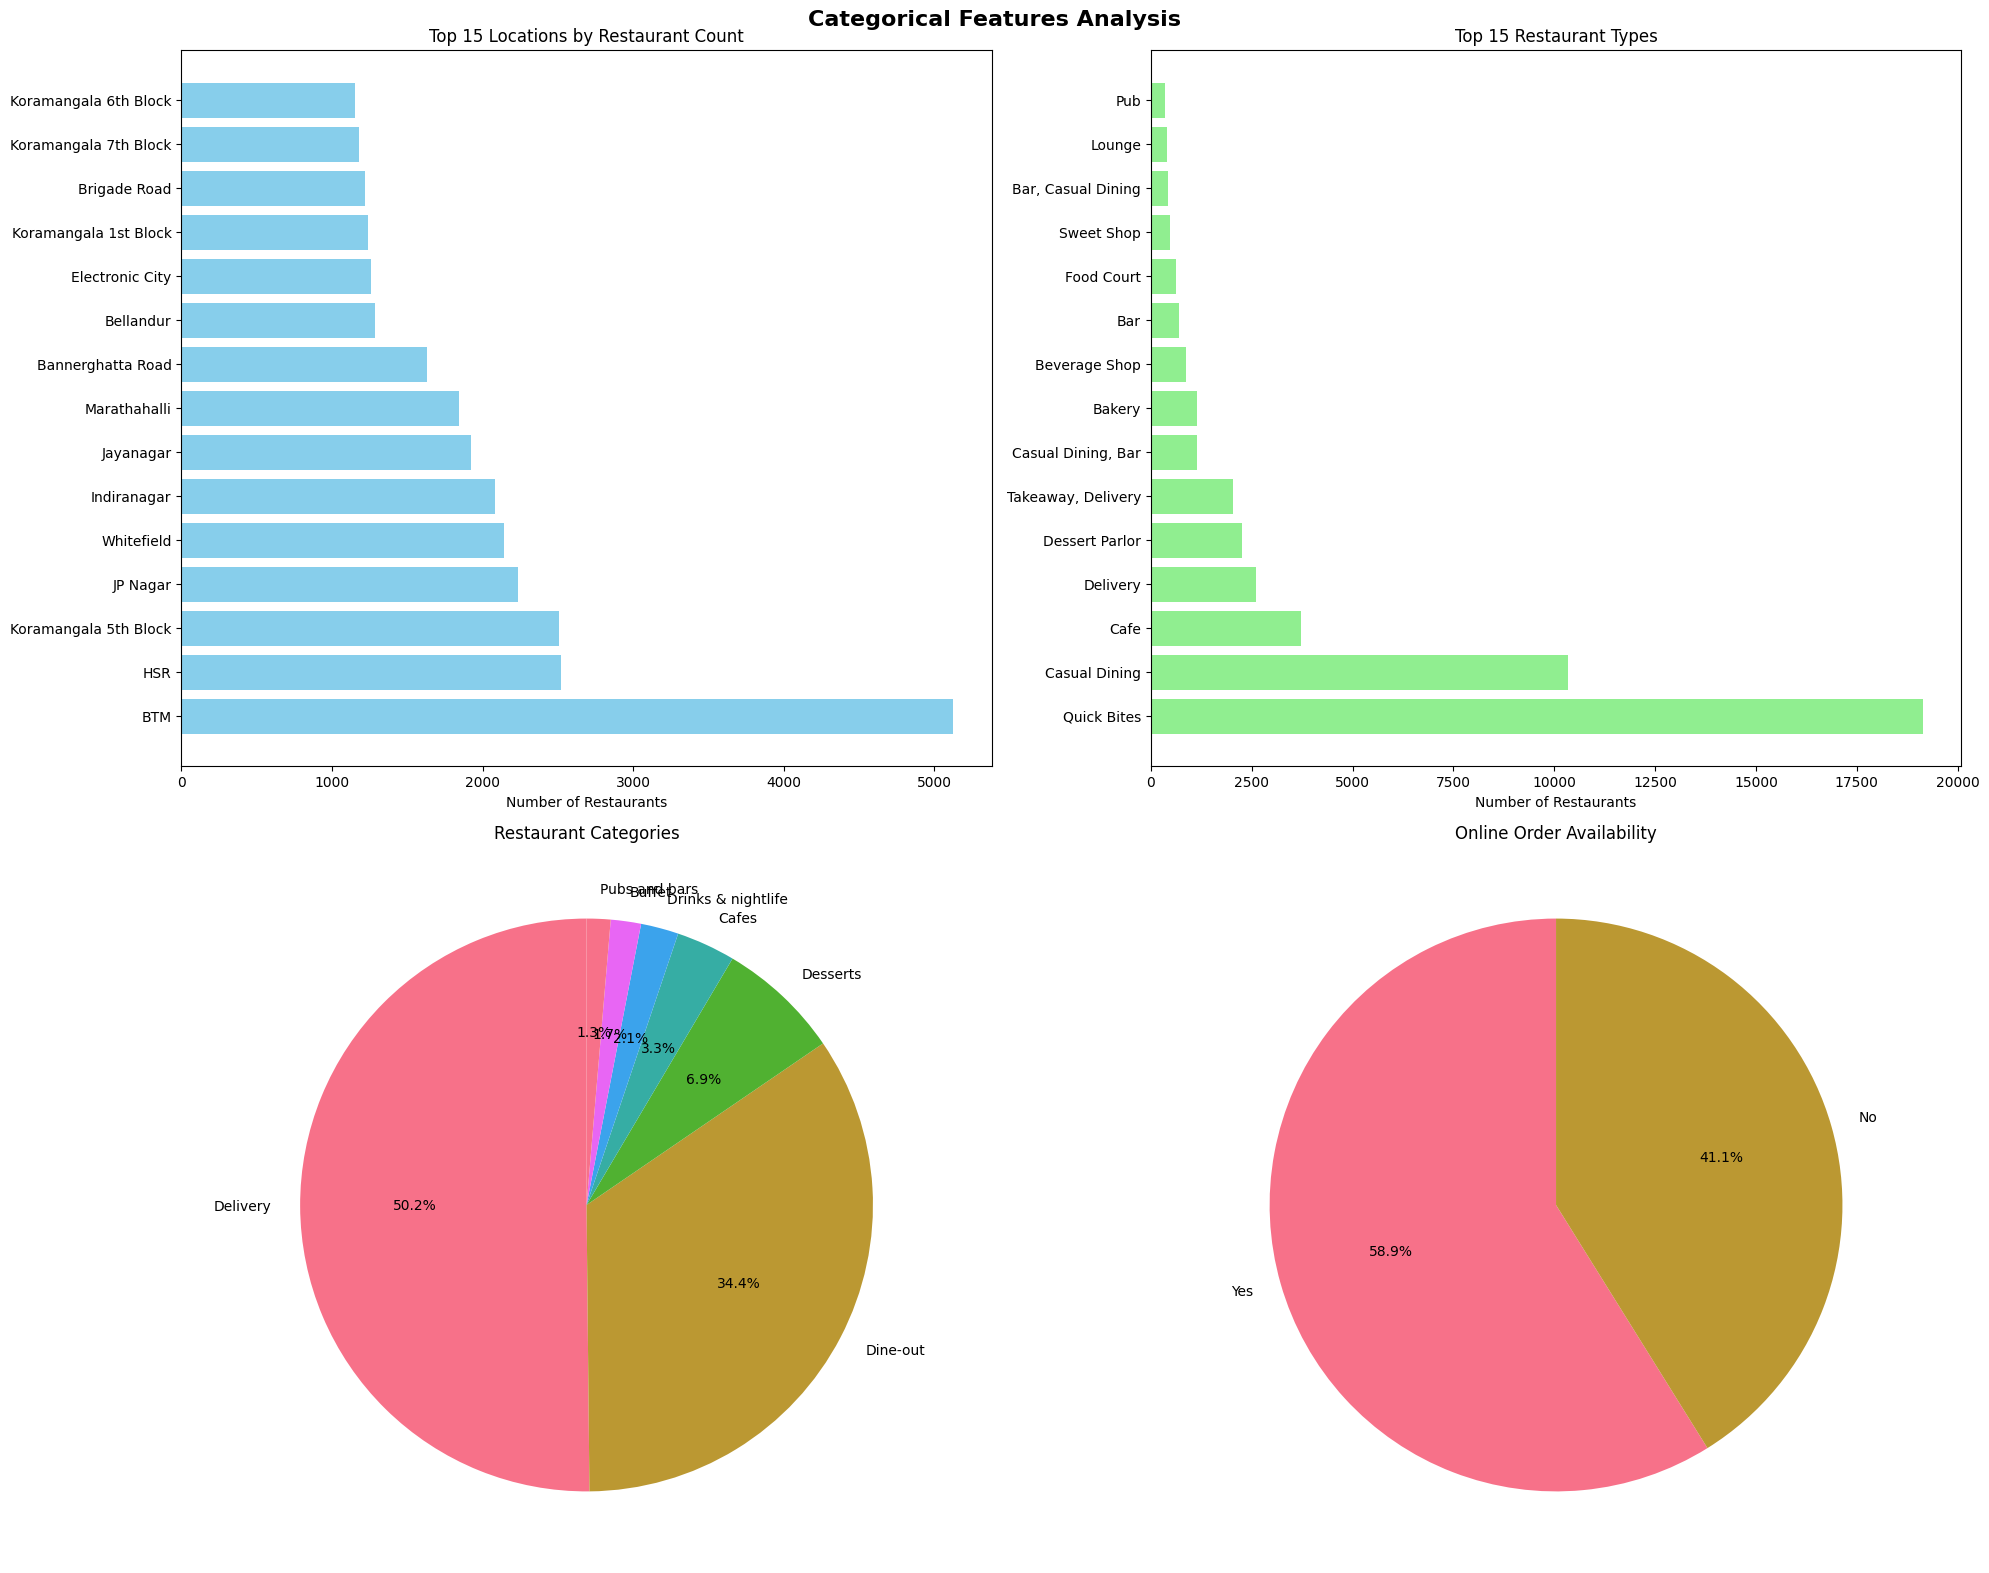

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Categorical Features Analysis', fontsize=16, fontweight='bold')
top_locations = df['location'].value_counts().head(15)
axes[0, 0].barh(range(len(top_locations)), top_locations.values, color='skyblue')
axes[0, 0].set_yticks(range(len(top_locations)))
axes[0, 0].set_yticklabels(top_locations.index)
axes[0, 0].set_title('Top 15 Locations by Restaurant Count')
axes[0, 0].set_xlabel('Number of Restaurants')
top_types = df['rest_type'].value_counts().head(15)
axes[0, 1].barh(range(len(top_types)), top_types.values, color='lightgreen')
axes[0, 1].set_yticks(range(len(top_types)))
axes[0, 1].set_yticklabels(top_types.index)
axes[0, 1].set_title('Top 15 Restaurant Types')
axes[0, 1].set_xlabel('Number of Restaurants')
listed_type_counts = df['listed_in(type)'].value_counts()
axes[1, 0].pie(listed_type_counts.values, labels=listed_type_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Restaurant Categories')
online_counts = df['online_order'].value_counts()
axes[1, 1].pie(online_counts.values, labels=online_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Online Order Availability')

plt.tight_layout()
plt.show()

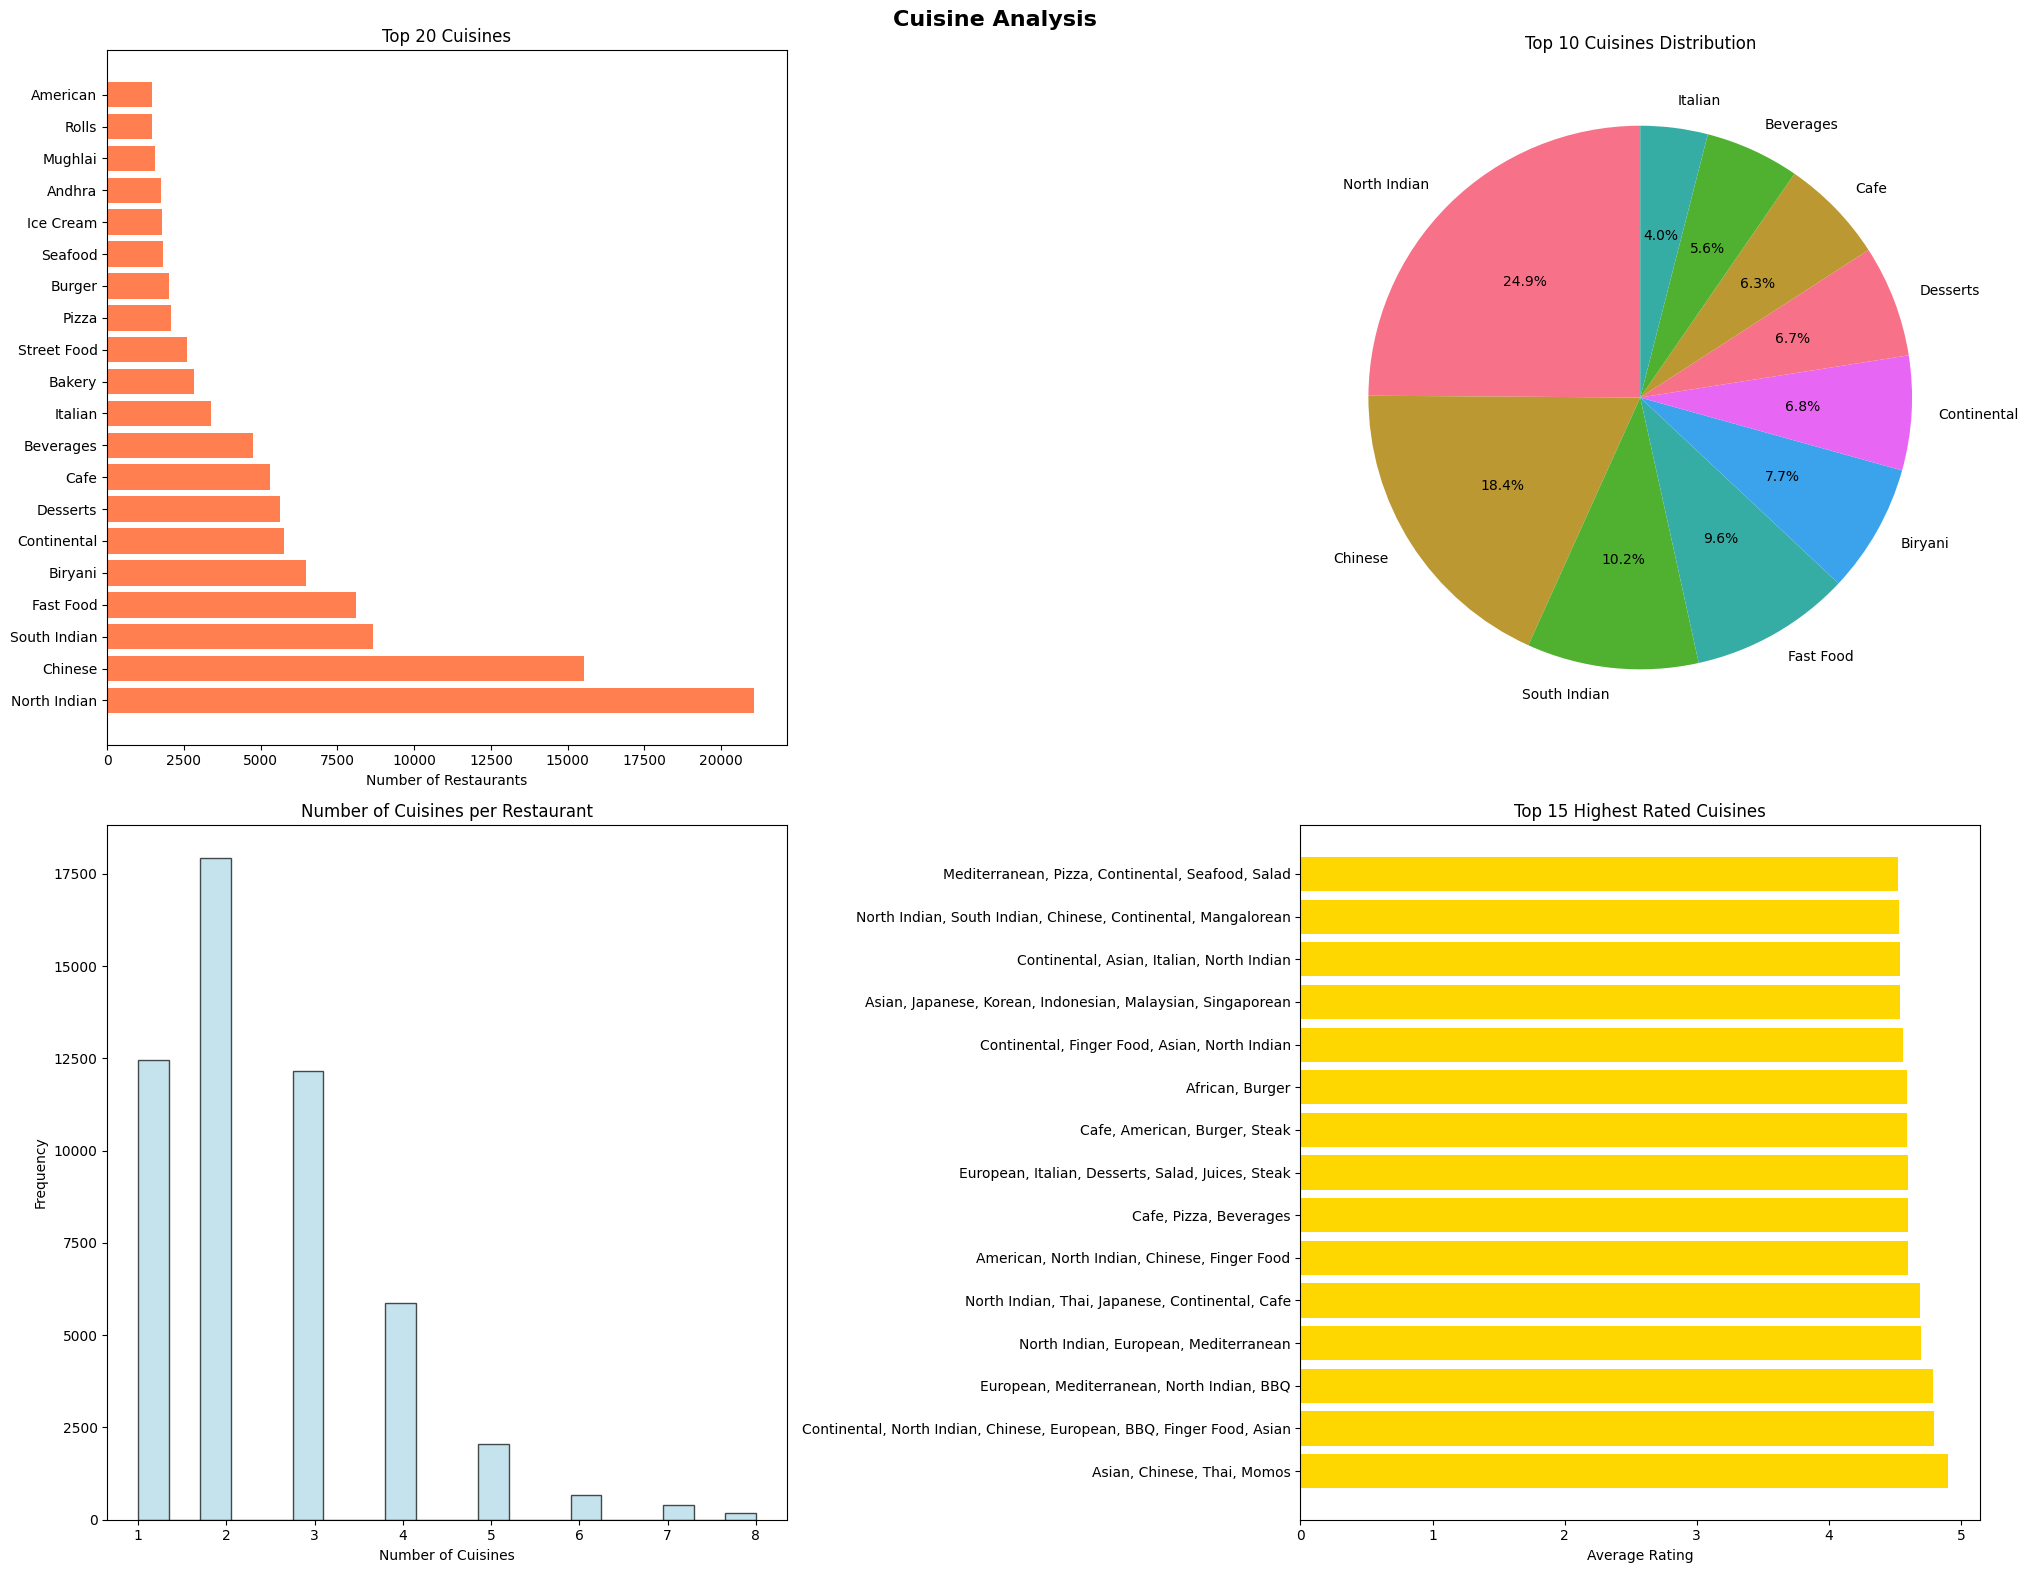

In [38]:
all_cuisines = []
for cuisines in df['cuisines'].dropna():
    if isinstance(cuisines, str):
        all_cuisines.extend([c.strip() for c in cuisines.split(',')])

cuisine_counts = pd.Series(all_cuisines).value_counts()

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Cuisine Analysis', fontsize=16, fontweight='bold')

top_cuisines = cuisine_counts.head(20)
axes[0, 0].barh(range(len(top_cuisines)), top_cuisines.values, color='coral')
axes[0, 0].set_yticks(range(len(top_cuisines)))
axes[0, 0].set_yticklabels(top_cuisines.index)
axes[0, 0].set_title('Top 20 Cuisines')
axes[0, 0].set_xlabel('Number of Restaurants')

top_10_cuisines = cuisine_counts.head(10)
axes[0, 1].pie(top_10_cuisines.values, labels=top_10_cuisines.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Top 10 Cuisines Distribution')

cuisine_per_restaurant = df['cuisines'].str.count(',').fillna(0) + 1
axes[1, 0].hist(cuisine_per_restaurant, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[1, 0].set_title('Number of Cuisines per Restaurant')
axes[1, 0].set_xlabel('Number of Cuisines')
axes[1, 0].set_ylabel('Frequency')
cuisine_rating = df.groupby('cuisines')['rate_clean'].agg(['mean', 'count']).reset_index()
cuisine_rating = cuisine_rating[cuisine_rating['count'] >= 10]
top_rated_cuisines = cuisine_rating.nlargest(15, 'mean')
axes[1, 1].barh(range(len(top_rated_cuisines)), top_rated_cuisines['mean'], color='gold')
axes[1, 1].set_yticks(range(len(top_rated_cuisines)))
axes[1, 1].set_yticklabels(top_rated_cuisines['cuisines'])
axes[1, 1].set_title('Top 15 Highest Rated Cuisines')
axes[1, 1].set_xlabel('Average Rating')

plt.tight_layout()
plt.show()

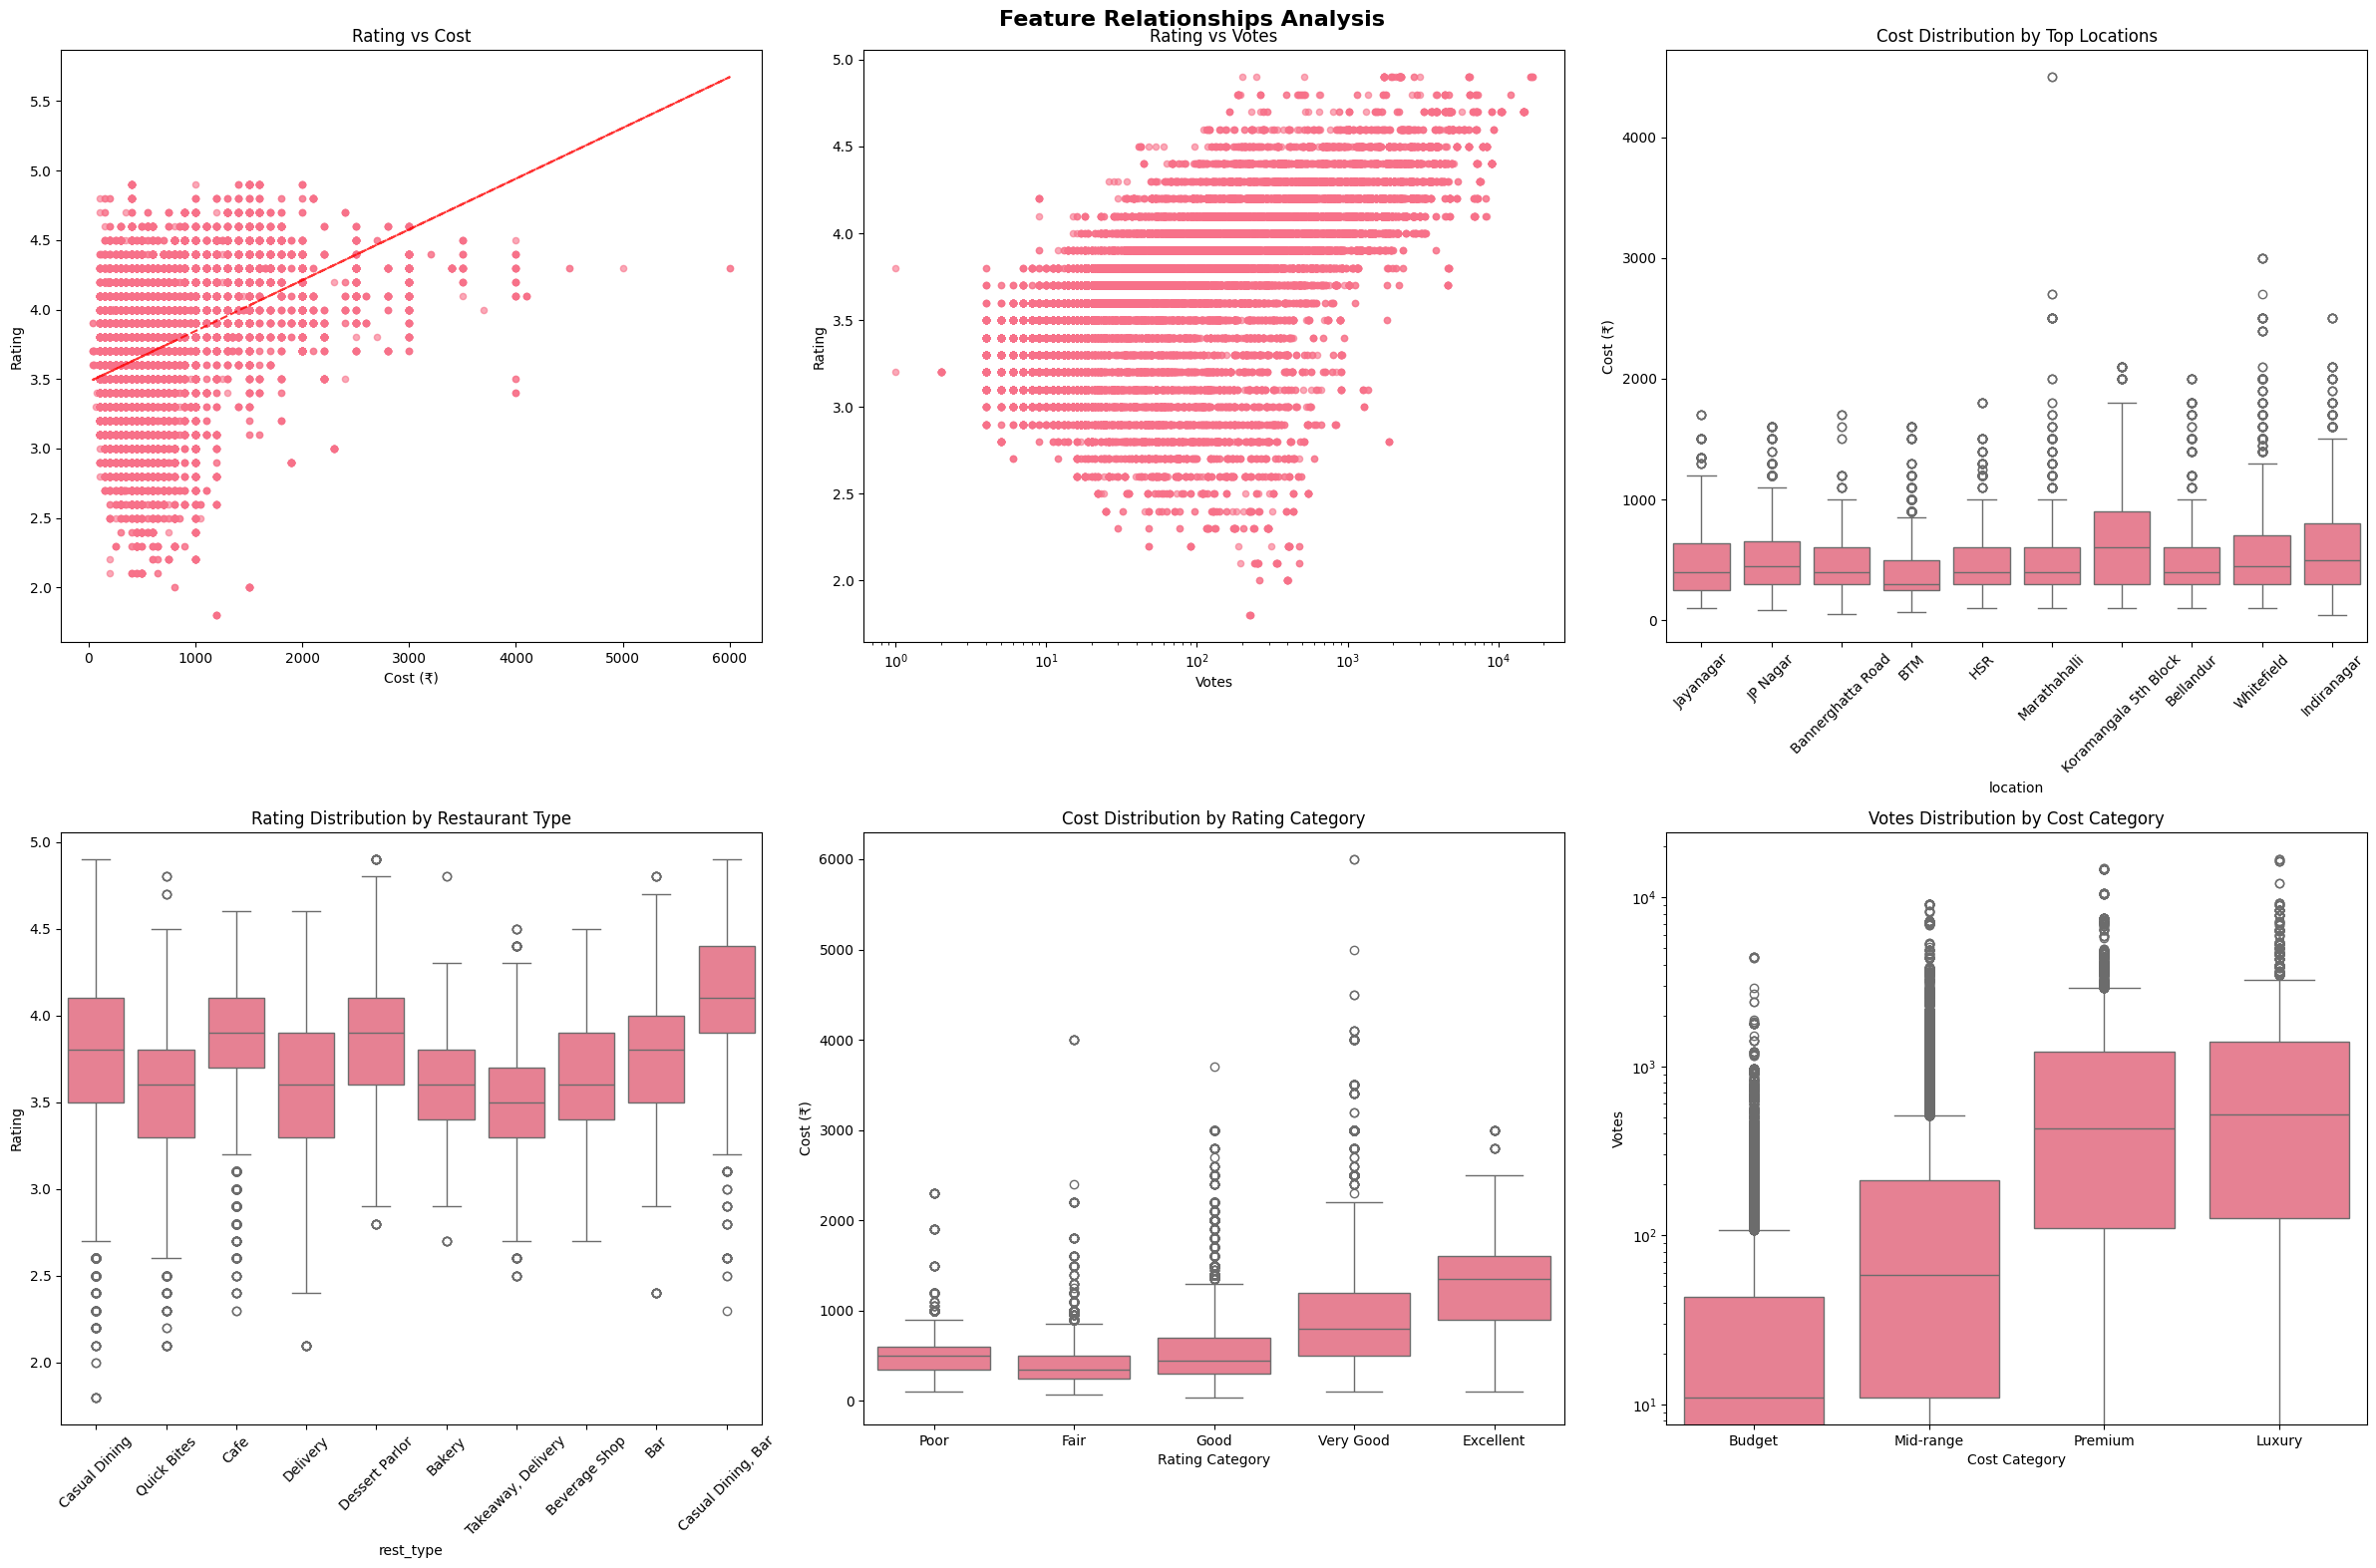

In [39]:

fig, axes = plt.subplots(2, 3, figsize=(24, 16))
fig.suptitle('Feature Relationships Analysis', fontsize=16, fontweight='bold')
axes[0, 0].scatter(df['cost_clean'], df['rate_clean'], alpha=0.6, s=20)
axes[0, 0].set_xlabel('Cost (₹)')
axes[0, 0].set_ylabel('Rating')
axes[0, 0].set_title('Rating vs Cost')
valid_data = df[['cost_clean', 'rate_clean']].dropna()
if len(valid_data) > 0:
    z = np.polyfit(valid_data['cost_clean'], valid_data['rate_clean'], 1)
    p = np.poly1d(z)
    axes[0, 0].plot(valid_data['cost_clean'], p(valid_data['cost_clean']), "r--", alpha=0.8)
axes[0, 1].scatter(df['votes'], df['rate_clean'], alpha=0.6, s=20)
axes[0, 1].set_xlabel('Votes')
axes[0, 1].set_ylabel('Rating')
axes[0, 1].set_title('Rating vs Votes')
axes[0, 1].set_xscale('log')
top_locations = df['location'].value_counts().head(10).index
location_cost_data = df[df['location'].isin(top_locations)]
sns.boxplot(data=location_cost_data, x='location', y='cost_clean', ax=axes[0, 2])
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), rotation=45)
axes[0, 2].set_title('Cost Distribution by Top Locations')
axes[0, 2].set_ylabel('Cost (₹)')
top_types = df['rest_type'].value_counts().head(10).index
type_rating_data = df[df['rest_type'].isin(top_types)]
sns.boxplot(data=type_rating_data, x='rest_type', y='rate_clean', ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
axes[1, 0].set_title('Rating Distribution by Restaurant Type')
axes[1, 0].set_ylabel('Rating')
sns.boxplot(data=df, x='rating_category', y='cost_clean', ax=axes[1, 1])
axes[1, 1].set_title('Cost Distribution by Rating Category')
axes[1, 1].set_ylabel('Cost (₹)')
axes[1, 1].set_xlabel('Rating Category')
sns.boxplot(data=df, x='cost_category', y='votes', ax=axes[1, 2])
axes[1, 2].set_title('Votes Distribution by Cost Category')
axes[1, 2].set_ylabel('Votes')
axes[1, 2].set_xlabel('Cost Category')
axes[1, 2].set_yscale('log')

plt.tight_layout()
plt.show()

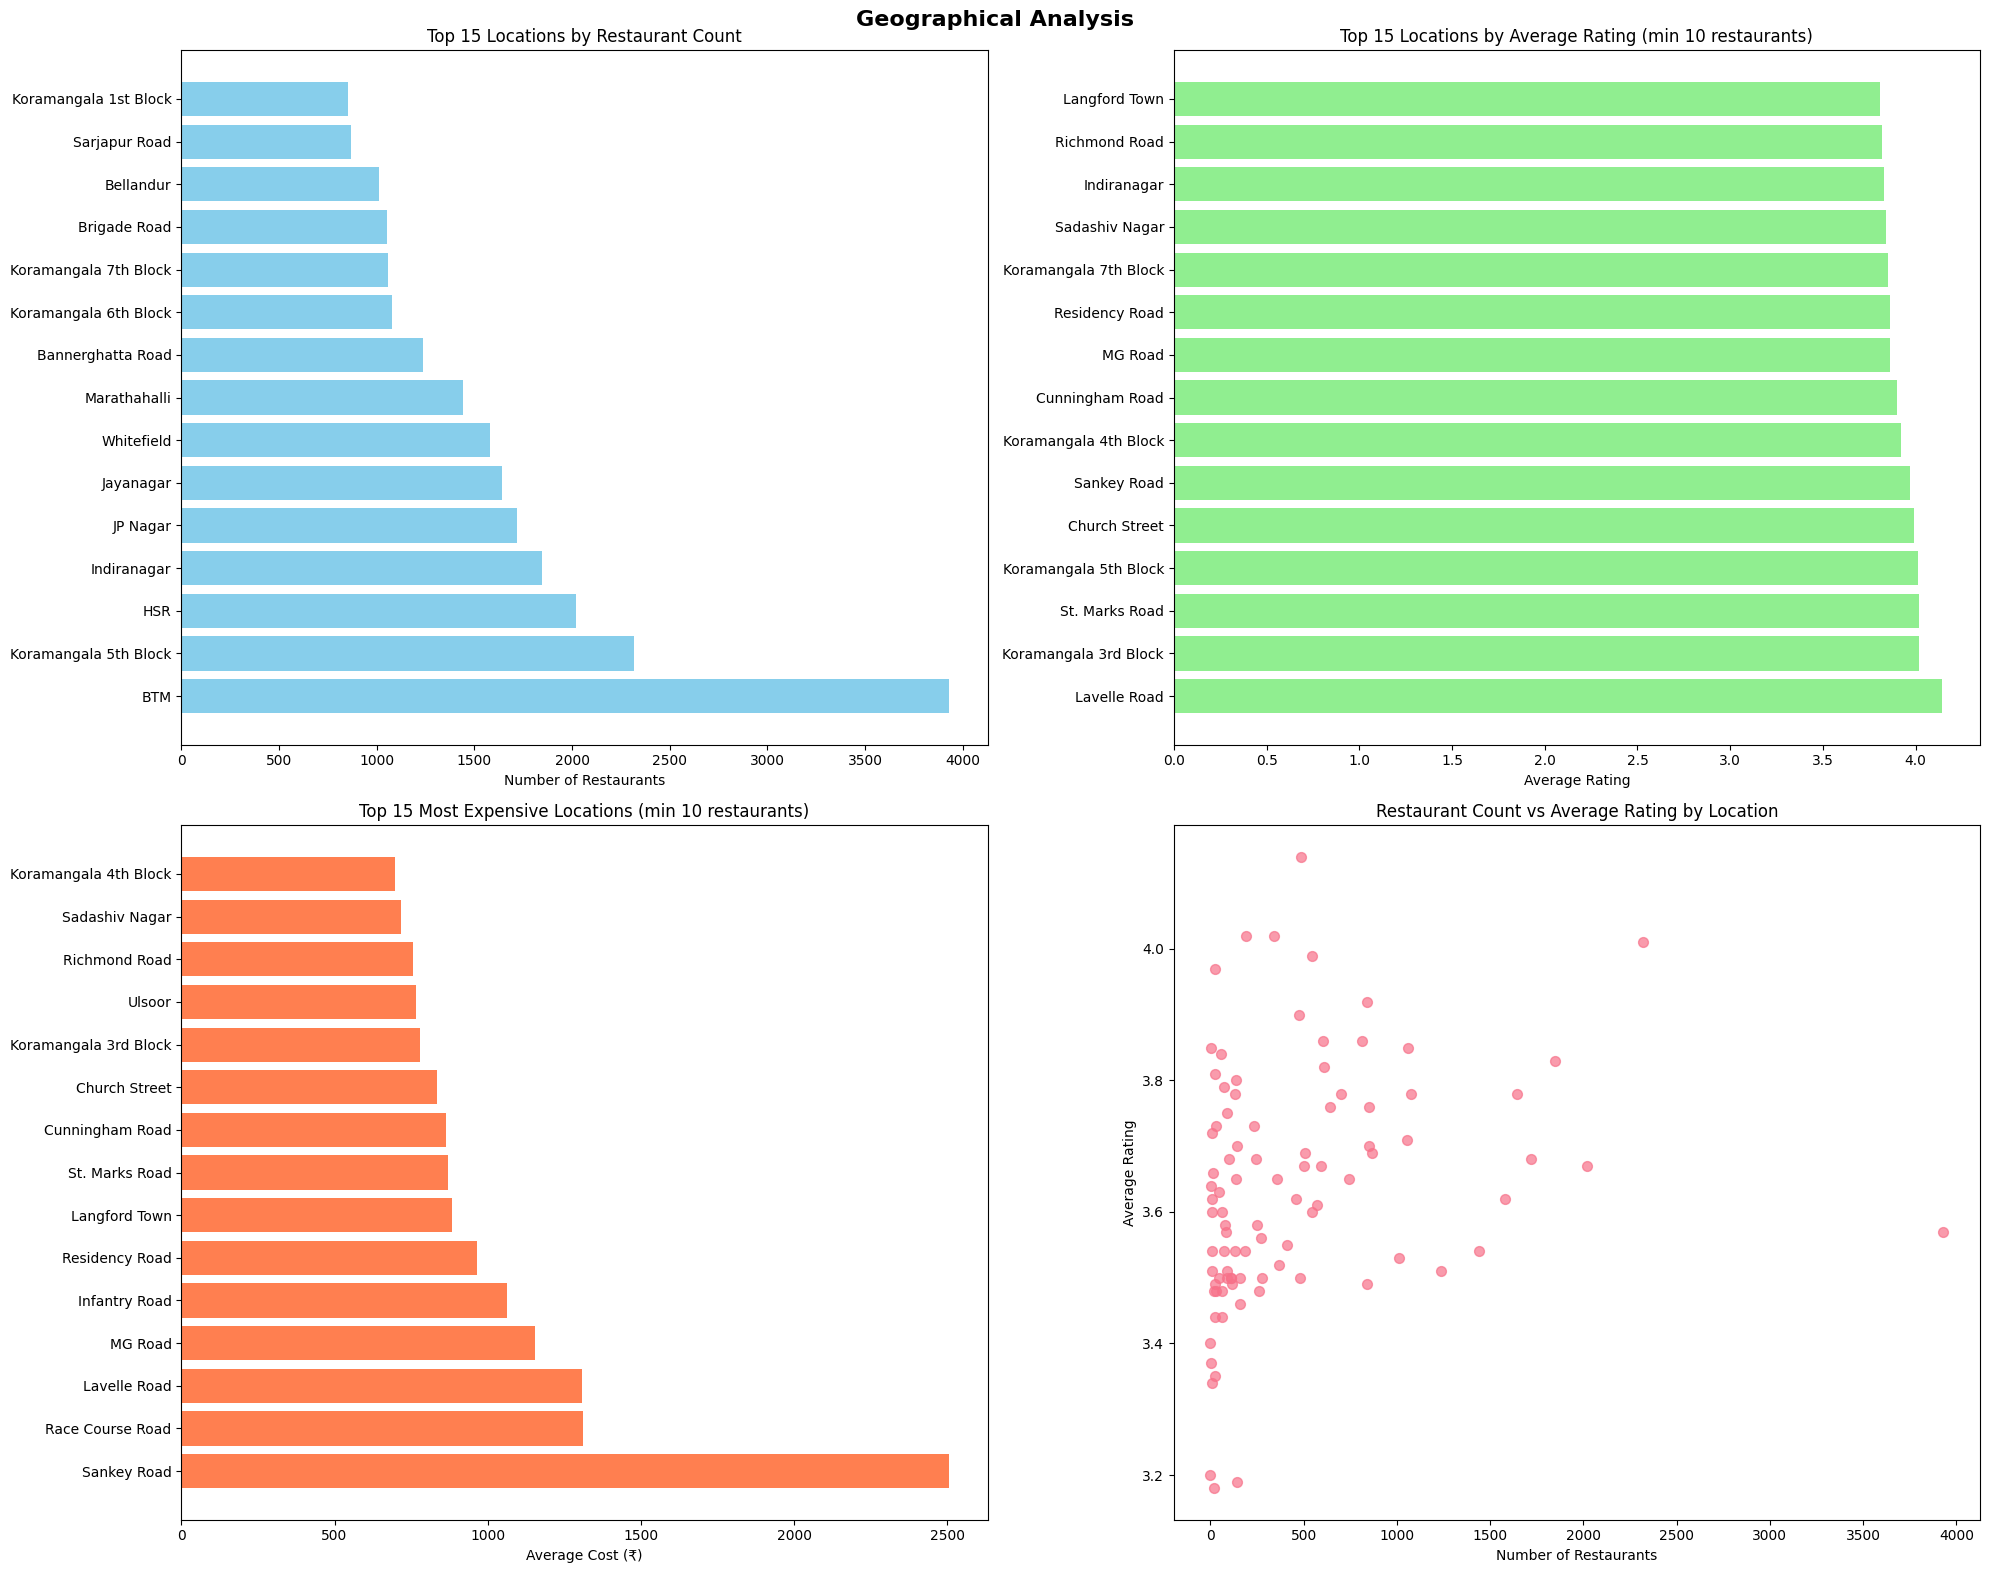

In [40]:
location_stats = df.groupby('location').agg({
    'rate_clean': ['mean', 'count'],
    'cost_clean': 'mean',
    'votes': 'mean'
}).round(2)

location_stats.columns = ['avg_rating', 'restaurant_count', 'avg_cost', 'avg_votes']
location_stats = location_stats.reset_index()

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Geographical Analysis', fontsize=16, fontweight='bold')
top_locations_count = location_stats.nlargest(15, 'restaurant_count')
axes[0, 0].barh(range(len(top_locations_count)), top_locations_count['restaurant_count'], color='skyblue')
axes[0, 0].set_yticks(range(len(top_locations_count)))
axes[0, 0].set_yticklabels(top_locations_count['location'])
axes[0, 0].set_title('Top 15 Locations by Restaurant Count')
axes[0, 0].set_xlabel('Number of Restaurants')
top_locations_rating = location_stats[location_stats['restaurant_count'] >= 10].nlargest(15, 'avg_rating')
axes[0, 1].barh(range(len(top_locations_rating)), top_locations_rating['avg_rating'], color='lightgreen')
axes[0, 1].set_yticks(range(len(top_locations_rating)))
axes[0, 1].set_yticklabels(top_locations_rating['location'])
axes[0, 1].set_title('Top 15 Locations by Average Rating (min 10 restaurants)')
axes[0, 1].set_xlabel('Average Rating')
top_locations_cost = location_stats[location_stats['restaurant_count'] >= 10].nlargest(15, 'avg_cost')
axes[1, 0].barh(range(len(top_locations_cost)), top_locations_cost['avg_cost'], color='coral')
axes[1, 0].set_yticks(range(len(top_locations_cost)))
axes[1, 0].set_yticklabels(top_locations_cost['location'])
axes[1, 0].set_title('Top 15 Most Expensive Locations (min 10 restaurants)')
axes[1, 0].set_xlabel('Average Cost (₹)')
axes[1, 1].scatter(location_stats['restaurant_count'], location_stats['avg_rating'], alpha=0.7, s=50)
axes[1, 1].set_xlabel('Number of Restaurants')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Restaurant Count vs Average Rating by Location')

plt.tight_layout()
plt.show()

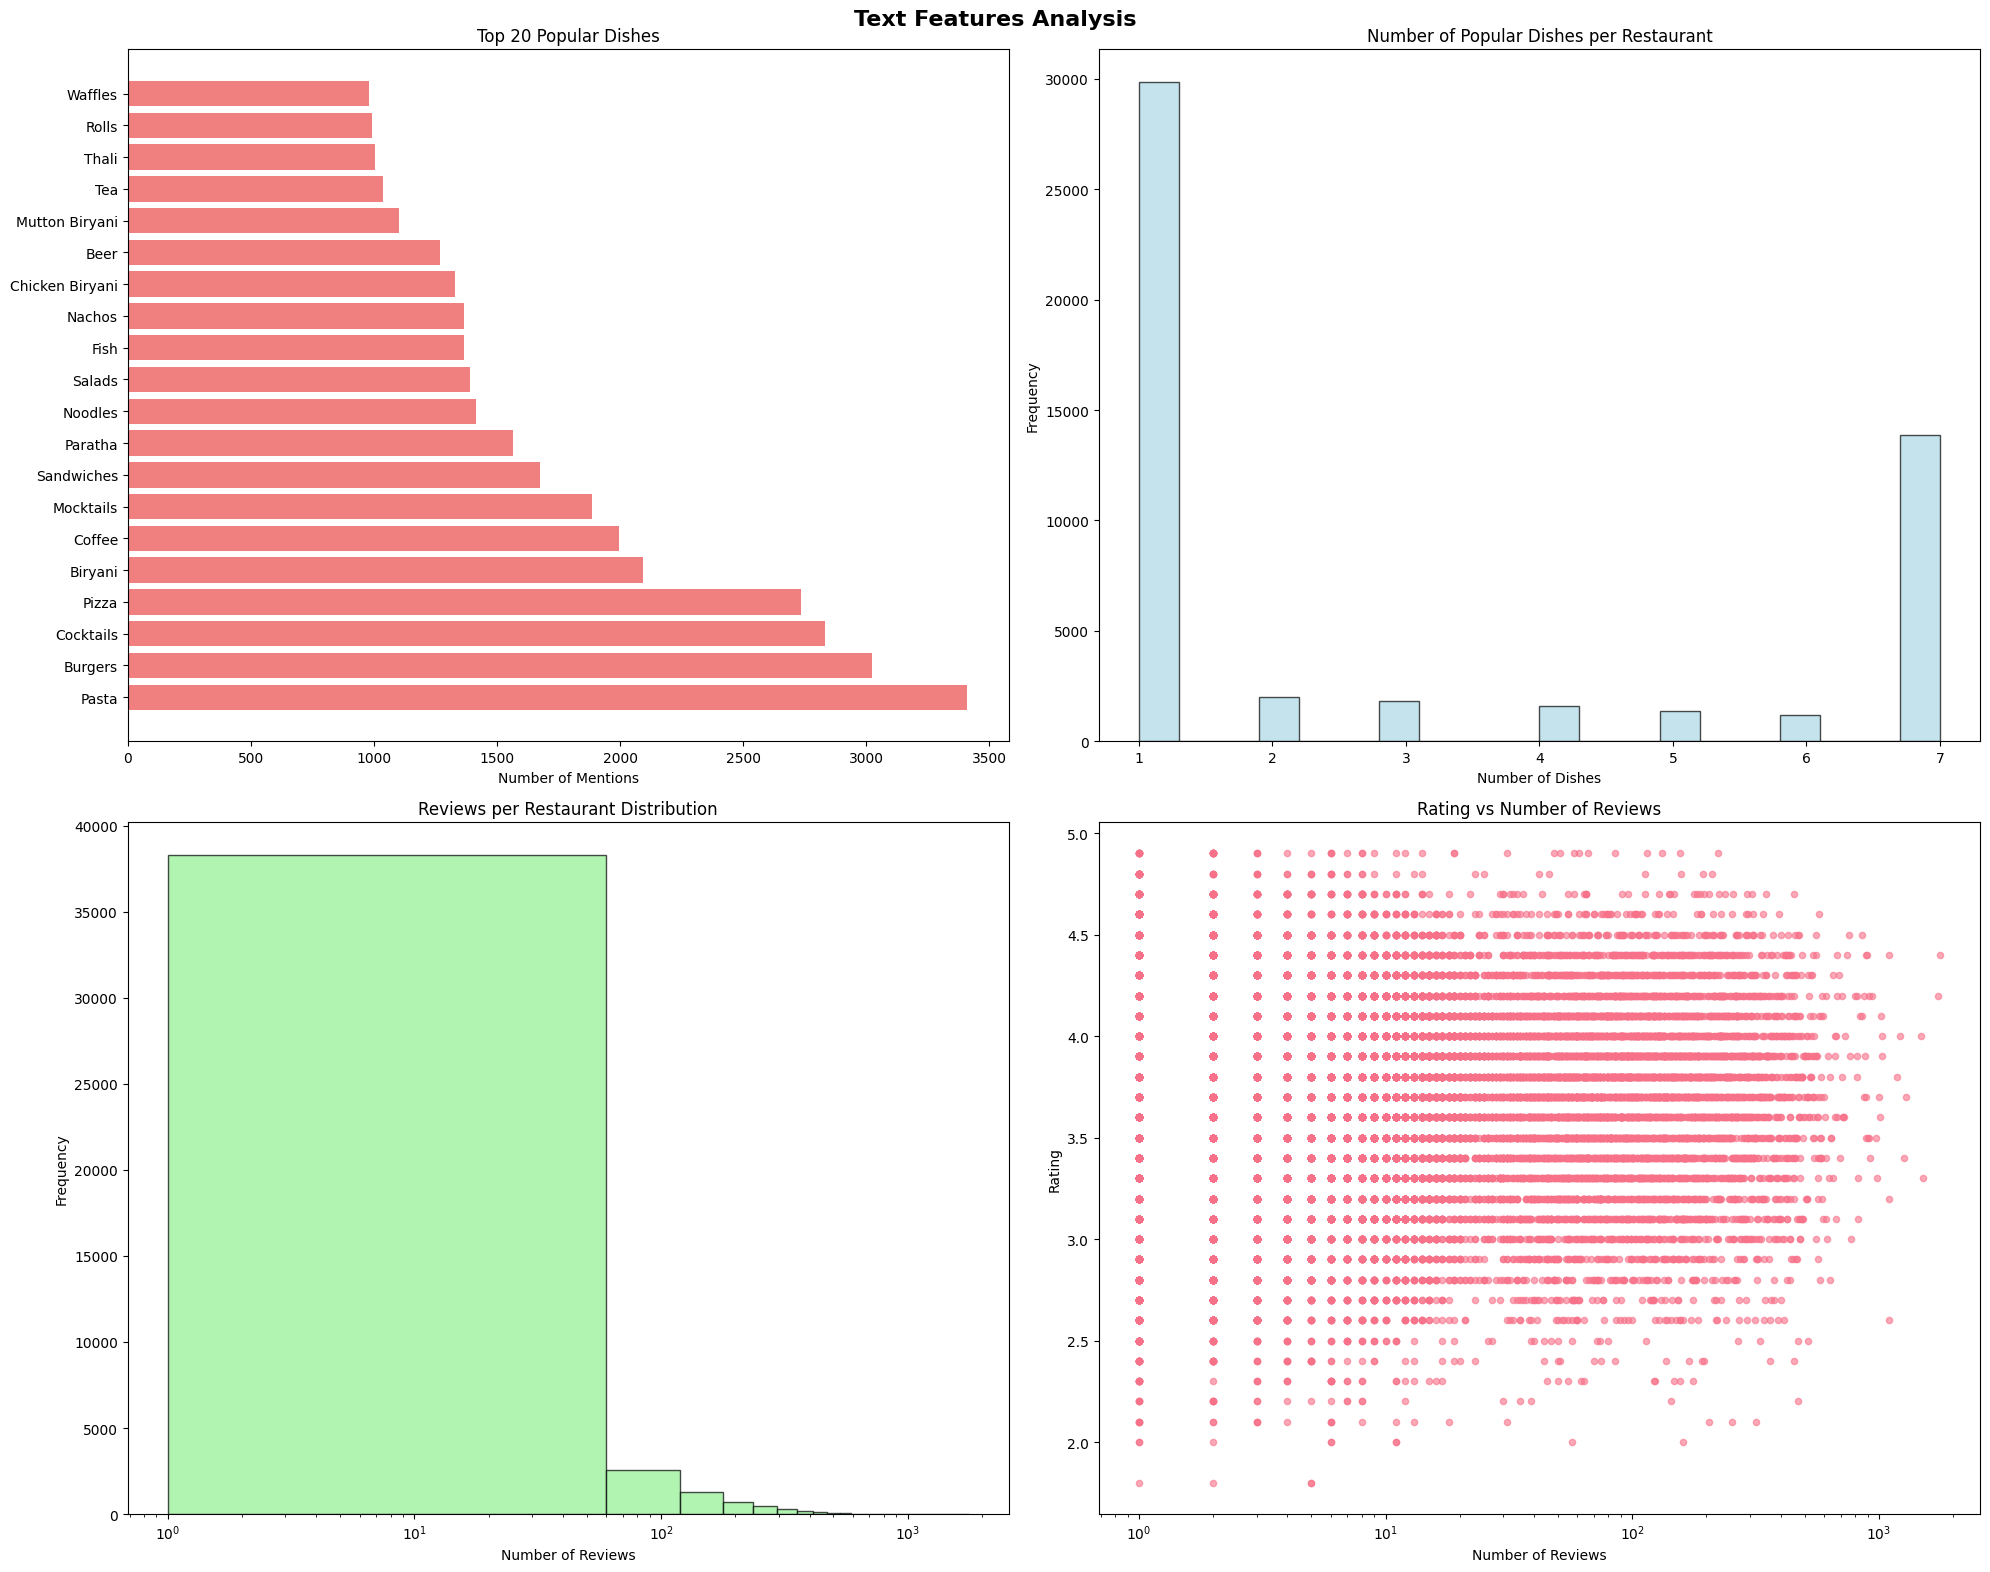

In [41]:
all_dishes = []
for dishes in df['dish_liked'].dropna():
    if isinstance(dishes, str):
        all_dishes.extend([d.strip() for d in dishes.split(',')])

dish_counts = pd.Series(all_dishes).value_counts()

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Text Features Analysis', fontsize=16, fontweight='bold')
top_dishes = dish_counts.head(20)
axes[0, 0].barh(range(len(top_dishes)), top_dishes.values, color='lightcoral')
axes[0, 0].set_yticks(range(len(top_dishes)))
axes[0, 0].set_yticklabels(top_dishes.index)
axes[0, 0].set_title('Top 20 Popular Dishes')
axes[0, 0].set_xlabel('Number of Mentions')
dishes_per_restaurant = df['dish_liked'].str.count(',').fillna(0) + 1
axes[0, 1].hist(dishes_per_restaurant, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
axes[0, 1].set_title('Number of Popular Dishes per Restaurant')
axes[0, 1].set_xlabel('Number of Dishes')
axes[0, 1].set_ylabel('Frequency')
review_counts = []
for reviews in df['reviews_list'].dropna():
    if isinstance(reviews, str) and reviews != '[]':
        count = reviews.count("'Rated")
        review_counts.append(count)

if len(review_counts) > 0:
    review_counts = pd.Series(review_counts)
    axes[1, 0].hist(review_counts, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1, 0].set_title('Reviews per Restaurant Distribution')
    axes[1, 0].set_xlabel('Number of Reviews')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_xscale('log')

if len(review_counts) > 0:
    df['review_count'] = review_counts
    axes[1, 1].scatter(df['review_count'], df['rate_clean'], alpha=0.6, s=20)
    axes[1, 1].set_xlabel('Number of Reviews')
    axes[1, 1].set_ylabel('Rating')
    axes[1, 1].set_title('Rating vs Number of Reviews')
    axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()

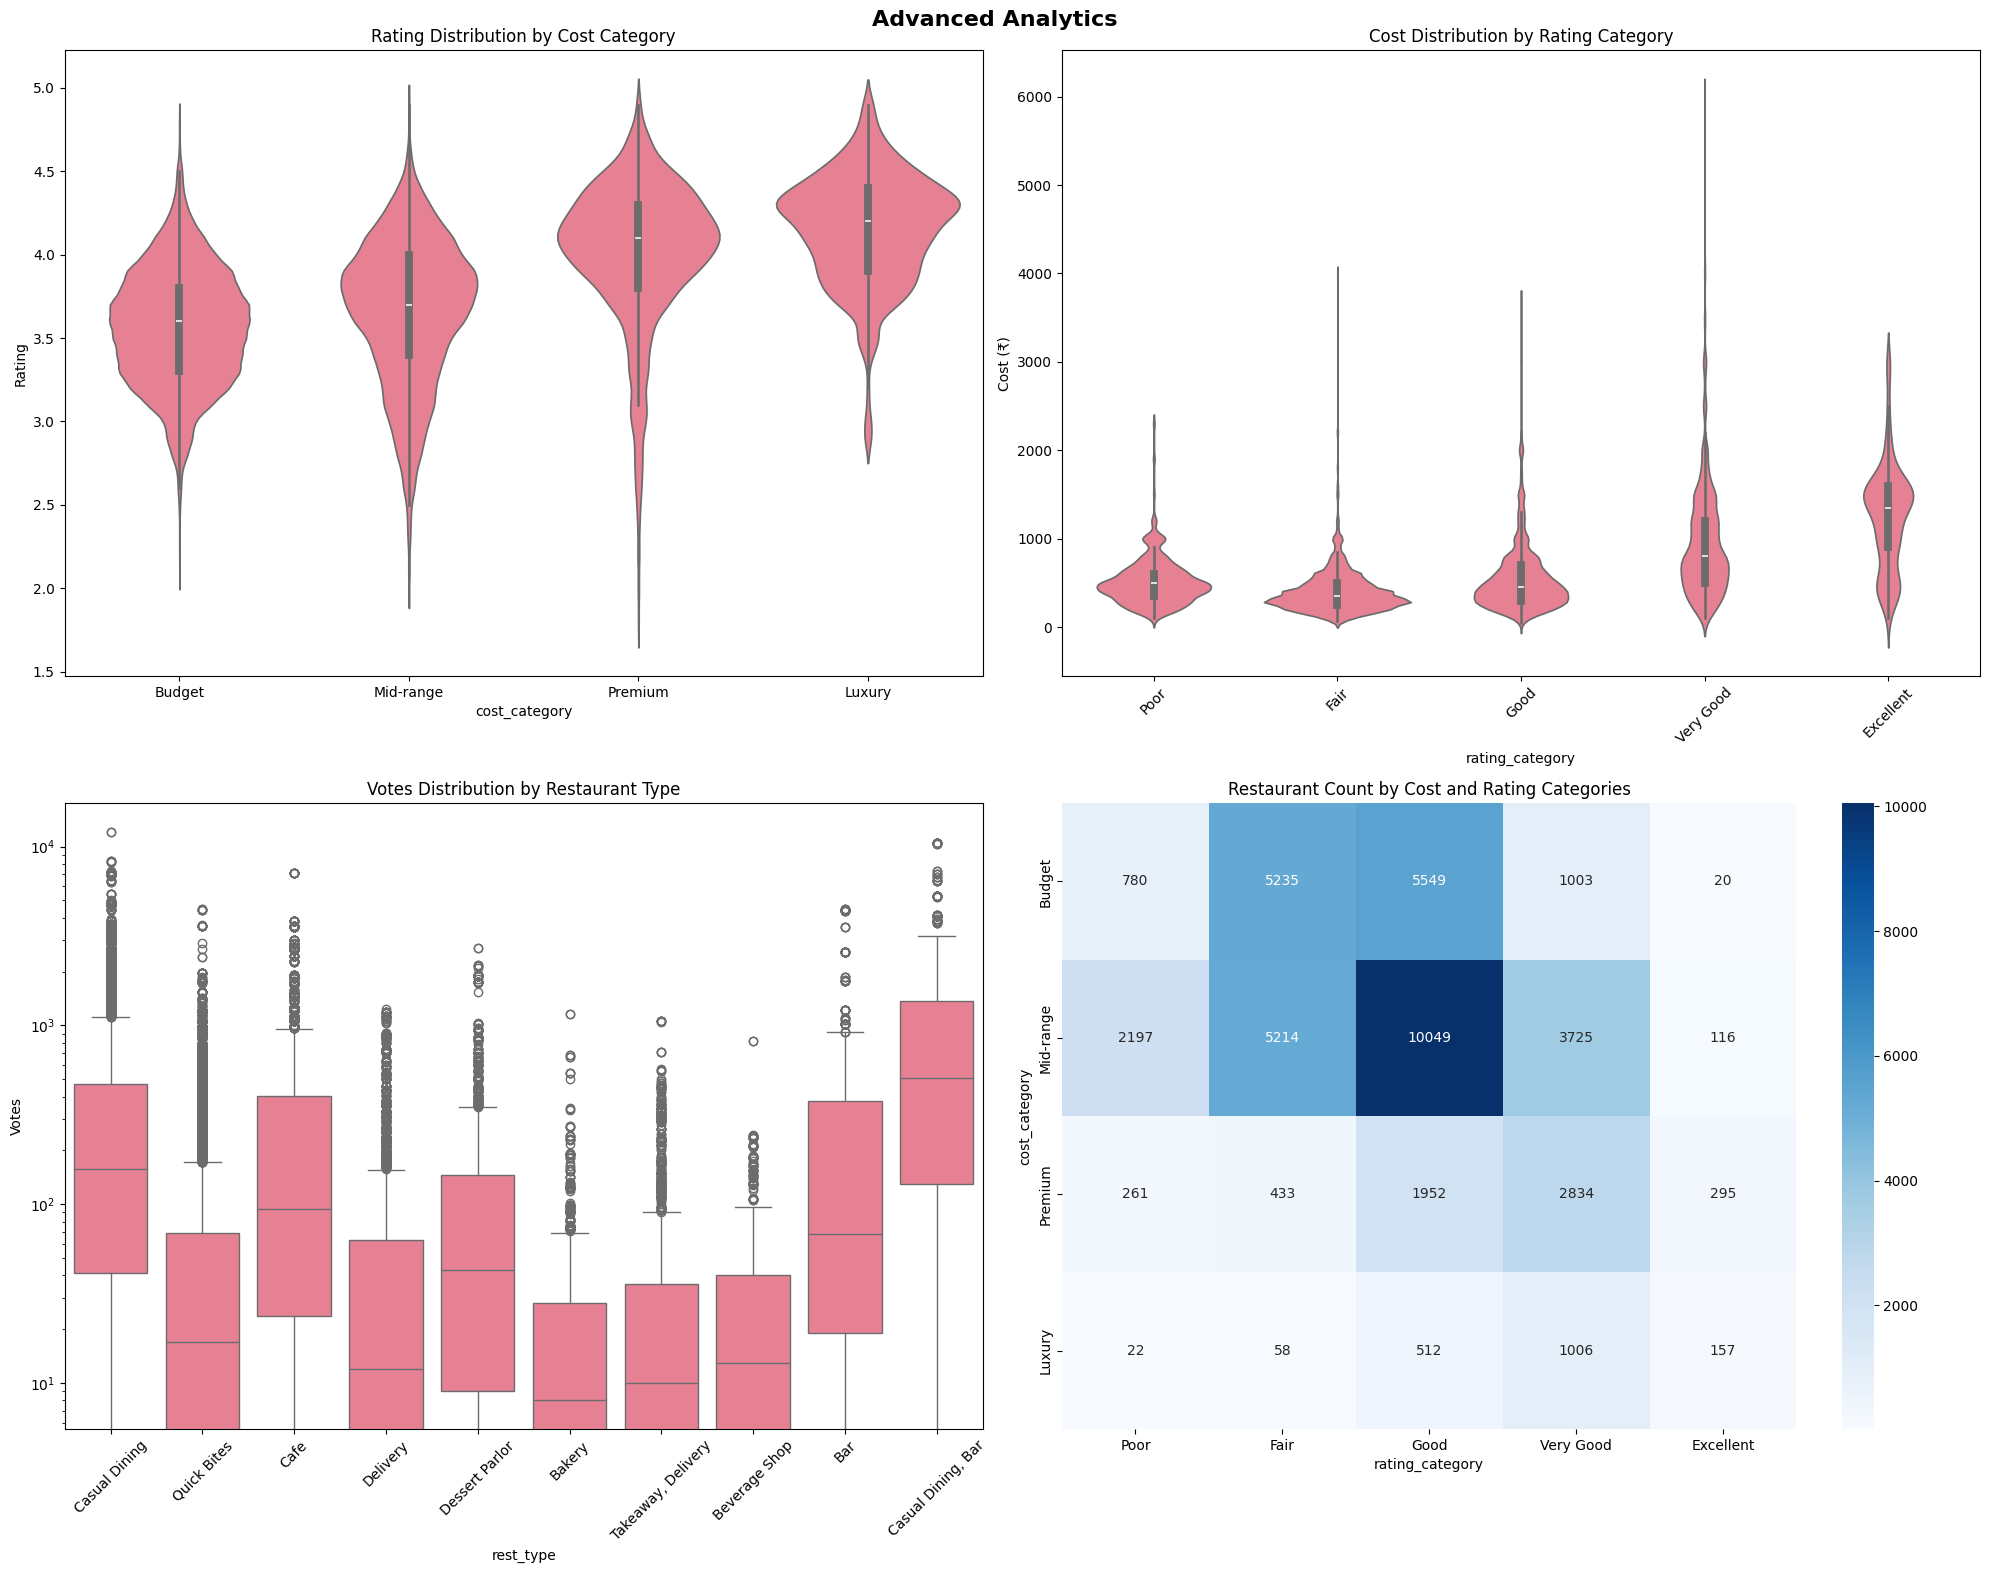

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Advanced Analytics', fontsize=16, fontweight='bold')
sns.violinplot(data=df, x='cost_category', y='rate_clean', ax=axes[0, 0])
axes[0, 0].set_title('Rating Distribution by Cost Category')
axes[0, 0].set_ylabel('Rating')
sns.violinplot(data=df, x='rating_category', y='cost_clean', ax=axes[0, 1])
axes[0, 1].set_title('Cost Distribution by Rating Category')
axes[0, 1].set_ylabel('Cost (₹)')
axes[0, 1].tick_params(axis='x', rotation=45)
top_types = df['rest_type'].value_counts().head(10).index
type_votes_data = df[df['rest_type'].isin(top_types)]
sns.boxplot(data=type_votes_data, x='rest_type', y='votes', ax=axes[1, 0])
axes[1, 0].set_title('Votes Distribution by Restaurant Type')
axes[1, 0].set_ylabel('Votes')
axes[1, 0].set_yscale('log')
axes[1, 0].tick_params(axis='x', rotation=45)
cross_tab = pd.crosstab(df['cost_category'], df['rating_category'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Restaurant Count by Cost and Rating Categories')

plt.tight_layout()
plt.show()

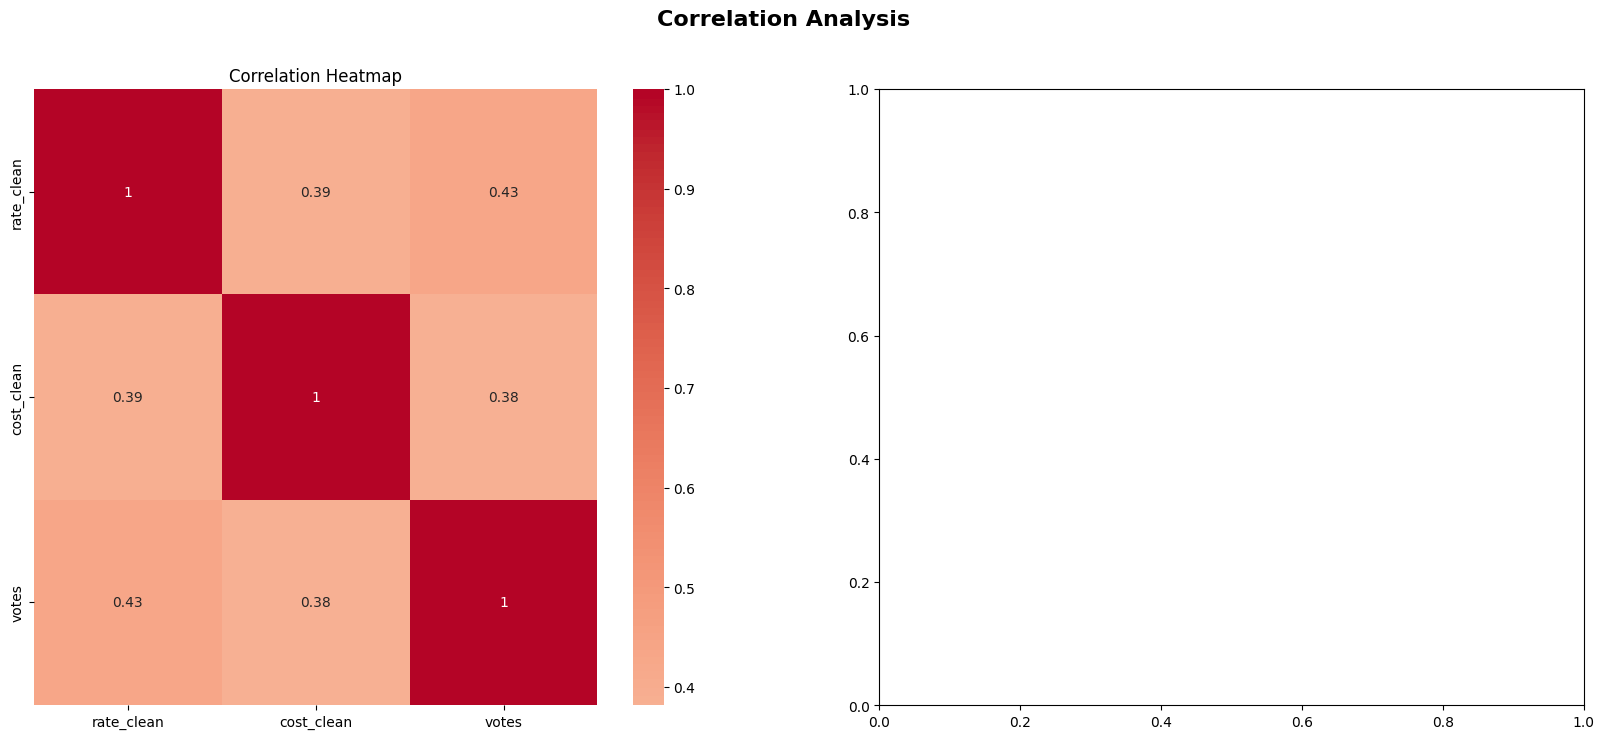

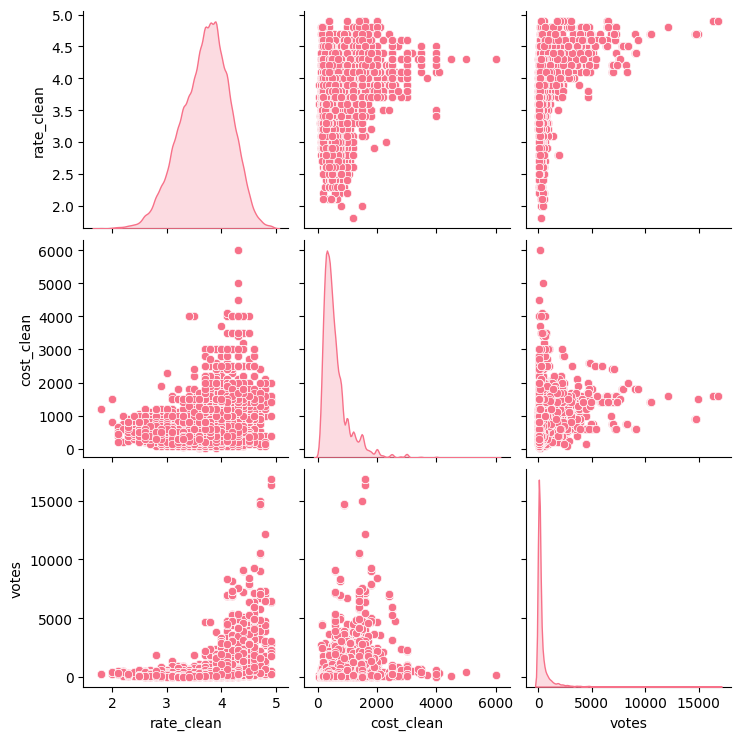


 Correlation Matrix:
            rate_clean  cost_clean     votes
rate_clean    1.000000    0.385183  0.434040
cost_clean    0.385183    1.000000  0.381804
votes         0.434040    0.381804  1.000000


In [43]:
numerical_cols = ['rate_clean', 'cost_clean', 'votes']
correlation_data = df[numerical_cols].corr()
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Correlation Analysis', fontsize=16, fontweight='bold')
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, ax=axes[0])
axes[0].set_title('Correlation Heatmap')
sns.pairplot(df[numerical_cols].dropna(), diag_kind='kde')
plt.show()
print("\n Correlation Matrix:")
print(correlation_data)

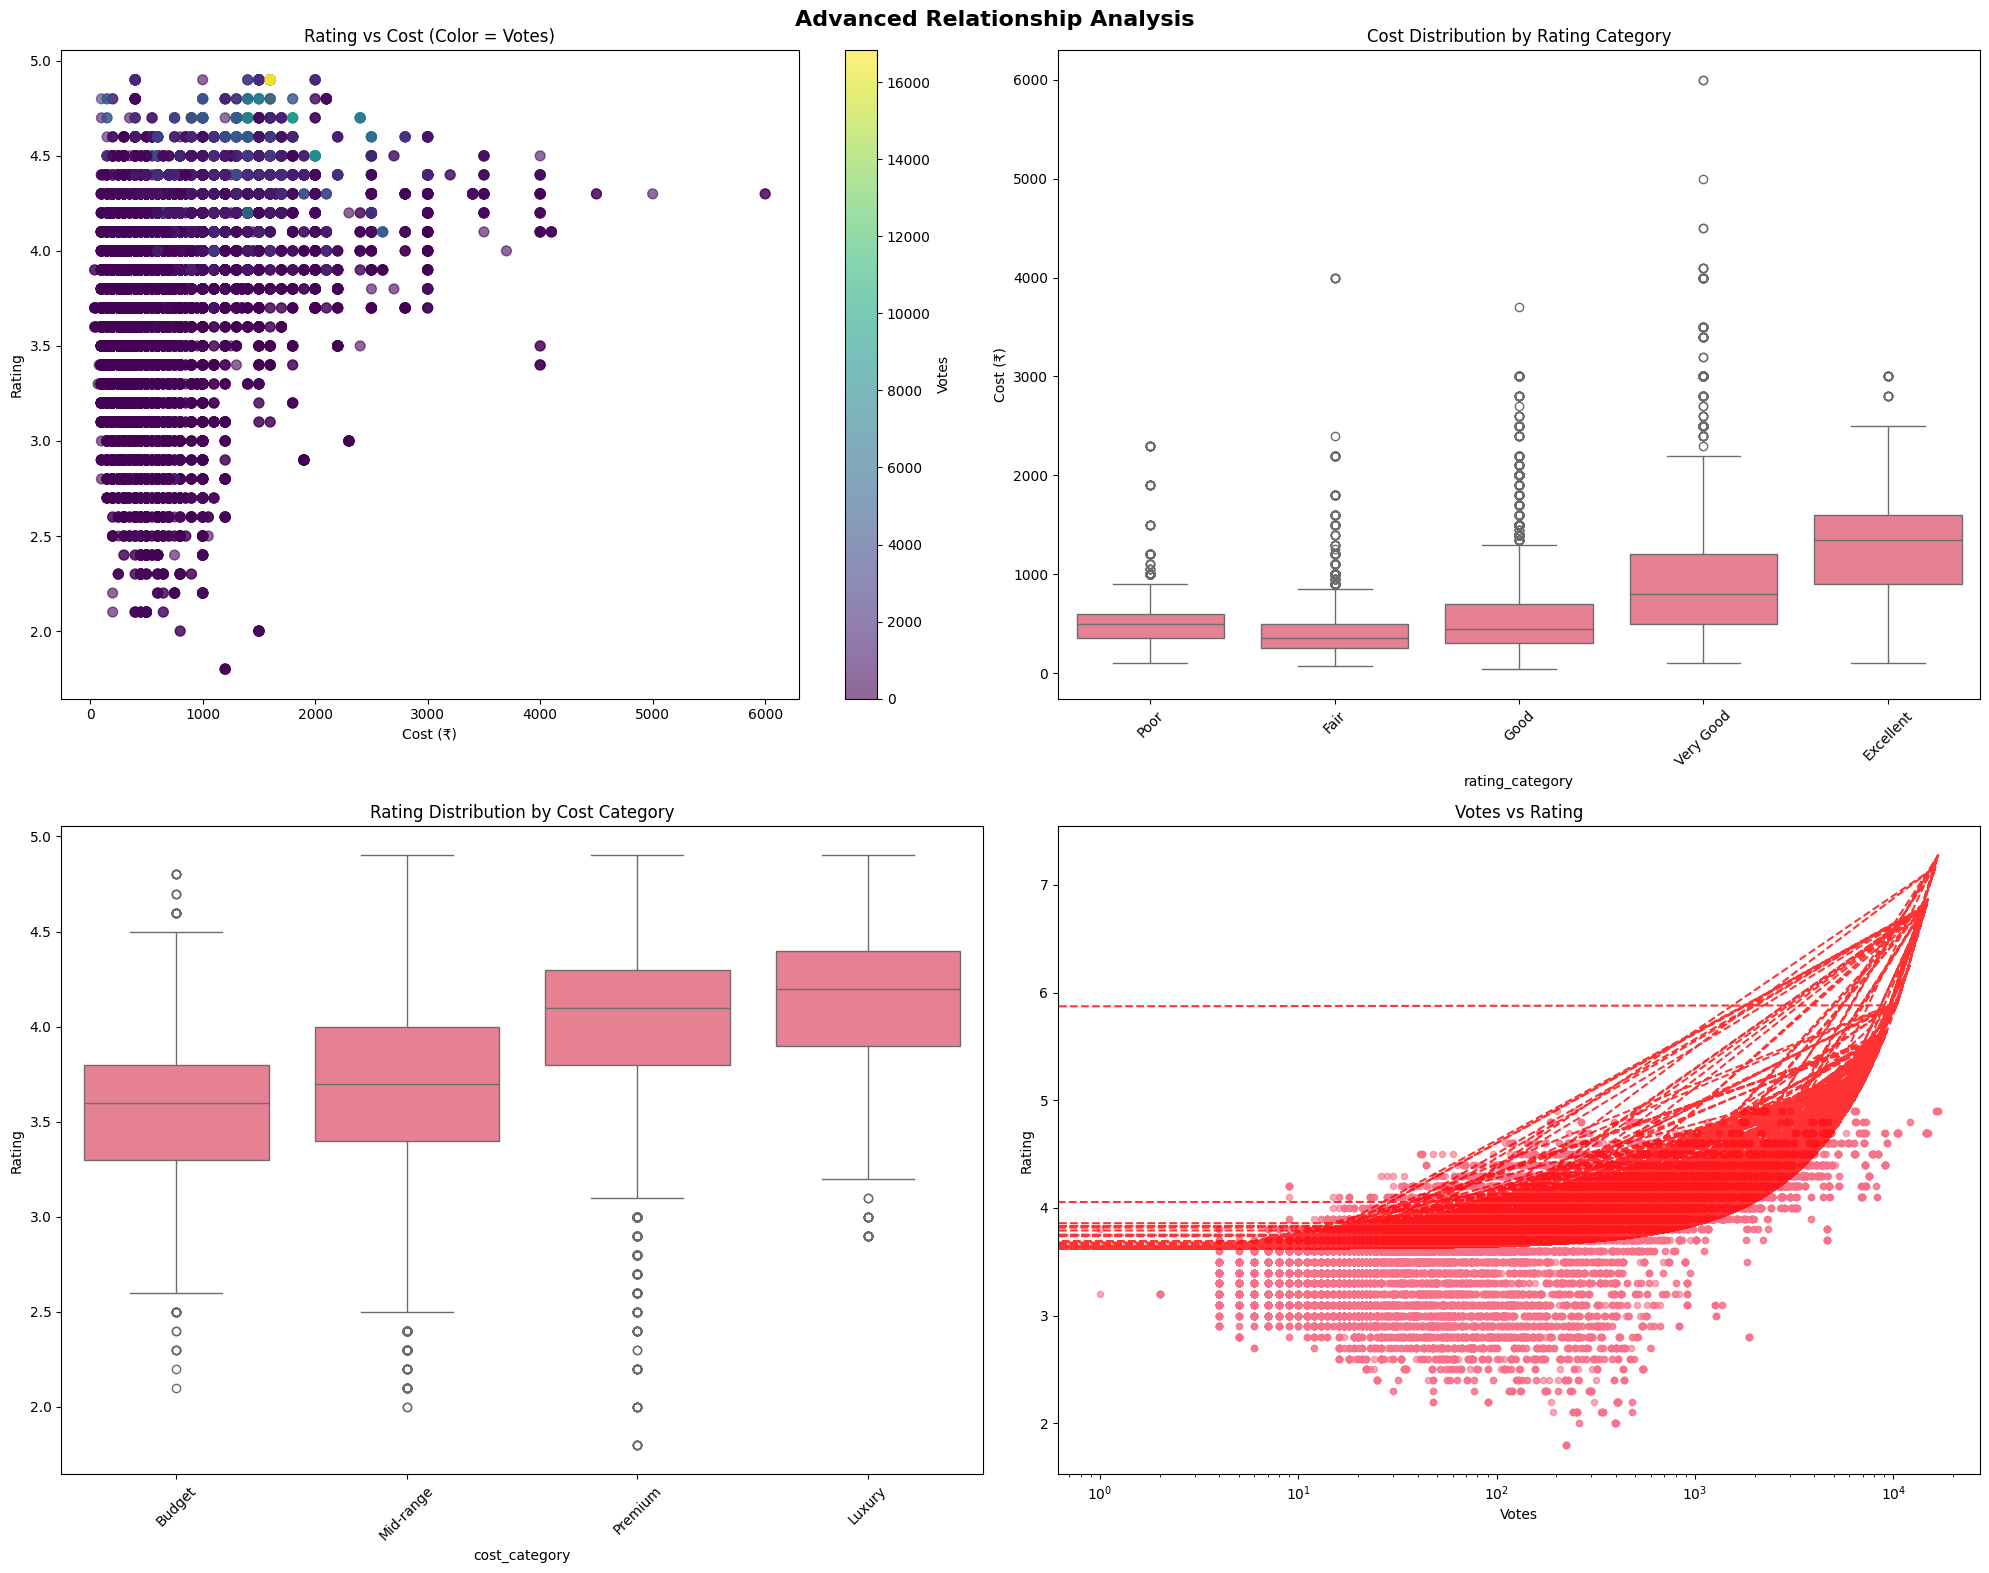


📊 KEY RELATIONSHIP STATISTICS:
Correlation between Rating and Cost: 0.385
Correlation between Rating and Votes: 0.434
Correlation between Cost and Votes: 0.382


In [44]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Advanced Relationship Analysis', fontsize=16, fontweight='bold')
scatter1 = axes[0, 0].scatter(df['cost_clean'], df['rate_clean'], 
                             c=df['votes'], s=50, alpha=0.6, cmap='viridis')
axes[0, 0].set_xlabel('Cost (₹)')
axes[0, 0].set_ylabel('Rating')
axes[0, 0].set_title('Rating vs Cost (Color = Votes)')
plt.colorbar(scatter1, ax=axes[0, 0], label='Votes')
sns.boxplot(data=df, x='rating_category', y='cost_clean', ax=axes[0, 1])
axes[0, 1].set_title('Cost Distribution by Rating Category')
axes[0, 1].set_ylabel('Cost (₹)')
axes[0, 1].tick_params(axis='x', rotation=45)
sns.boxplot(data=df, x='cost_category', y='rate_clean', ax=axes[1, 0])
axes[1, 0].set_title('Rating Distribution by Cost Category')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 1].scatter(df['votes'], df['rate_clean'], alpha=0.6, s=20)
axes[1, 1].set_xlabel('Votes')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].set_title('Votes vs Rating')
axes[1, 1].set_xscale('log')
valid_data = df[['votes', 'rate_clean']].dropna()
if len(valid_data) > 0:
    z = np.polyfit(valid_data['votes'], valid_data['rate_clean'], 1)
    p = np.poly1d(z)
    axes[1, 1].plot(valid_data['votes'], p(valid_data['votes']), "r--", alpha=0.8)

plt.tight_layout()
plt.show()
print("\n📊 KEY RELATIONSHIP STATISTICS:")
print(f"Correlation between Rating and Cost: {df['rate_clean'].corr(df['cost_clean']):.3f}")
print(f"Correlation between Rating and Votes: {df['rate_clean'].corr(df['votes']):.3f}")
print(f"Correlation between Cost and Votes: {df['cost_clean'].corr(df['votes']):.3f}")

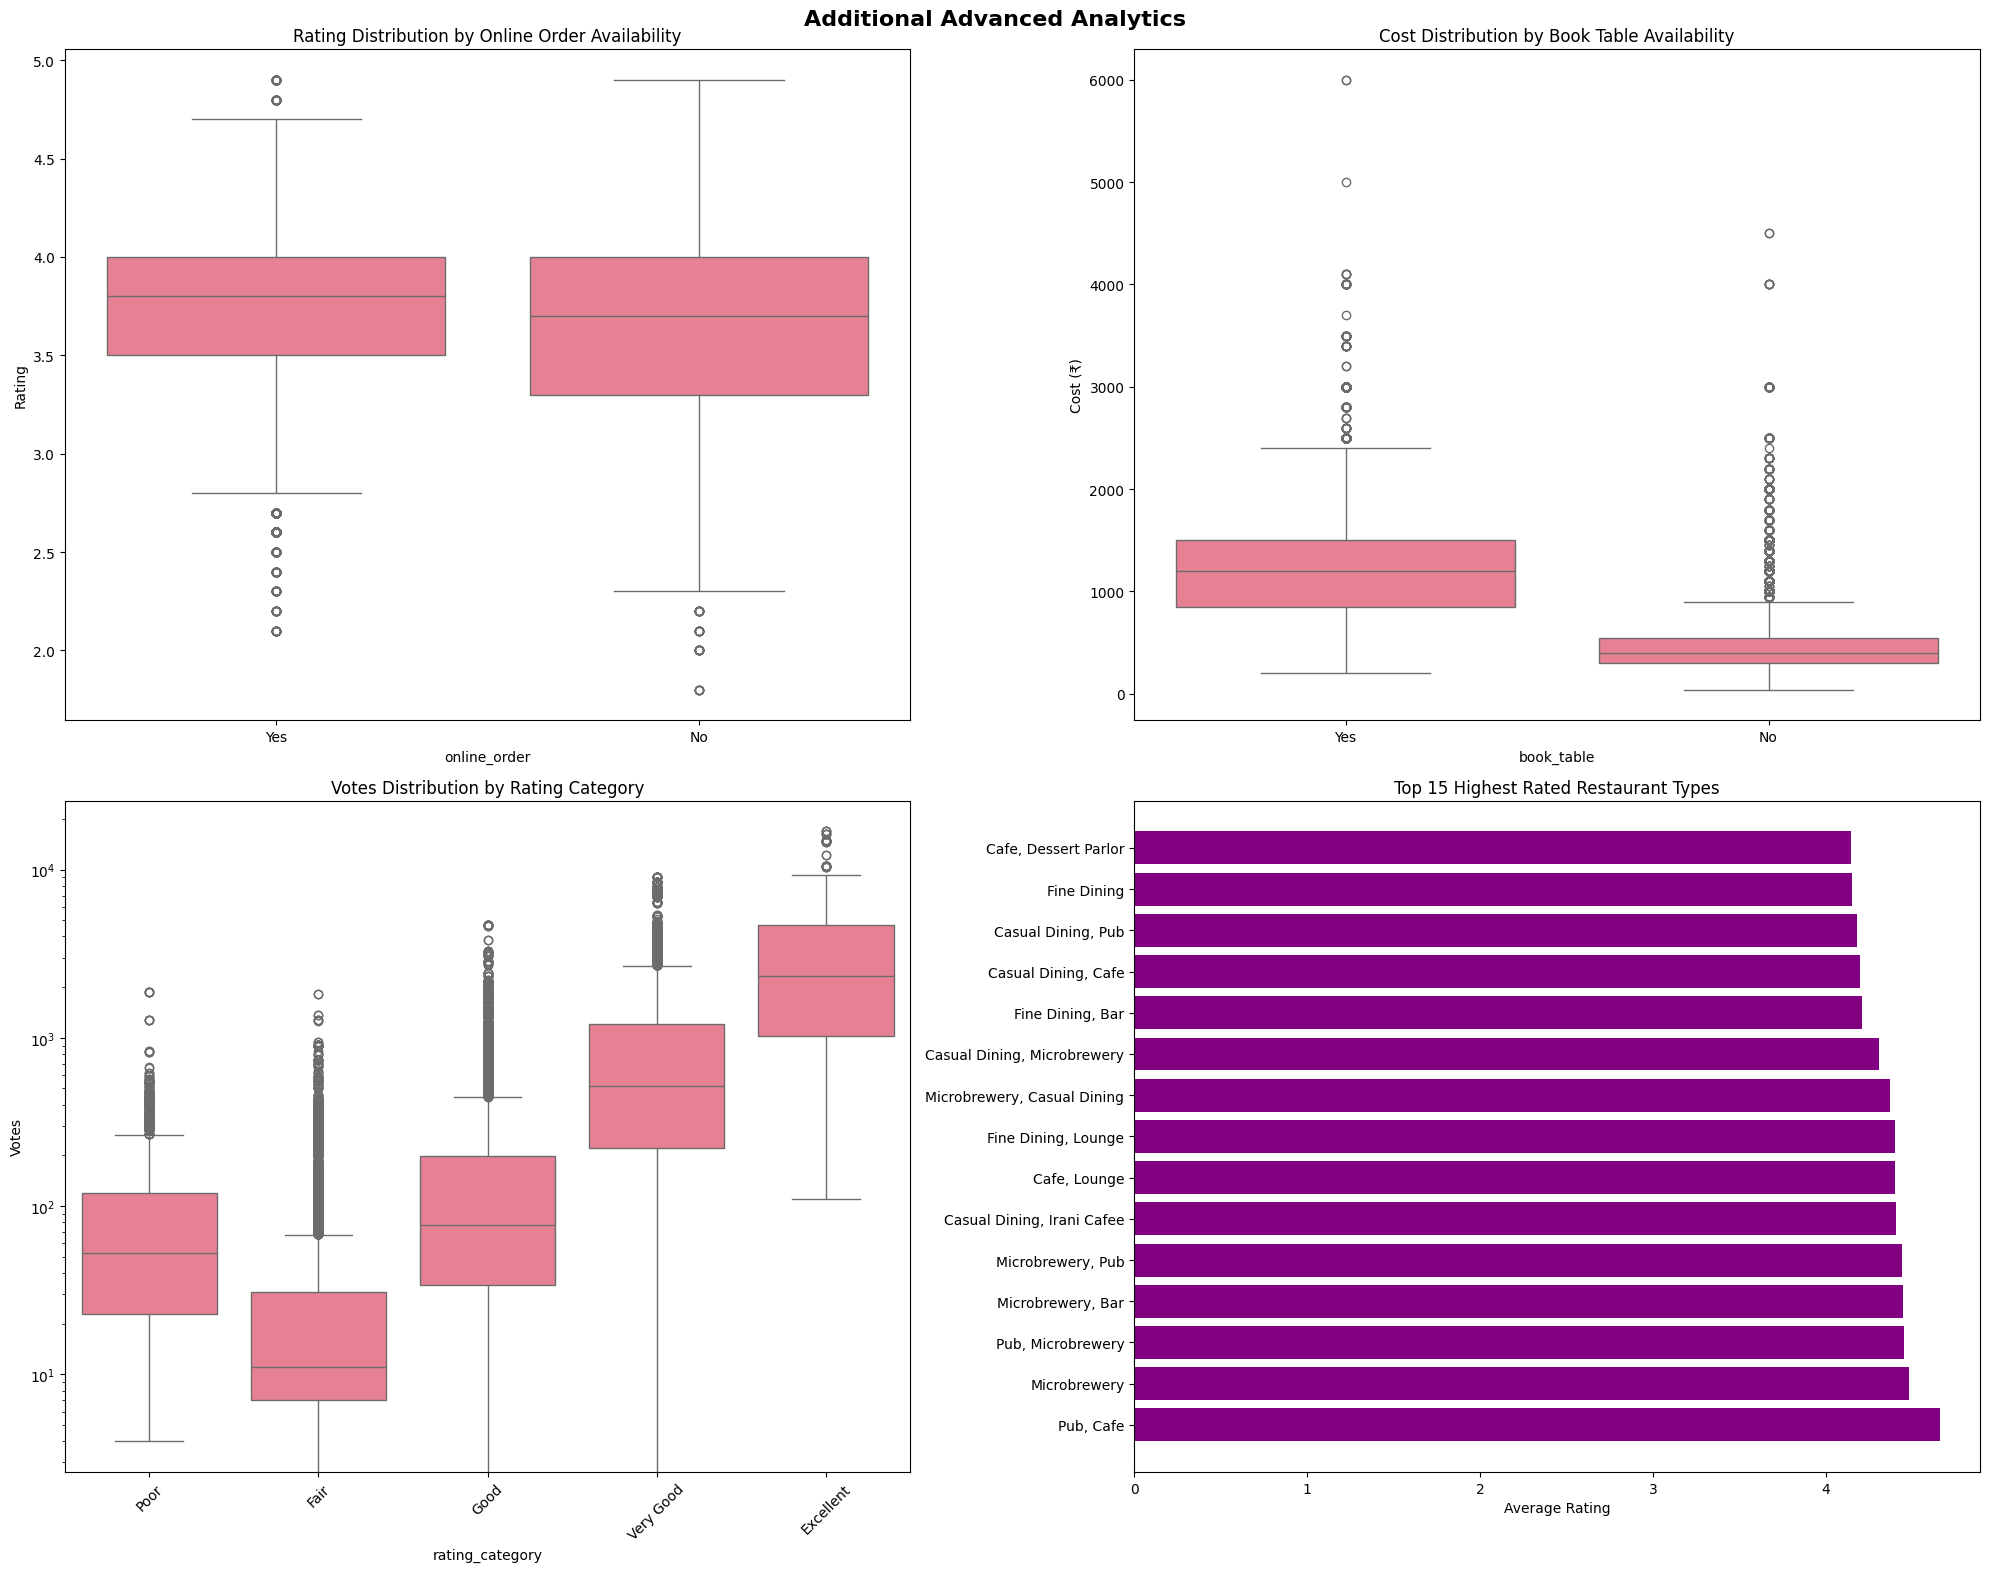

In [45]:

fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Additional Advanced Analytics', fontsize=16, fontweight='bold')
sns.boxplot(data=df, x='online_order', y='rate_clean', ax=axes[0, 0])
axes[0, 0].set_title('Rating Distribution by Online Order Availability')
axes[0, 0].set_ylabel('Rating')
sns.boxplot(data=df, x='book_table', y='cost_clean', ax=axes[0, 1])
axes[0, 1].set_title('Cost Distribution by Book Table Availability')
axes[0, 1].set_ylabel('Cost (₹)')
sns.boxplot(data=df, x='rating_category', y='votes', ax=axes[1, 0])
axes[1, 0].set_title('Votes Distribution by Rating Category')
axes[1, 0].set_ylabel('Votes')
axes[1, 0].set_yscale('log')
axes[1, 0].tick_params(axis='x', rotation=45)
type_rating = df.groupby('rest_type')['rate_clean'].agg(['mean', 'count']).reset_index()
type_rating = type_rating[type_rating['count'] >= 10].nlargest(15, 'mean')
axes[1, 1].barh(range(len(type_rating)), type_rating['mean'], color='purple')
axes[1, 1].set_yticks(range(len(type_rating)))
axes[1, 1].set_yticklabels(type_rating['rest_type'])
axes[1, 1].set_title('Top 15 Highest Rated Restaurant Types')
axes[1, 1].set_xlabel('Average Rating')

plt.tight_layout()
plt.show()

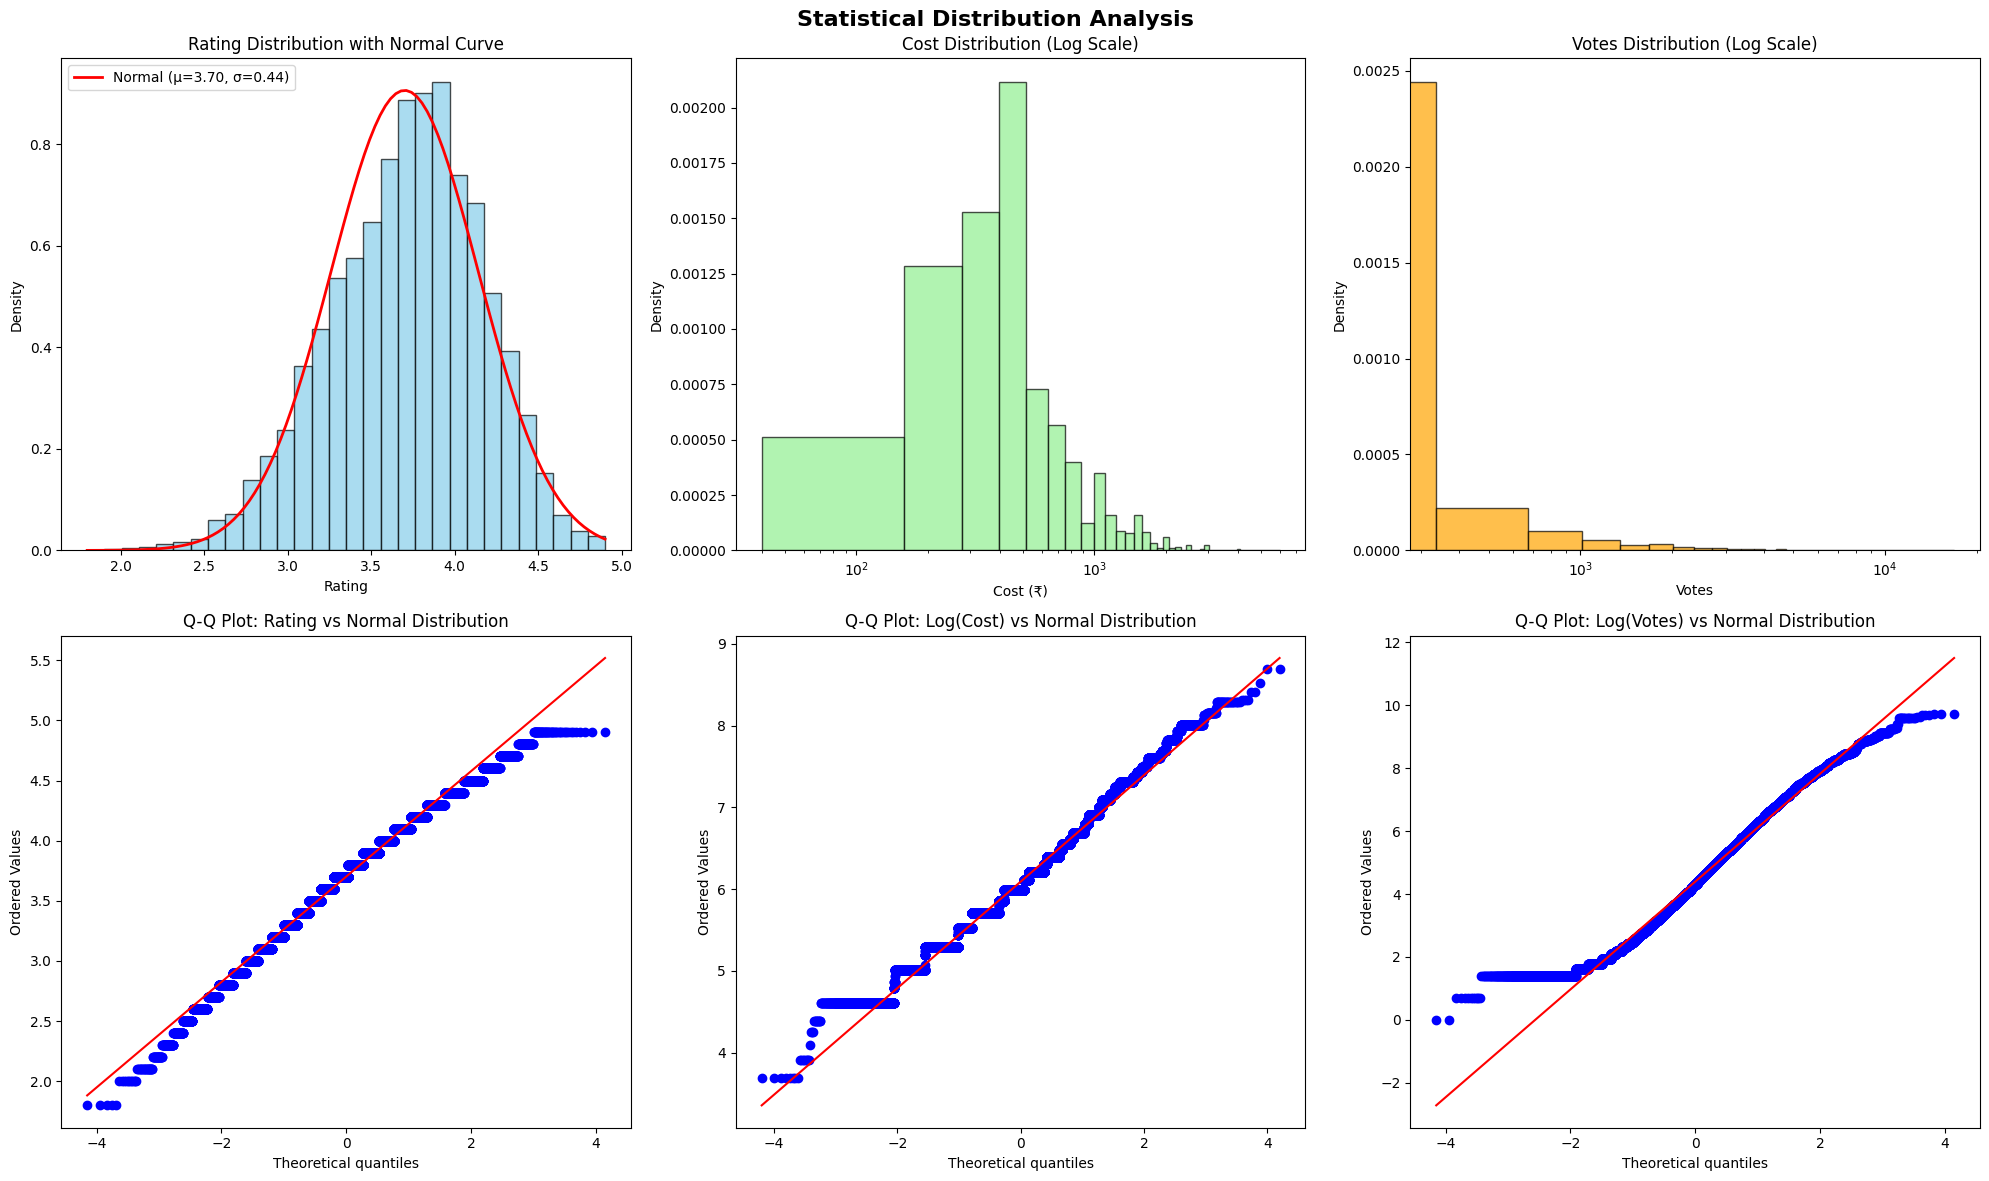

Rating Statistics:
  Mean: 3.700
  Median: 3.700
  Std Dev: 0.441
  Skewness: -0.329
  Kurtosis: -0.008

Cost Statistics:
  Mean: 555
  Median: 400
  Std Dev: 439
  Skewness: 2.602
  Kurtosis: 10.449

Votes Statistics:
  Mean: 284
  Median: 41
  Std Dev: 804
  Skewness: 7.548
  Kurtosis: 88.858


In [46]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Statistical Distribution Analysis', fontsize=16, fontweight='bold')
rating_data = df['rate_clean'].dropna()
axes[0, 0].hist(rating_data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Rating Distribution with Normal Curve')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Density')
x = np.linspace(rating_data.min(), rating_data.max(), 100)
mu, sigma = rating_data.mean(), rating_data.std()
normal_curve = norm.pdf(x, mu, sigma)
axes[0, 0].plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal (μ={mu:.2f}, σ={sigma:.2f})')
axes[0, 0].legend()
cost_data = df['cost_clean'].dropna()
axes[0, 1].hist(cost_data, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Cost Distribution (Log Scale)')
axes[0, 1].set_xlabel('Cost (₹)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_xscale('log')
votes_data = df['votes']
axes[0, 2].hist(votes_data, bins=50, density=True, alpha=0.7, color='orange', edgecolor='black')
axes[0, 2].set_title('Votes Distribution (Log Scale)')
axes[0, 2].set_xlabel('Votes')
axes[0, 2].set_ylabel('Density')
axes[0, 2].set_xscale('log')
stats.probplot(rating_data, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Rating vs Normal Distribution')
log_cost_data = np.log(cost_data[cost_data > 0])
stats.probplot(log_cost_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Log(Cost) vs Normal Distribution')
log_votes_data = np.log(votes_data[votes_data > 0])
stats.probplot(log_votes_data, dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot: Log(Votes) vs Normal Distribution')

plt.tight_layout()
plt.show()

print("=" * 50)
print(f"Rating Statistics:")
print(f"  Mean: {rating_data.mean():.3f}")
print(f"  Median: {rating_data.median():.3f}")
print(f"  Std Dev: {rating_data.std():.3f}")
print(f"  Skewness: {skew(rating_data):.3f}")
print(f"  Kurtosis: {kurtosis(rating_data):.3f}")

print(f"\nCost Statistics:")
print(f"  Mean: {cost_data.mean():.0f}")
print(f"  Median: {cost_data.median():.0f}")
print(f"  Std Dev: {cost_data.std():.0f}")
print(f"  Skewness: {skew(cost_data):.3f}")
print(f"  Kurtosis: {kurtosis(cost_data):.3f}")

print(f"\nVotes Statistics:")
print(f"  Mean: {votes_data.mean():.0f}")
print(f"  Median: {votes_data.median():.0f}")
print(f"  Std Dev: {votes_data.std():.0f}")
print(f"  Skewness: {skew(votes_data):.3f}")
print(f"  Kurtosis: {kurtosis(votes_data):.3f}")

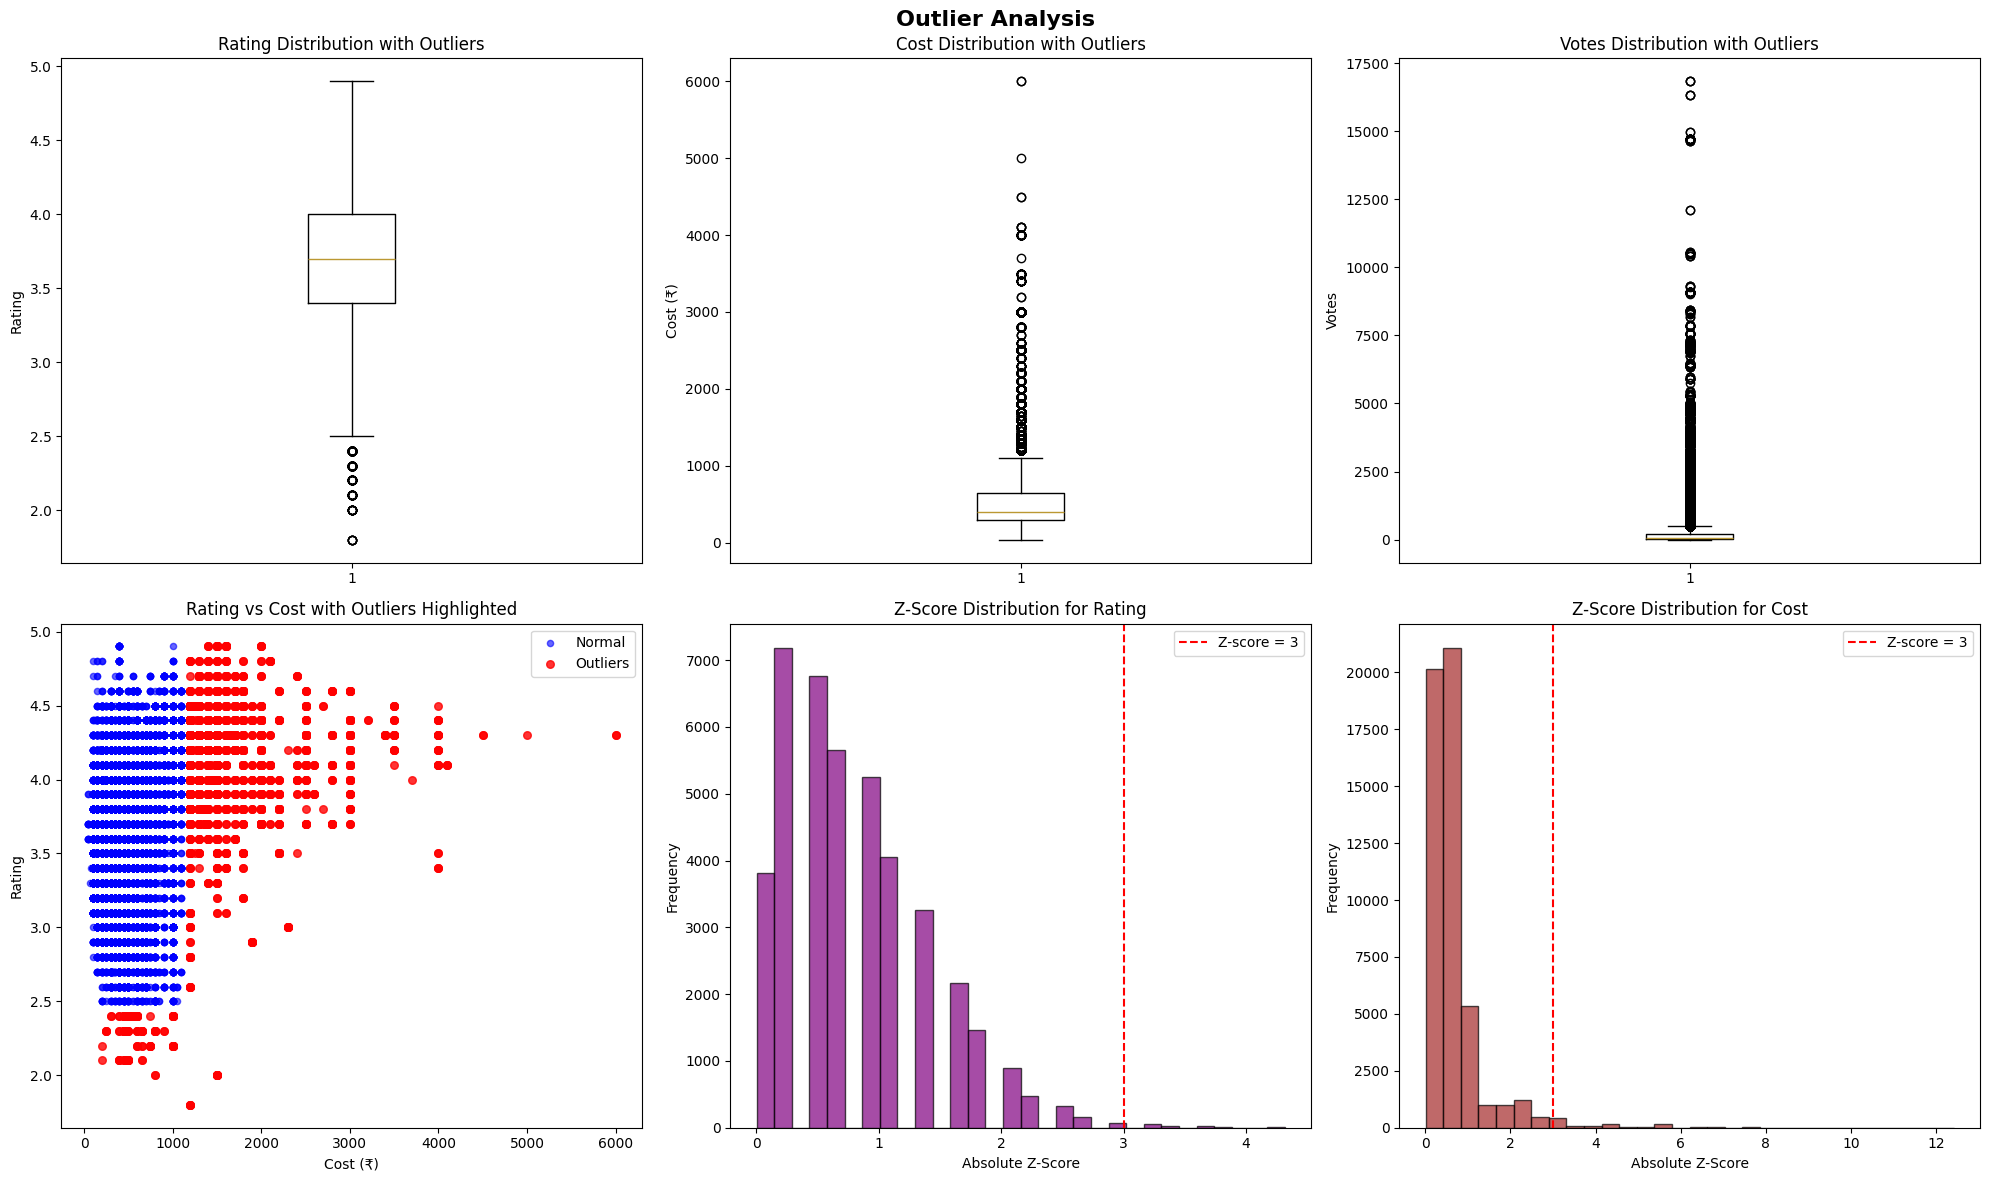

Rating Outliers (IQR method): 187 (0.4%)
Cost Outliers (IQR method): 4764 (9.3%)
Rating Outliers (Z-score > 3): 117 (0.3%)
Cost Outliers (Z-score > 3): 1057 (2.1%)
Total data points: 41,418
Normal points: 36,605 (88.4%)
Outlier points: 4,813 (11.6%)


In [47]:
import scipy.stats as stats
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Outlier Analysis', fontsize=16, fontweight='bold')
axes[0, 0].boxplot(rating_data, vert=True)
axes[0, 0].set_title('Rating Distribution with Outliers')
axes[0, 0].set_ylabel('Rating')
axes[0, 1].boxplot(cost_data, vert=True)
axes[0, 1].set_title('Cost Distribution with Outliers')
axes[0, 1].set_ylabel('Cost (₹)')
axes[0, 2].boxplot(votes_data, vert=True)
axes[0, 2].set_title('Votes Distribution with Outliers')
axes[0, 2].set_ylabel('Votes')
Q1_rating = rating_data.quantile(0.25)
Q3_rating = rating_data.quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
outlier_mask_rating = (rating_data < (Q1_rating - 1.5 * IQR_rating)) | (rating_data > (Q3_rating + 1.5 * IQR_rating))

Q1_cost = cost_data.quantile(0.25)
Q3_cost = cost_data.quantile(0.75)
IQR_cost = Q3_cost - Q1_cost
outlier_mask_cost = (cost_data < (Q1_cost - 1.5 * IQR_cost)) | (cost_data > (Q3_cost + 1.5 * IQR_cost))
combined_data = pd.DataFrame({
    'cost': cost_data,
    'rating': rating_data,
    'outlier_rating': outlier_mask_rating,
    'outlier_cost': outlier_mask_cost
}).dropna()

normal_mask = ~(combined_data['outlier_rating'] | combined_data['outlier_cost'])
outlier_mask = combined_data['outlier_rating'] | combined_data['outlier_cost']
axes[1, 0].scatter(combined_data.loc[normal_mask, 'cost'], 
                   combined_data.loc[normal_mask, 'rating'], 
                   alpha=0.6, s=20, color='blue', label='Normal')
axes[1, 0].scatter(combined_data.loc[outlier_mask, 'cost'], 
                   combined_data.loc[outlier_mask, 'rating'], 
                   alpha=0.8, s=30, color='red', label='Outliers')

axes[1, 0].set_xlabel('Cost (₹)')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].set_title('Rating vs Cost with Outliers Highlighted')
axes[1, 0].legend()

z_scores_rating = np.abs(stats.zscore(rating_data))
axes[1, 1].hist(z_scores_rating, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[1, 1].axvline(3, color='red', linestyle='--', label='Z-score = 3')
axes[1, 1].set_title('Z-Score Distribution for Rating')
axes[1, 1].set_xlabel('Absolute Z-Score')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

z_scores_cost = np.abs(stats.zscore(cost_data))
axes[1, 2].hist(z_scores_cost, bins=30, alpha=0.7, color='brown', edgecolor='black')
axes[1, 2].axvline(3, color='red', linestyle='--', label='Z-score = 3')
axes[1, 2].set_title('Z-Score Distribution for Cost')
axes[1, 2].set_xlabel('Absolute Z-Score')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

plt.tight_layout()
plt.show()
print("=" * 50)
print(f"Rating Outliers (IQR method): {outlier_mask_rating.sum()} ({outlier_mask_rating.sum()/len(rating_data)*100:.1f}%)")
print(f"Cost Outliers (IQR method): {outlier_mask_cost.sum()} ({outlier_mask_cost.sum()/len(cost_data)*100:.1f}%)")
print(f"Rating Outliers (Z-score > 3): {(z_scores_rating > 3).sum()} ({(z_scores_rating > 3).sum()/len(rating_data)*100:.1f}%)")
print(f"Cost Outliers (Z-score > 3): {(z_scores_cost > 3).sum()} ({(z_scores_cost > 3).sum()/len(cost_data)*100:.1f}%)")
print(f"Total data points: {len(combined_data):,}")
print(f"Normal points: {normal_mask.sum():,} ({normal_mask.sum()/len(combined_data)*100:.1f}%)")
print(f"Outlier points: {outlier_mask.sum():,} ({outlier_mask.sum()/len(combined_data)*100:.1f}%)")

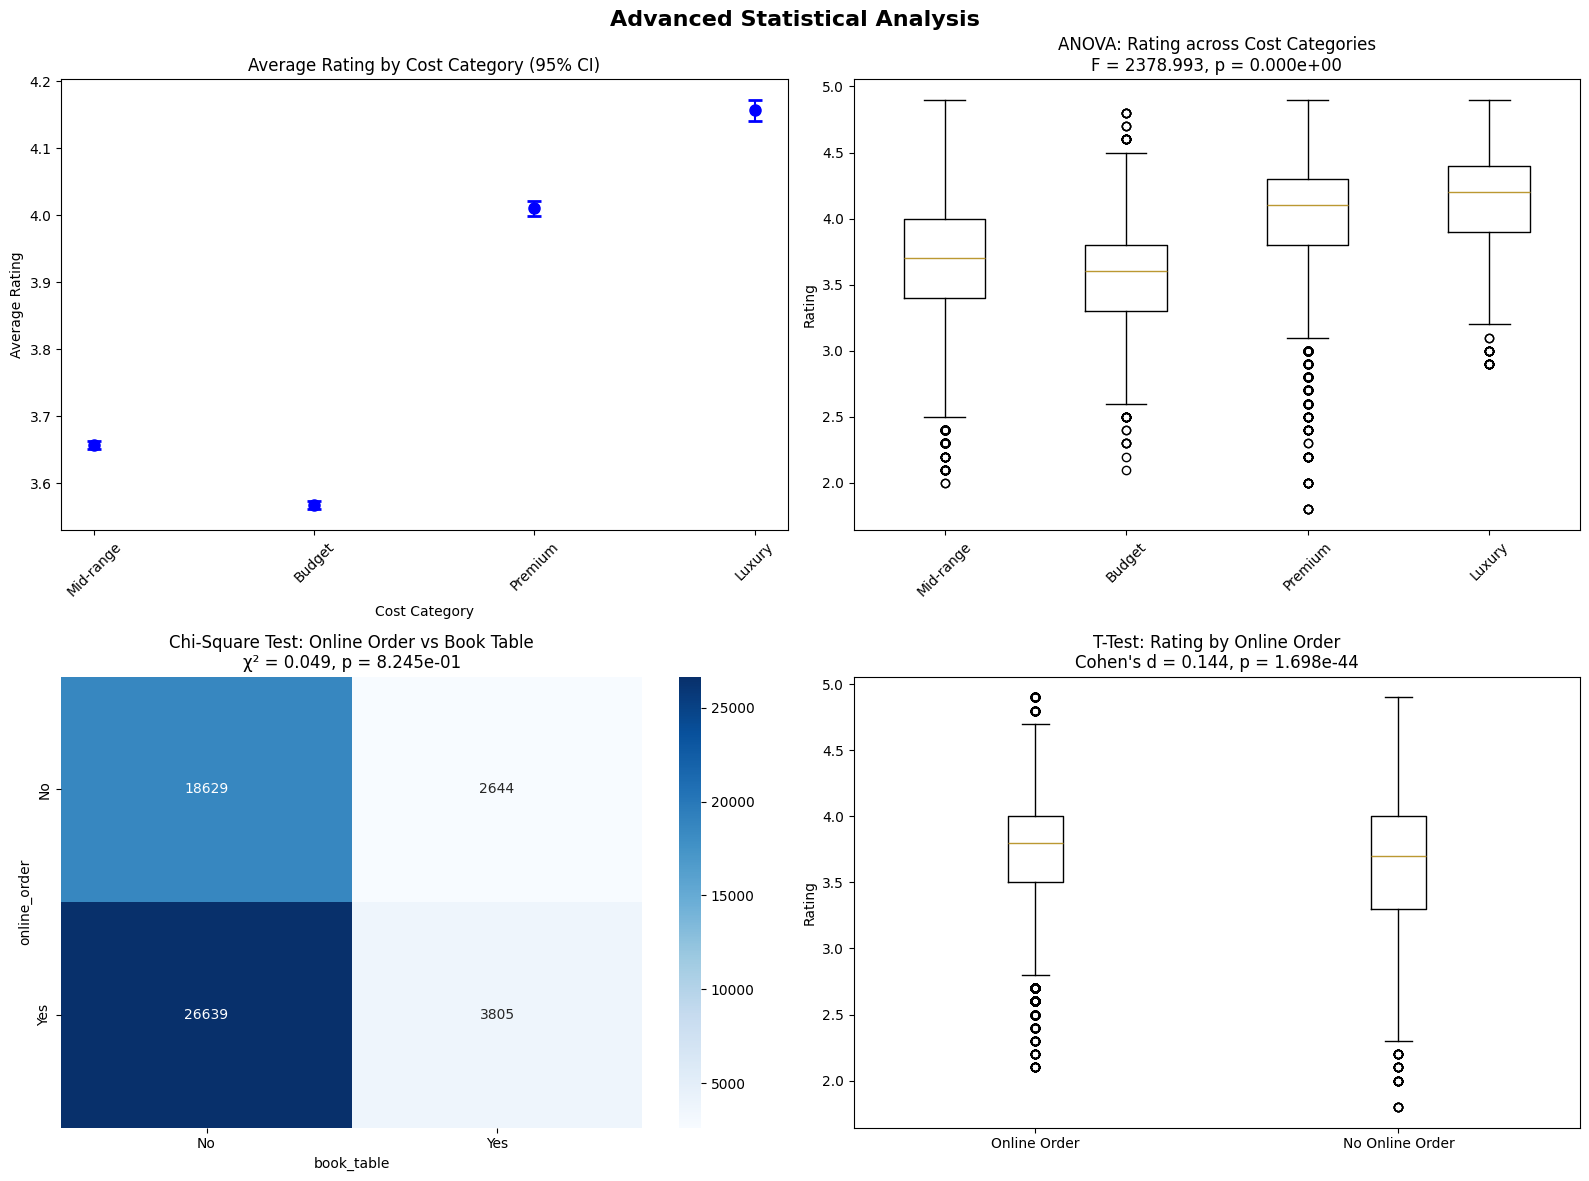


🔬 ADVANCED STATISTICAL RESULTS:
ANOVA Test (Rating across Cost Categories):
  F-statistic: 2378.993
  P-value: 0.000e+00
  Significance: ***

Chi-Square Test (Online Order vs Book Table):
  Chi-square statistic: 0.049
  P-value: 8.245e-01
  Degrees of freedom: 1
  Significance: Not significant

T-Test (Rating by Online Order):
  T-statistic: 14.010
  P-value: 1.698e-44
  Cohen's d: 0.144
  Effect size interpretation: Small
  Online order restaurants: 27,206 (mean rating: 3.72)
  No online order restaurants: 14,459 (mean rating: 3.66)
  Mid-range: 21,301 restaurants (mean rating: 3.66)
  Budget: 12,587 restaurants (mean rating: 3.57)
  Premium: 5,775 restaurants (mean rating: 4.01)
  Luxury: 1,755 restaurants (mean rating: 4.16)


In [48]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Advanced Statistical Analysis', fontsize=16, fontweight='bold')

cost_categories = df['cost_category'].dropna().unique()
rating_means = []
rating_stds = []
rating_counts = []
category_names = []

for category in cost_categories:
    category_data = df[df['cost_category'] == category]['rate_clean'].dropna()
    if len(category_data) > 0:
        rating_means.append(category_data.mean())
        rating_stds.append(category_data.std())
        rating_counts.append(len(category_data))
        category_names.append(category)

confidence_intervals = []
for i, (mean, std, count) in enumerate(zip(rating_means, rating_stds, rating_counts)):
    if count > 1:  
        ci = stats.t.interval(0.95, count-1, loc=mean, scale=std/np.sqrt(count))
        confidence_intervals.append(ci)
    else:
        confidence_intervals.append((mean, mean))  # Single observation

x_pos = np.arange(len(category_names))
yerr = [(ci[1]-ci[0])/2 for ci in confidence_intervals]
axes[0, 0].errorbar(x_pos, rating_means, yerr=yerr,
                   fmt='o', capsize=5, capthick=2, markersize=8, color='blue')
axes[0, 0].set_xlabel('Cost Category')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].set_title('Average Rating by Cost Category (95% CI)')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(category_names, rotation=45)

category_groups = [df[df['cost_category'] == cat]['rate_clean'].dropna() for cat in cost_categories]
category_groups = [group for group in category_groups if len(group) > 0]

if len(category_groups) >= 2:  
    f_stat, p_value = f_oneway(*category_groups)
    axes[0, 1].boxplot(category_groups, labels=category_names)
    axes[0, 1].set_title(f'ANOVA: Rating across Cost Categories\nF = {f_stat:.3f}, p = {p_value:.3e}')
else:
    axes[0, 1].text(0.5, 0.5, 'Insufficient data for ANOVA', 
                   ha='center', va='center', transform=axes[0, 1].transAxes)
    axes[0, 1].set_title('ANOVA: Insufficient Data')

axes[0, 1].set_ylabel('Rating')
axes[0, 1].tick_params(axis='x', rotation=45)

contingency_table = pd.crosstab(df['online_order'], df['book_table'])
chi2, p_value_chi, dof, expected = stats.chi2_contingency(contingency_table)

sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title(f'Chi-Square Test: Online Order vs Book Table\nχ² = {chi2:.3f}, p = {p_value_chi:.3e}')

online_rating = df[df['online_order'] == 'Yes']['rate_clean'].dropna()
no_online_rating = df[df['online_order'] == 'No']['rate_clean'].dropna()

if len(online_rating) > 0 and len(no_online_rating) > 0:
    pooled_std = np.sqrt(((len(online_rating)-1)*online_rating.var() + (len(no_online_rating)-1)*no_online_rating.var()) / (len(online_rating) + len(no_online_rating) - 2))
    cohens_d = (online_rating.mean() - no_online_rating.mean()) / pooled_std

    t_stat, p_value_ttest = stats.ttest_ind(online_rating, no_online_rating)

    axes[1, 1].boxplot([online_rating, no_online_rating], labels=['Online Order', 'No Online Order'])
    axes[1, 1].set_title(f'T-Test: Rating by Online Order\nCohen\'s d = {cohens_d:.3f}, p = {p_value_ttest:.3e}')
else:
    axes[1, 1].text(0.5, 0.5, 'Insufficient data for t-test', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('T-Test: Insufficient Data')

axes[1, 1].set_ylabel('Rating')

plt.tight_layout()
plt.show()

print("\n🔬 ADVANCED STATISTICAL RESULTS:")
print("=" * 50)

if len(category_groups) >= 2:
    print(f"ANOVA Test (Rating across Cost Categories):")
    print(f"  F-statistic: {f_stat:.3f}")
    print(f"  P-value: {p_value:.3e}")
    print(f"  Significance: {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'Not significant'}")
else:
    print("ANOVA Test: Insufficient data (need at least 2 groups)")

print(f"\nChi-Square Test (Online Order vs Book Table):")
print(f"  Chi-square statistic: {chi2:.3f}")
print(f"  P-value: {p_value_chi:.3e}")
print(f"  Degrees of freedom: {dof}")
print(f"  Significance: {'***' if p_value_chi < 0.001 else '**' if p_value_chi < 0.01 else '*' if p_value_chi < 0.05 else 'Not significant'}")

if len(online_rating) > 0 and len(no_online_rating) > 0:
    print(f"\nT-Test (Rating by Online Order):")
    print(f"  T-statistic: {t_stat:.3f}")
    print(f"  P-value: {p_value_ttest:.3e}")
    print(f"  Cohen's d: {cohens_d:.3f}")
    print(f"  Effect size interpretation: {'Large' if abs(cohens_d) > 0.8 else 'Medium' if abs(cohens_d) > 0.5 else 'Small'}")
    
    print(f"  Online order restaurants: {len(online_rating):,} (mean rating: {online_rating.mean():.2f})")
    print(f"  No online order restaurants: {len(no_online_rating):,} (mean rating: {no_online_rating.mean():.2f})")
else:
    print("\nT-Test: Insufficient data for comparison")
for i, category in enumerate(category_names):
    print(f"  {category}: {rating_counts[i]:,} restaurants (mean rating: {rating_means[i]:.2f})")

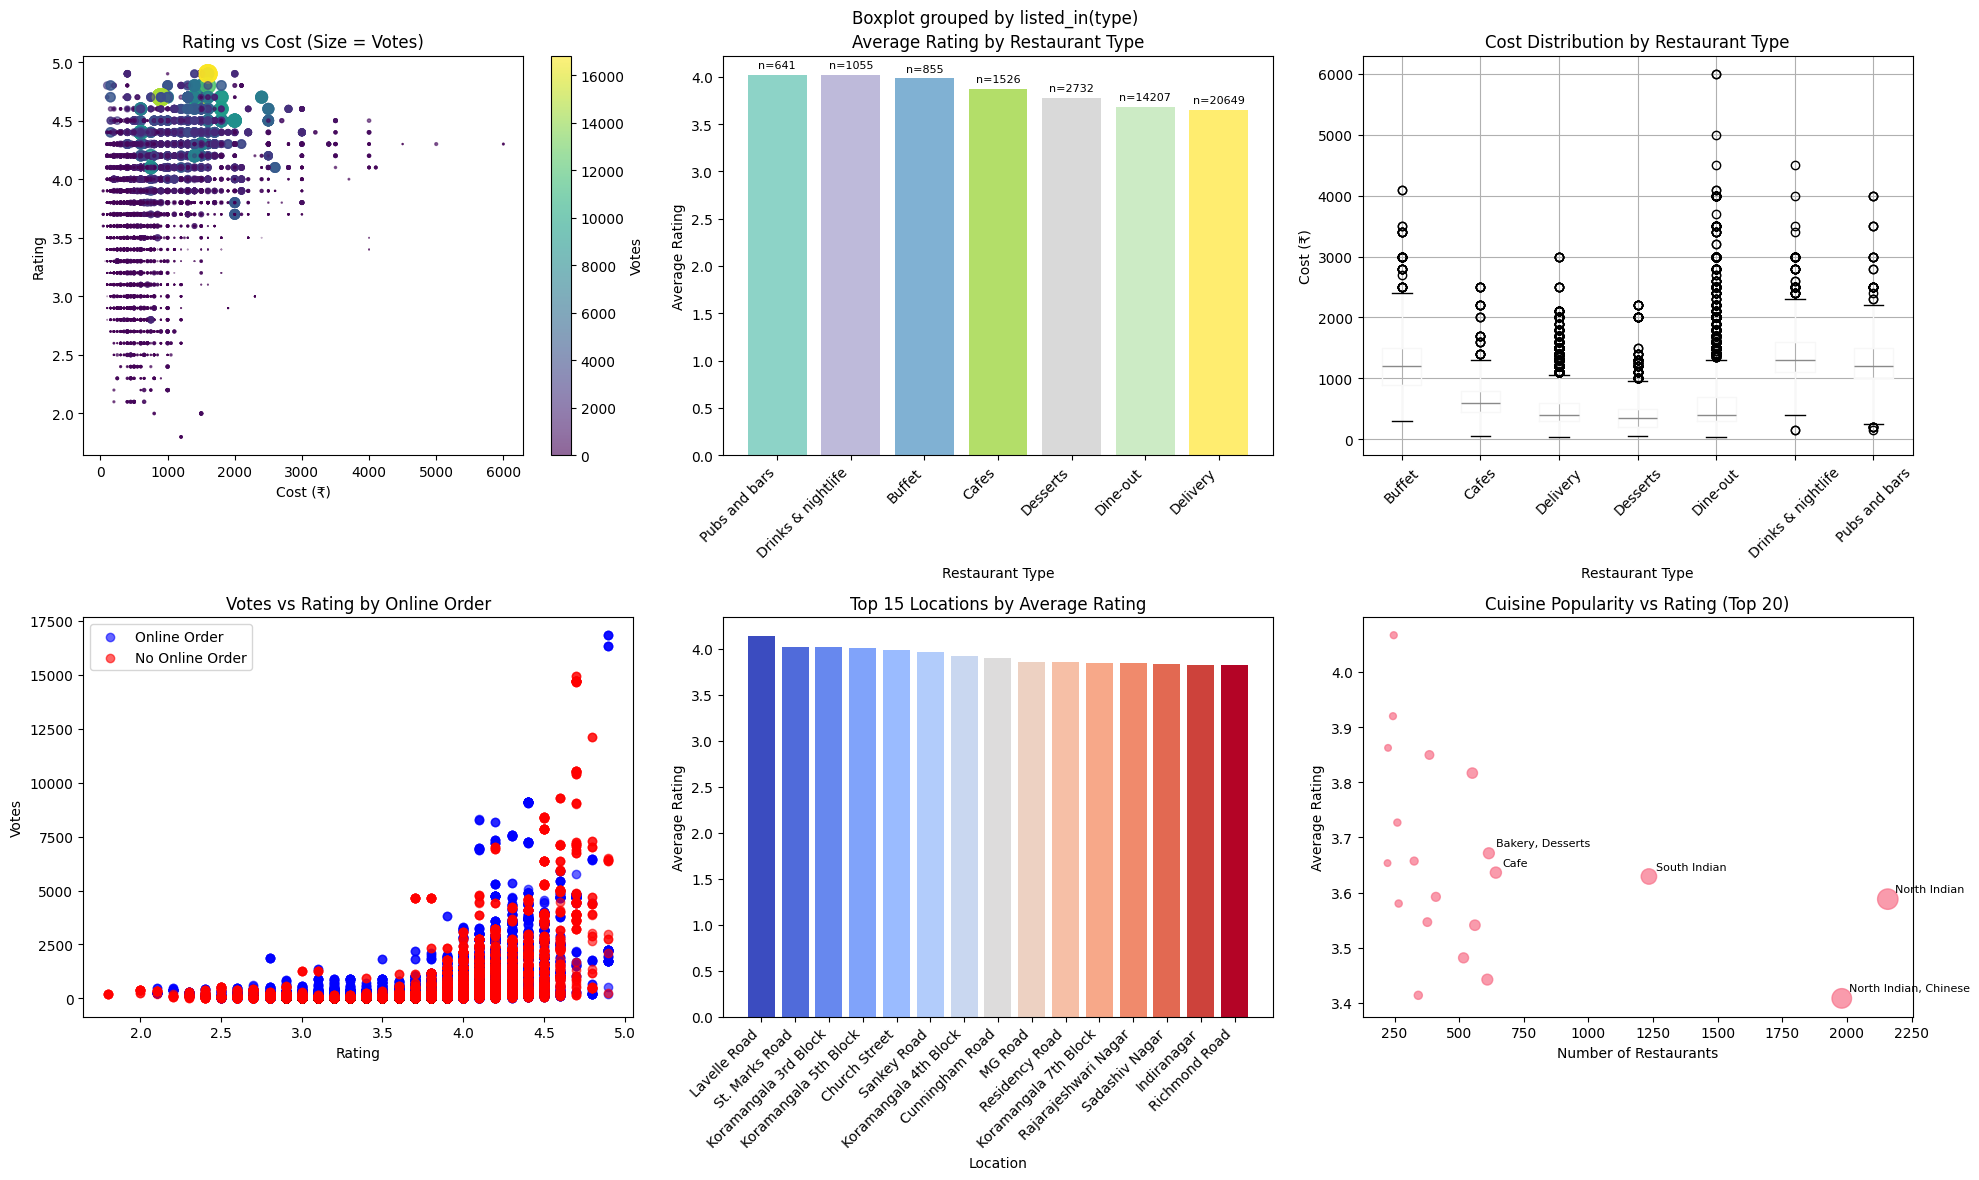

Top 5 Restaurant Types by Rating:
  1. Pubs and bars: 4.02 (641.0 restaurants)
  2. Drinks & nightlife: 4.02 (1055.0 restaurants)
  3. Buffet: 3.98 (855.0 restaurants)
  4. Cafes: 3.87 (1526.0 restaurants)
  5. Desserts: 3.78 (2732.0 restaurants)

Top 5 Locations by Rating:
  1. Lavelle Road: 4.14 (487.0 restaurants)
  2. St. Marks Road: 4.02 (343.0 restaurants)
  3. Koramangala 3rd Block: 4.02 (191.0 restaurants)
  4. Koramangala 5th Block: 4.01 (2319.0 restaurants)
  5. Church Street: 3.99 (546.0 restaurants)

Top 5 Most Popular Cuisines:
  1. North Indian: 2158.0 restaurants (avg rating: 3.59)
  2. North Indian, Chinese: 1980.0 restaurants (avg rating: 3.41)
  3. South Indian: 1234.0 restaurants (avg rating: 3.63)
  4. Cafe: 642.0 restaurants (avg rating: 3.64)
  5. Bakery, Desserts: 615.0 restaurants (avg rating: 3.67)


In [49]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Multi-Dimensional Restaurant Analysis', fontsize=16, fontweight='bold')

scatter = axes[0, 0].scatter(df['cost_clean'], df['rate_clean'], 
                           c=df['votes'], s=df['votes']/100, alpha=0.6, cmap='viridis')
axes[0, 0].set_xlabel('Cost (₹)')
axes[0, 0].set_ylabel('Rating')
axes[0, 0].set_title('Rating vs Cost (Size = Votes)')
plt.colorbar(scatter, ax=axes[0, 0], label='Votes')

type_rating = df.groupby('listed_in(type)')['rate_clean'].agg(['mean', 'count']).sort_values('mean', ascending=False)
bars = axes[0, 1].bar(range(len(type_rating)), type_rating['mean'], 
                     color=plt.cm.Set3(np.linspace(0, 1, len(type_rating))))
axes[0, 1].set_xlabel('Restaurant Type')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating by Restaurant Type')
axes[0, 1].set_xticks(range(len(type_rating)))
axes[0, 1].set_xticklabels(type_rating.index, rotation=45, ha='right')

for i, (bar, count) in enumerate(zip(bars, type_rating['count'])):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                   f'n={count}', ha='center', va='bottom', fontsize=8)

df.boxplot(column='cost_clean', by='listed_in(type)', ax=axes[0, 2])
axes[0, 2].set_xlabel('Restaurant Type')
axes[0, 2].set_ylabel('Cost (₹)')
axes[0, 2].set_title('Cost Distribution by Restaurant Type')
axes[0, 2].tick_params(axis='x', rotation=45)

online_data = df[df['online_order'] == 'Yes']
no_online_data = df[df['online_order'] == 'No']

axes[1, 0].scatter(online_data['rate_clean'], online_data['votes'], 
                  alpha=0.6, label='Online Order', color='blue')
axes[1, 0].scatter(no_online_data['rate_clean'], no_online_data['votes'], 
                  alpha=0.6, label='No Online Order', color='red')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Votes')
axes[1, 0].set_title('Votes vs Rating by Online Order')
axes[1, 0].legend()
location_stats = df.groupby('location').agg({
    'rate_clean': ['mean', 'count'],
    'cost_clean': 'mean'
}).round(2)
location_stats.columns = ['avg_rating', 'restaurant_count', 'avg_cost']
location_stats = location_stats.sort_values('avg_rating', ascending=False).head(15)

bars = axes[1, 1].bar(range(len(location_stats)), location_stats['avg_rating'], 
                     color=plt.cm.coolwarm(np.linspace(0, 1, len(location_stats))))
axes[1, 1].set_xlabel('Location')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Top 15 Locations by Average Rating')
axes[1, 1].set_xticks(range(len(location_stats)))
axes[1, 1].set_xticklabels(location_stats.index, rotation=45, ha='right')

cuisine_stats = df.groupby('cuisines')['rate_clean'].agg(['mean', 'count']).sort_values('count', ascending=False).head(20)
scatter = axes[1, 2].scatter(cuisine_stats['count'], cuisine_stats['mean'], 
                           s=cuisine_stats['count']/10, alpha=0.7, cmap='plasma')
axes[1, 2].set_xlabel('Number of Restaurants')
axes[1, 2].set_ylabel('Average Rating')
axes[1, 2].set_title('Cuisine Popularity vs Rating (Top 20)')

for i, (cuisine, row) in enumerate(cuisine_stats.head(5).iterrows()):
    axes[1, 2].annotate(cuisine, (row['count'], row['mean']), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

print(f"Top 5 Restaurant Types by Rating:")
for i, (rest_type, row) in enumerate(type_rating.head(5).iterrows()):
    print(f"  {i+1}. {rest_type}: {row['mean']:.2f} ({row['count']} restaurants)")

print(f"\nTop 5 Locations by Rating:")
for i, (location, row) in enumerate(location_stats.head(5).iterrows()):
    print(f"  {i+1}. {location}: {row['avg_rating']:.2f} ({row['restaurant_count']} restaurants)")

print(f"\nTop 5 Most Popular Cuisines:")
for i, (cuisine, row) in enumerate(cuisine_stats.head(5).iterrows()):
    print(f"  {i+1}. {cuisine}: {row['count']} restaurants (avg rating: {row['mean']:.2f})")

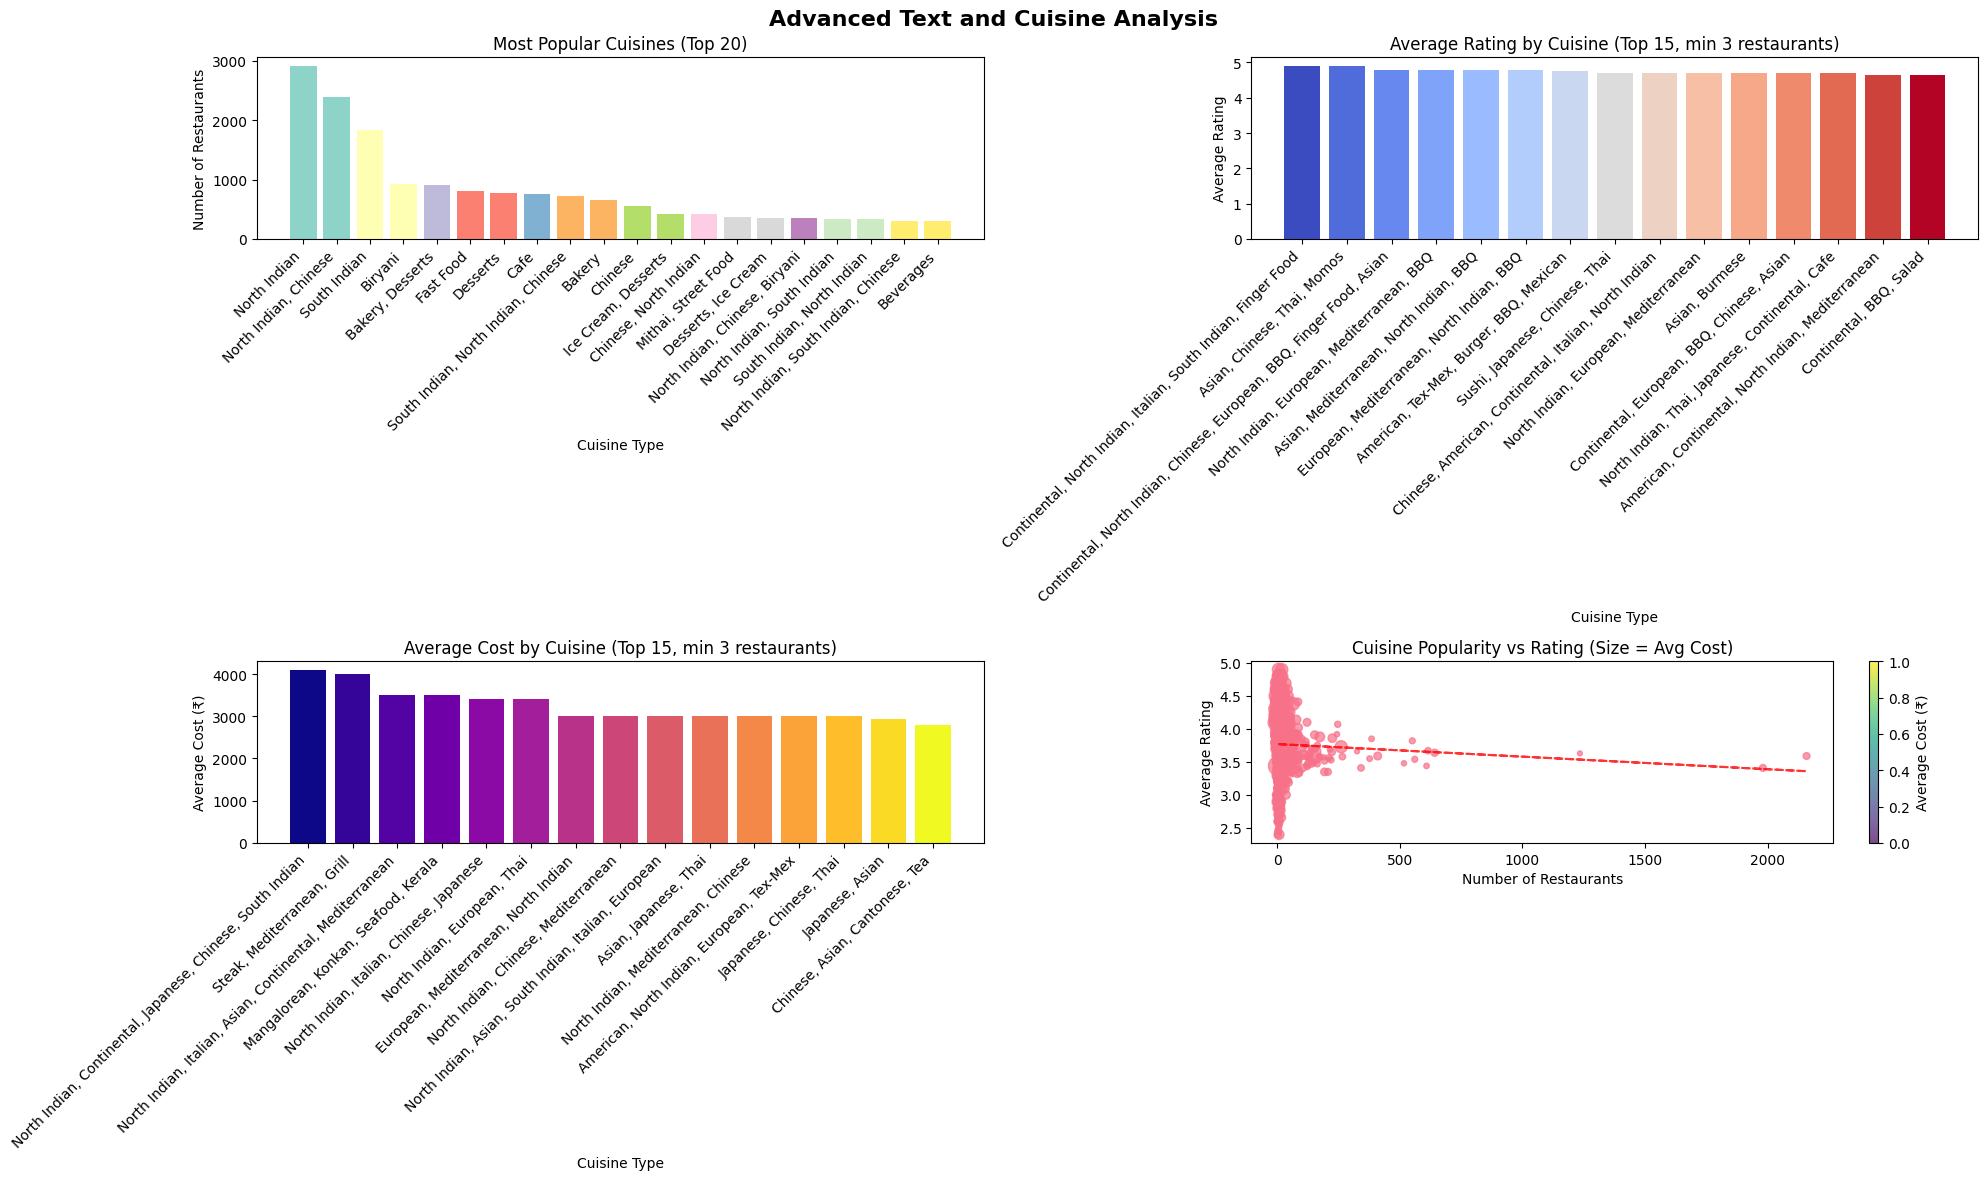

Top 5 Most Popular Cuisines:
  1. North Indian: 2913 restaurants
  2. North Indian, Chinese: 2385 restaurants
  3. South Indian: 1828 restaurants
  4. Biryani: 918 restaurants
  5. Bakery, Desserts: 911 restaurants

Top 5 Highest Rated Cuisines (min 3 restaurants):
  1. Continental, North Indian, Italian, South Indian, Finger Food: 4.90 (6.0 restaurants)
  2. Asian, Chinese, Thai, Momos: 4.90 (19.0 restaurants)
  3. Continental, North Indian, Chinese, European, BBQ, Finger Food, Asian: 4.80 (10.0 restaurants)
  4. North Indian, European, Mediterranean, BBQ: 4.80 (5.0 restaurants)
  5. Asian, Mediterranean, North Indian, BBQ: 4.80 (6.0 restaurants)

Top 5 Most Expensive Cuisines (min 3 restaurants):
  1. North Indian, Continental, Japanese, Chinese, South Indian: ₹4100 (4.0 restaurants)
  2. Steak, Mediterranean, Grill: ₹4000 (5.0 restaurants)
  3. North Indian, Italian, Asian, Continental, Mediterranean: ₹3500 (4.0 restaurants)
  4. Mangalorean, Konkan, Seafood, Kerala: ₹3500 (5.0 rest

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Advanced Text and Cuisine Analysis', fontsize=16, fontweight='bold')

cuisine_counts = df['cuisines'].value_counts().head(20)
bars = axes[0, 0].bar(range(len(cuisine_counts)), cuisine_counts.values, 
                     color=plt.cm.Set3(np.linspace(0, 1, len(cuisine_counts))))
axes[0, 0].set_xlabel('Cuisine Type')
axes[0, 0].set_ylabel('Number of Restaurants')
axes[0, 0].set_title('Most Popular Cuisines (Top 20)')
axes[0, 0].set_xticks(range(len(cuisine_counts)))
axes[0, 0].set_xticklabels(cuisine_counts.index, rotation=45, ha='right')

cuisine_rating = df.groupby('cuisines')['rate_clean'].agg(['mean', 'count']).sort_values('mean', ascending=False)
cuisine_rating = cuisine_rating[cuisine_rating['count'] >= 3].head(15)  

bars = axes[0, 1].bar(range(len(cuisine_rating)), cuisine_rating['mean'], 
                     color=plt.cm.coolwarm(np.linspace(0, 1, len(cuisine_rating))))
axes[0, 1].set_xlabel('Cuisine Type')
axes[0, 1].set_ylabel('Average Rating')
axes[0, 1].set_title('Average Rating by Cuisine (Top 15, min 3 restaurants)')
axes[0, 1].set_xticks(range(len(cuisine_rating)))
axes[0, 1].set_xticklabels(cuisine_rating.index, rotation=45, ha='right')

cuisine_cost = df.groupby('cuisines')['cost_clean'].agg(['mean', 'count']).sort_values('mean', ascending=False)
cuisine_cost = cuisine_cost[cuisine_cost['count'] >= 3].head(15)

bars = axes[1, 0].bar(range(len(cuisine_cost)), cuisine_cost['mean'], 
                     color=plt.cm.plasma(np.linspace(0, 1, len(cuisine_cost))))
axes[1, 0].set_xlabel('Cuisine Type')
axes[1, 0].set_ylabel('Average Cost (₹)')
axes[1, 0].set_title('Average Cost by Cuisine (Top 15, min 3 restaurants)')
axes[1, 0].set_xticks(range(len(cuisine_cost)))
axes[1, 0].set_xticklabels(cuisine_cost.index, rotation=45, ha='right')

cuisine_stats = df.groupby('cuisines').agg({
    'rate_clean': ['mean', 'count'],
    'cost_clean': 'mean'
}).round(2)
cuisine_stats.columns = ['avg_rating', 'restaurant_count', 'avg_cost']
cuisine_stats = cuisine_stats[cuisine_stats['restaurant_count'] >= 3]

scatter = axes[1, 1].scatter(cuisine_stats['restaurant_count'], cuisine_stats['avg_rating'], 
                           s=cuisine_stats['avg_cost']/20, alpha=0.7, cmap='viridis')
axes[1, 1].set_xlabel('Number of Restaurants')
axes[1, 1].set_ylabel('Average Rating')
axes[1, 1].set_title('Cuisine Popularity vs Rating (Size = Avg Cost)')

z = np.polyfit(cuisine_stats['restaurant_count'], cuisine_stats['avg_rating'], 1)
p = np.poly1d(z)
axes[1, 1].plot(cuisine_stats['restaurant_count'], p(cuisine_stats['restaurant_count']), "r--", alpha=0.8)

plt.colorbar(scatter, ax=axes[1, 1], label='Average Cost (₹)')

plt.tight_layout()
plt.show()

print("Top 5 Most Popular Cuisines:")
for i, (cuisine, count) in enumerate(cuisine_counts.head(5).items()):
    print(f"  {i+1}. {cuisine}: {count} restaurants")

print(f"\nTop 5 Highest Rated Cuisines (min 3 restaurants):")
for i, (cuisine, row) in enumerate(cuisine_rating.head(5).iterrows()):
    print(f"  {i+1}. {cuisine}: {row['mean']:.2f} ({row['count']} restaurants)")

print(f"\nTop 5 Most Expensive Cuisines (min 3 restaurants):")
for i, (cuisine, row) in enumerate(cuisine_cost.head(5).iterrows()):
    print(f"  {i+1}. {cuisine}: ₹{row['mean']:.0f} ({row['count']} restaurants)")

print(f"  Total unique cuisines: {df['cuisines'].nunique()}")
print(f"  Most common cuisine: {df['cuisines'].mode()[0]} ({df['cuisines'].value_counts().iloc[0]} restaurants)")
print(f"  Cuisines with only 1 restaurant: {(df['cuisines'].value_counts() == 1).sum()}")
corr = cuisine_stats['restaurant_count'].corr(cuisine_stats['avg_rating'])
print(f"  Correlation between popularity and rating: {corr:.3f}")

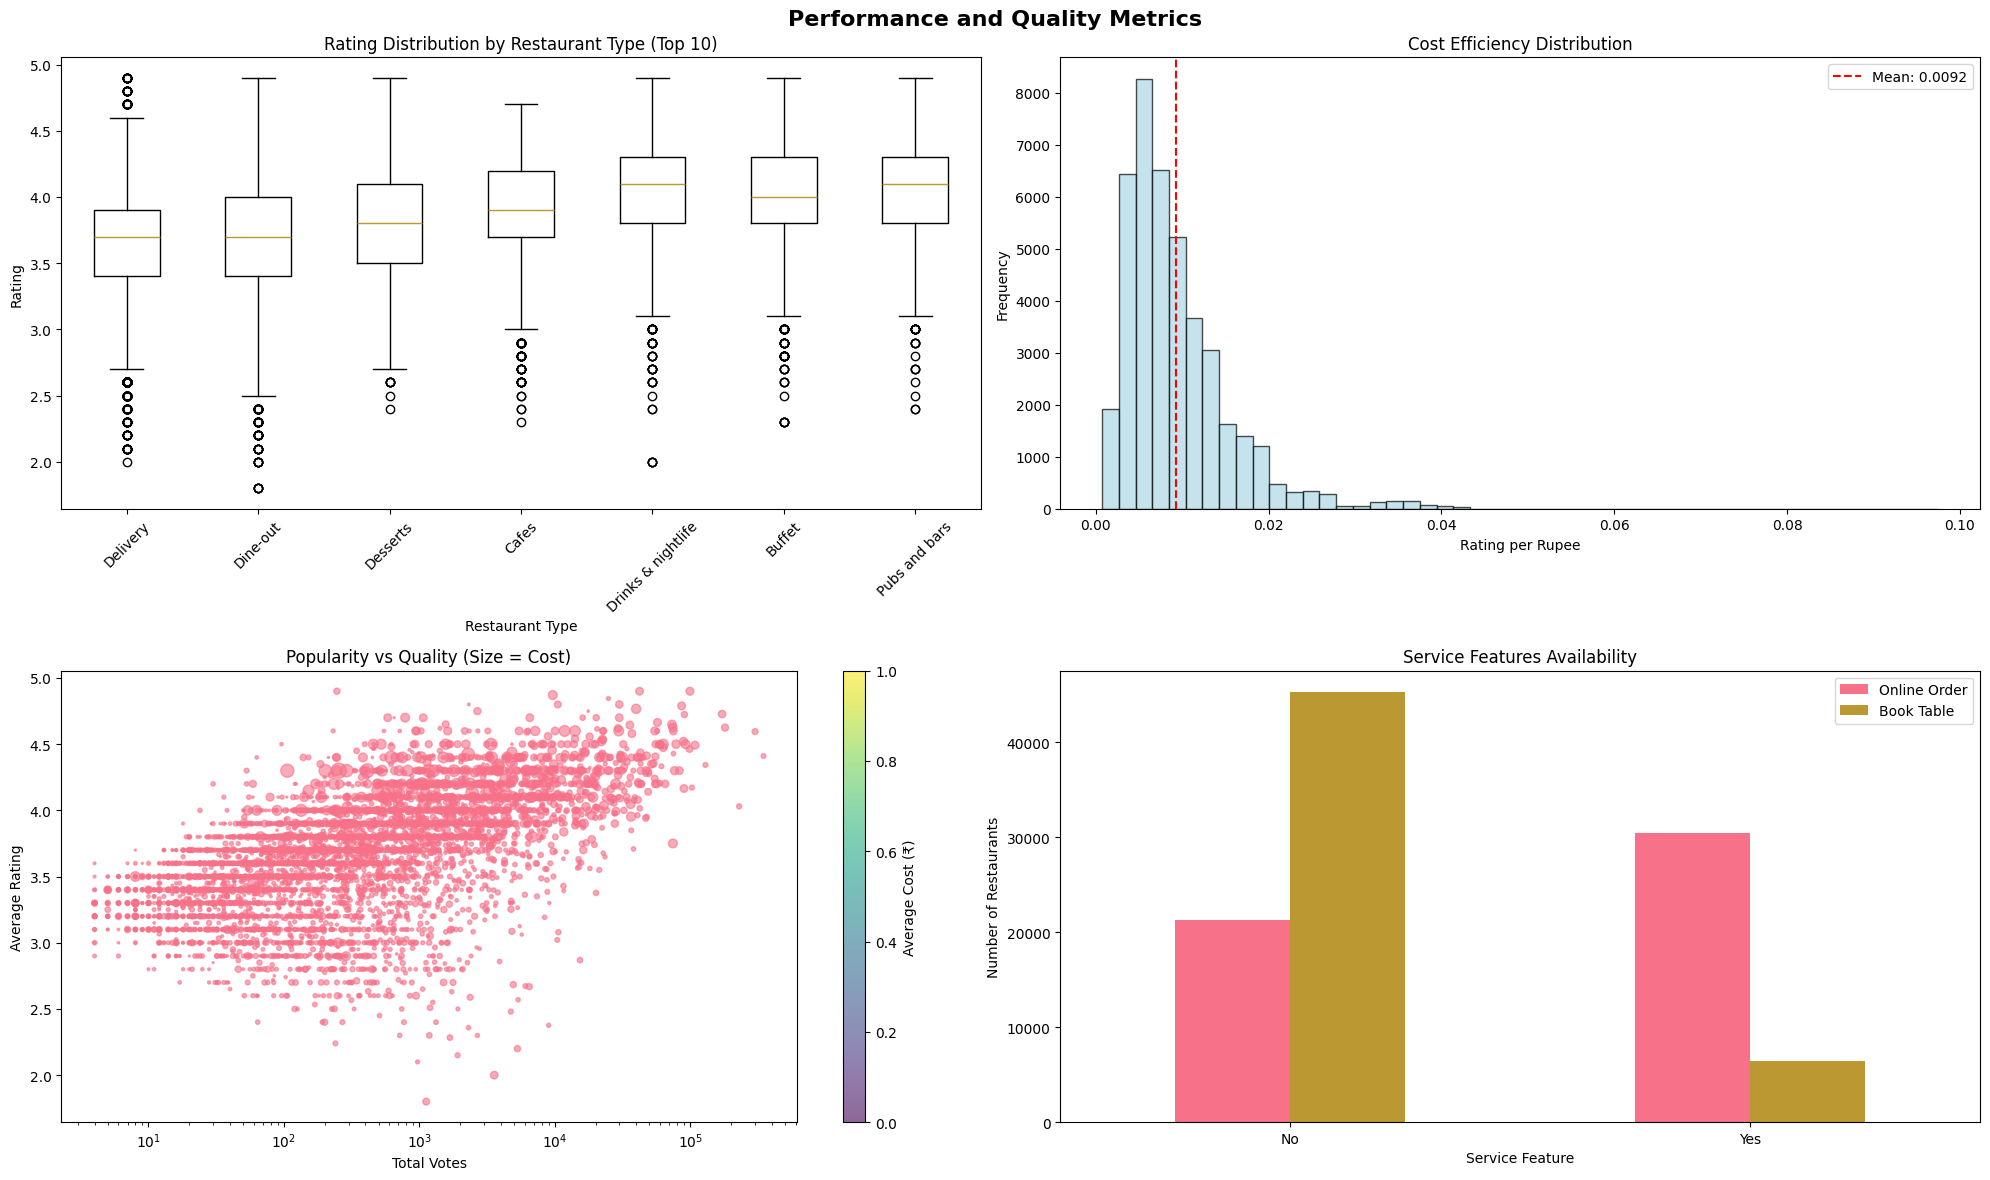

Cost Efficiency Analysis:
  Mean rating per rupee: 0.0092
  Median rating per rupee: 0.0077
  Best value restaurants (top 5):
    Srinidhi Sagar: 3.9★ for ₹40 (0.0975)
    Srinidhi Sagar: 3.9★ for ₹40 (0.0975)
    Srinidhi Sagar Food Line: 3.7★ for ₹40 (0.0925)
    Srinidhi Sagar Food Line: 3.7★ for ₹40 (0.0925)
    Srinidhi Sagar Food Line: 3.7★ for ₹40 (0.0925)

Service Features Analysis:
  Restaurants with online ordering: 58.9%
  Restaurants with table booking: 12.5%
  Restaurants with both services: 7.4%
  Correlation between popularity and quality: 0.292

Restaurant Type Performance (Top 5 by average rating):
  1. Pubs and bars: 4.02 (641.0 restaurants)
  2. Drinks & nightlife: 4.02 (1055.0 restaurants)
  3. Buffet: 3.98 (855.0 restaurants)
  4. Cafes: 3.87 (1526.0 restaurants)
  5. Desserts: 3.78 (2732.0 restaurants)


In [51]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Performance and Quality Metrics', fontsize=16, fontweight='bold')

restaurant_types = df['listed_in(type)'].value_counts().head(10).index
type_rating_data = [df[df['listed_in(type)'] == rt]['rate_clean'].dropna() for rt in restaurant_types]

axes[0, 0].boxplot(type_rating_data, labels=restaurant_types)
axes[0, 0].set_xlabel('Restaurant Type')
axes[0, 0].set_ylabel('Rating')
axes[0, 0].set_title('Rating Distribution by Restaurant Type (Top 10)')
axes[0, 0].tick_params(axis='x', rotation=45)

df['rating_per_rupee'] = df['rate_clean'] / df['cost_clean']
efficiency_data = df[df['rating_per_rupee'].notna() & (df['rating_per_rupee'] > 0)]

if len(efficiency_data) > 0:
    axes[0, 1].hist(efficiency_data['rating_per_rupee'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    axes[0, 1].set_xlabel('Rating per Rupee')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_title('Cost Efficiency Distribution')
    axes[0, 1].axvline(efficiency_data['rating_per_rupee'].mean(), color='red', linestyle='--', 
                      label=f'Mean: {efficiency_data["rating_per_rupee"].mean():.4f}')
    axes[0, 1].legend()

popularity_quality = df.groupby('name').agg({
    'rate_clean': 'mean',
    'votes': 'sum',
    'cost_clean': 'mean'
}).reset_index()
popularity_quality = popularity_quality[popularity_quality['votes'] > 0]

if len(popularity_quality) > 0:
    scatter = axes[1, 0].scatter(popularity_quality['votes'], popularity_quality['rate_clean'], 
                               s=popularity_quality['cost_clean']/50, alpha=0.6, cmap='viridis')
    axes[1, 0].set_xlabel('Total Votes')
    axes[1, 0].set_ylabel('Average Rating')
    axes[1, 0].set_title('Popularity vs Quality (Size = Cost)')
    axes[1, 0].set_xscale('log')
    plt.colorbar(scatter, ax=axes[1, 0], label='Average Cost (₹)')

service_features = pd.DataFrame({
    'Online Order': df['online_order'].value_counts(),
    'Book Table': df['book_table'].value_counts()
})

service_features.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Service Feature')
axes[1, 1].set_ylabel('Number of Restaurants')
axes[1, 1].set_title('Service Features Availability')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


if len(efficiency_data) > 0:
    print("Cost Efficiency Analysis:")
    print(f"  Mean rating per rupee: {efficiency_data['rating_per_rupee'].mean():.4f}")
    print(f"  Median rating per rupee: {efficiency_data['rating_per_rupee'].median():.4f}")
    print(f"  Best value restaurants (top 5):")
    best_value = efficiency_data.nlargest(5, 'rating_per_rupee')[['name', 'rate_clean', 'cost_clean', 'rating_per_rupee']]
    for _, row in best_value.iterrows():
        print(f"    {row['name']}: {row['rate_clean']:.1f}★ for ₹{row['cost_clean']:.0f} ({row['rating_per_rupee']:.4f})")

print(f"\nService Features Analysis:")
online_pct = (df['online_order'] == 'Yes').mean() * 100
book_pct = (df['book_table'] == 'Yes').mean() * 100
both_pct = ((df['online_order'] == 'Yes') & (df['book_table'] == 'Yes')).mean() * 100

print(f"  Restaurants with online ordering: {online_pct:.1f}%")
print(f"  Restaurants with table booking: {book_pct:.1f}%")
print(f"  Restaurants with both services: {both_pct:.1f}%")

if len(popularity_quality) > 0:
    corr = popularity_quality['votes'].corr(popularity_quality['rate_clean'])
    print(f"  Correlation between popularity and quality: {corr:.3f}")

print(f"\nRestaurant Type Performance (Top 5 by average rating):")
type_performance = df.groupby('listed_in(type)')['rate_clean'].agg(['mean', 'count']).sort_values('mean', ascending=False)
for i, (rest_type, row) in enumerate(type_performance.head(5).iterrows()):
    print(f"  {i+1}. {rest_type}: {row['mean']:.2f} ({row['count']} restaurants)")

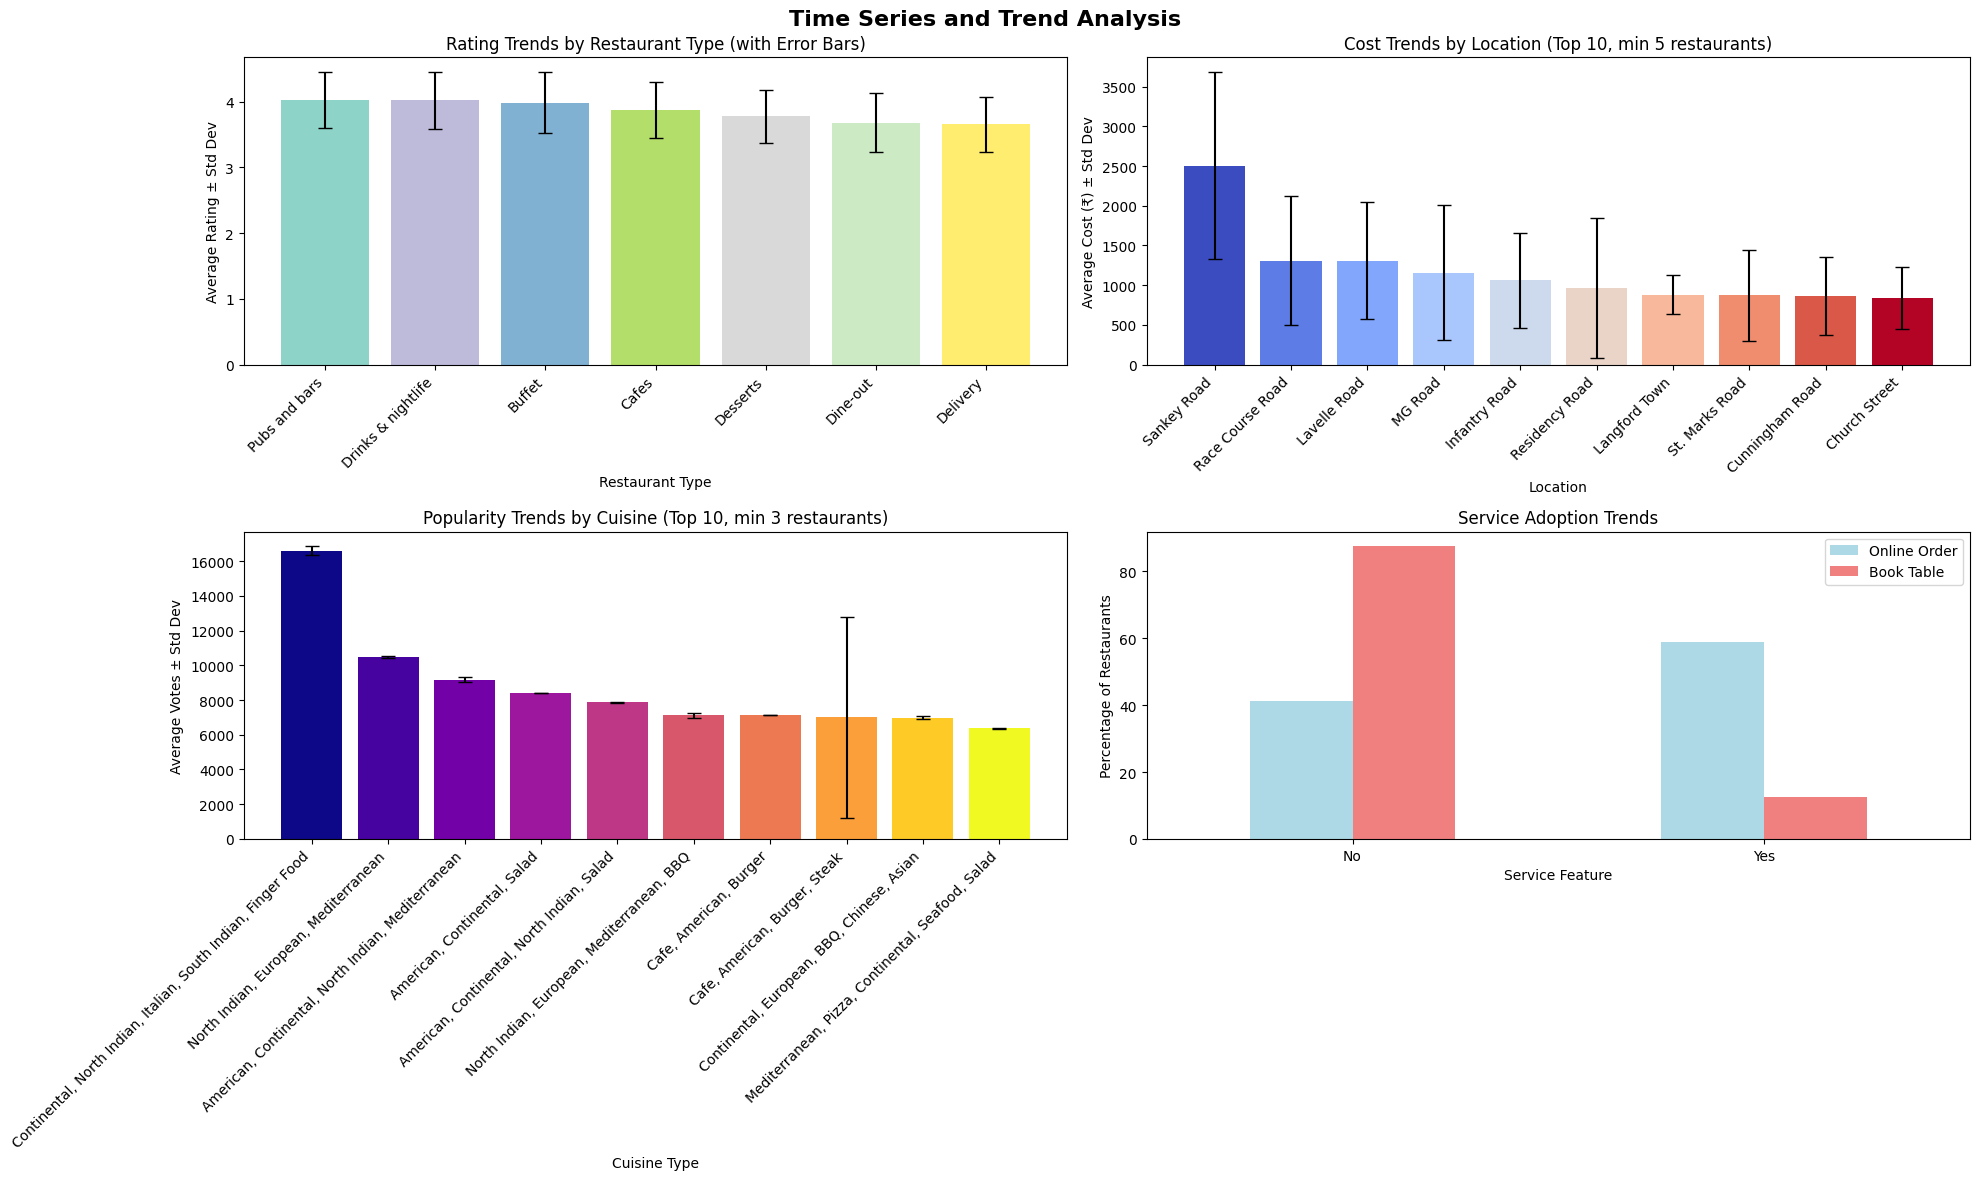

Top 5 Restaurant Types by Average Rating:
  1. Pubs and bars: 4.02 ± 0.42 (641.0 restaurants)
  2. Drinks & nightlife: 4.02 ± 0.43 (1055.0 restaurants)
  3. Buffet: 3.98 ± 0.46 (855.0 restaurants)
  4. Cafes: 3.87 ± 0.43 (1526.0 restaurants)
  5. Desserts: 3.78 ± 0.40 (2732.0 restaurants)

Top 5 Most Expensive Locations:
  1. Sankey Road: ₹2506 ± ₹1177 (27.0 restaurants)
  2. Race Course Road: ₹1309 ± ₹814 (139.0 restaurants)
  3. Lavelle Road: ₹1308 ± ₹736 (523.0 restaurants)
  4. MG Road: ₹1156 ± ₹851 (894.0 restaurants)
  5. Infantry Road: ₹1062 ± ₹597 (151.0 restaurants)

Top 5 Most Popular Cuisines:
  1. Continental, North Indian, Italian, South Indian, Finger Food: 16588 ± 267 votes (6.0 restaurants)
  2. North Indian, European, Mediterranean: 10499 ± 52 votes (13.0 restaurants)
  3. American, Continental, North Indian, Mediterranean: 9164 ± 138 votes (8.0 restaurants)
  4. American, Continental, Salad: 8379 ± 4 votes (5.0 restaurants)
  5. American, Continental, North Indian, Sa

In [52]:

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Time Series and Trend Analysis', fontsize=16, fontweight='bold')

restaurant_types = df['listed_in(type)'].value_counts().head(8).index
type_rating_trends = df.groupby('listed_in(type)')['rate_clean'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)

bars = axes[0, 0].bar(range(len(type_rating_trends)), type_rating_trends['mean'], 
                     yerr=type_rating_trends['std'], capsize=5, 
                     color=plt.cm.Set3(np.linspace(0, 1, len(type_rating_trends))))
axes[0, 0].set_xlabel('Restaurant Type')
axes[0, 0].set_ylabel('Average Rating ± Std Dev')
axes[0, 0].set_title('Rating Trends by Restaurant Type (with Error Bars)')
axes[0, 0].set_xticks(range(len(type_rating_trends)))
axes[0, 0].set_xticklabels(type_rating_trends.index, rotation=45, ha='right')

location_cost_trends = df.groupby('location')['cost_clean'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
location_cost_trends = location_cost_trends[location_cost_trends['count'] >= 5].head(10)

bars = axes[0, 1].bar(range(len(location_cost_trends)), location_cost_trends['mean'], 
                     yerr=location_cost_trends['std'], capsize=5,
                     color=plt.cm.coolwarm(np.linspace(0, 1, len(location_cost_trends))))
axes[0, 1].set_xlabel('Location')
axes[0, 1].set_ylabel('Average Cost (₹) ± Std Dev')
axes[0, 1].set_title('Cost Trends by Location (Top 10, min 5 restaurants)')
axes[0, 1].set_xticks(range(len(location_cost_trends)))
axes[0, 1].set_xticklabels(location_cost_trends.index, rotation=45, ha='right')

cuisine_vote_trends = df.groupby('cuisines')['votes'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
cuisine_vote_trends = cuisine_vote_trends[cuisine_vote_trends['count'] >= 3].head(10)

bars = axes[1, 0].bar(range(len(cuisine_vote_trends)), cuisine_vote_trends['mean'], 
                     yerr=cuisine_vote_trends['std'], capsize=5,
                     color=plt.cm.plasma(np.linspace(0, 1, len(cuisine_vote_trends))))
axes[1, 0].set_xlabel('Cuisine Type')
axes[1, 0].set_ylabel('Average Votes ± Std Dev')
axes[1, 0].set_title('Popularity Trends by Cuisine (Top 10, min 3 restaurants)')
axes[1, 0].set_xticks(range(len(cuisine_vote_trends)))
axes[1, 0].set_xticklabels(cuisine_vote_trends.index, rotation=45, ha='right')

service_adoption = pd.DataFrame({
    'Online Order': df['online_order'].value_counts(normalize=True) * 100,
    'Book Table': df['book_table'].value_counts(normalize=True) * 100
})

service_adoption.plot(kind='bar', ax=axes[1, 1], color=['lightblue', 'lightcoral'])
axes[1, 1].set_xlabel('Service Feature')
axes[1, 1].set_ylabel('Percentage of Restaurants')
axes[1, 1].set_title('Service Adoption Trends')
axes[1, 1].legend()
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


print("Top 5 Restaurant Types by Average Rating:")
for i, (rest_type, row) in enumerate(type_rating_trends.head(5).iterrows()):
    print(f"  {i+1}. {rest_type}: {row['mean']:.2f} ± {row['std']:.2f} ({row['count']} restaurants)")

print(f"\nTop 5 Most Expensive Locations:")
for i, (location, row) in enumerate(location_cost_trends.head(5).iterrows()):
    print(f"  {i+1}. {location}: ₹{row['mean']:.0f} ± ₹{row['std']:.0f} ({row['count']} restaurants)")

print(f"\nTop 5 Most Popular Cuisines:")
for i, (cuisine, row) in enumerate(cuisine_vote_trends.head(5).iterrows()):
    print(f"  {i+1}. {cuisine}: {row['mean']:.0f} ± {row['std']:.0f} votes ({row['count']} restaurants)")

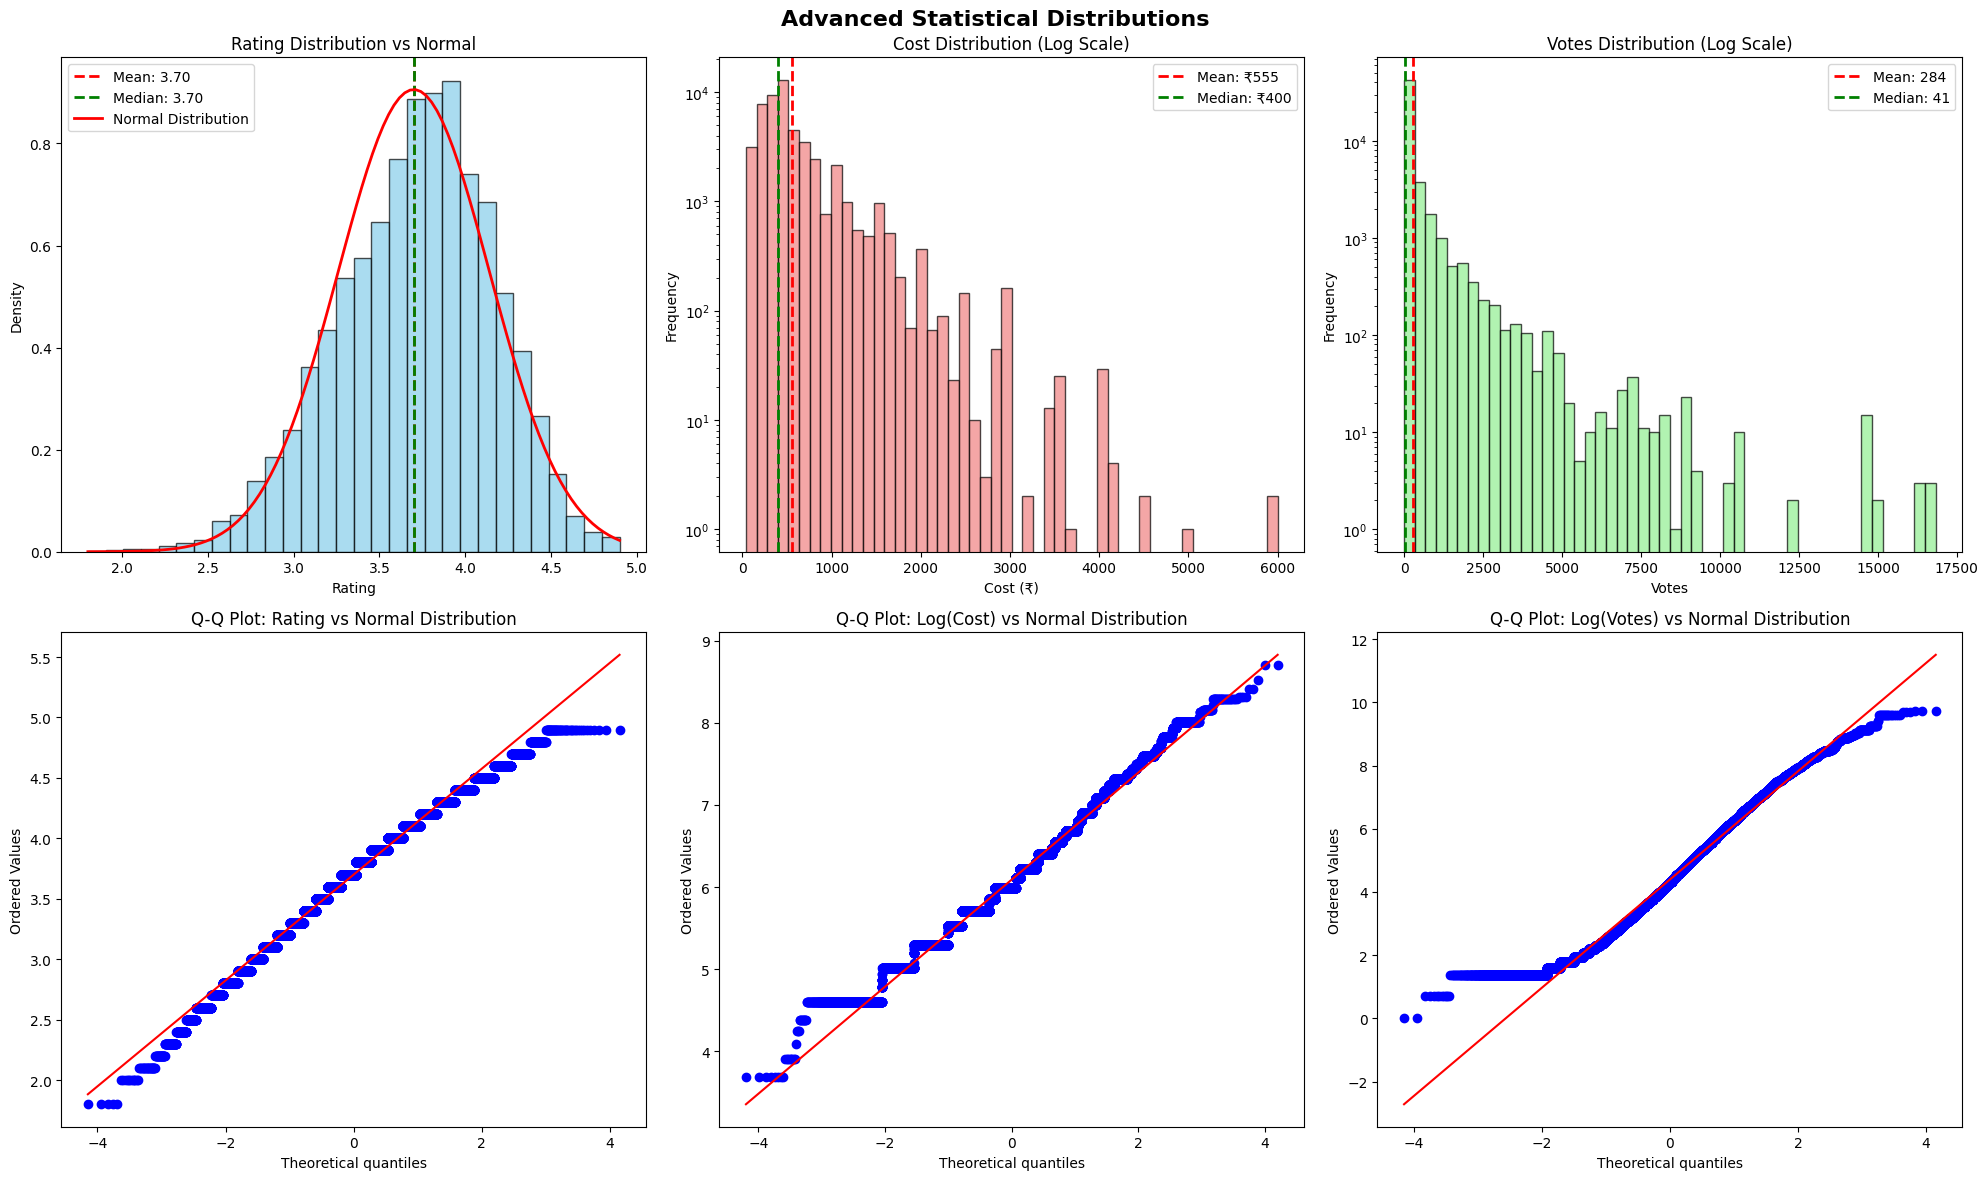

Rating - Shapiro-Wilk Test:
  Statistic: 0.9886
  P-value: 2.5934e-47
  Normal: No (α=0.05)

Cost - Anderson-Darling Test:
  Statistic: 3231.5016
  Critical values: [0.576 0.656 0.787 0.918 1.092]
  Significance levels: [15.  10.   5.   2.5  1. ]
  Normal: No (α=0.05)
Rating - Skewness: -0.329, Kurtosis: -0.007
Cost - Skewness: 2.602, Kurtosis: 10.450
Votes - Skewness: 7.548, Kurtosis: 88.867


In [53]:

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Advanced Statistical Distributions', fontsize=16, fontweight='bold')

rating_data = df['rate_clean'].dropna()
axes[0, 0].hist(rating_data, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(rating_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {rating_data.mean():.2f}')
axes[0, 0].axvline(rating_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {rating_data.median():.2f}')

x = np.linspace(rating_data.min(), rating_data.max(), 100)
y = stats.norm.pdf(x, rating_data.mean(), rating_data.std())
axes[0, 0].plot(x, y, 'r-', linewidth=2, label='Normal Distribution')
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Rating Distribution vs Normal')
axes[0, 0].legend()

cost_data = df['cost_clean'].dropna()
axes[0, 1].hist(cost_data, bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Cost (₹)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Cost Distribution (Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].axvline(cost_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ₹{cost_data.mean():.0f}')
axes[0, 1].axvline(cost_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: ₹{cost_data.median():.0f}')
axes[0, 1].legend()

votes_data = df['votes'].dropna()
axes[0, 2].hist(votes_data, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 2].set_xlabel('Votes')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Votes Distribution (Log Scale)')
axes[0, 2].set_yscale('log')
axes[0, 2].axvline(votes_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {votes_data.mean():.0f}')
axes[0, 2].axvline(votes_data.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {votes_data.median():.0f}')
axes[0, 2].legend()

stats.probplot(rating_data, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot: Rating vs Normal Distribution')

log_cost_data = np.log(cost_data[cost_data > 0])
stats.probplot(log_cost_data, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot: Log(Cost) vs Normal Distribution')

log_votes_data = np.log(votes_data[votes_data > 0])
stats.probplot(log_votes_data, dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q Plot: Log(Votes) vs Normal Distribution')

plt.tight_layout()
plt.show()
shapiro_stat, shapiro_p = shapiro(rating_data)
print(f"Rating - Shapiro-Wilk Test:")
print(f"  Statistic: {shapiro_stat:.4f}")
print(f"  P-value: {shapiro_p:.4e}")
print(f"  Normal: {'Yes' if shapiro_p > 0.05 else 'No'} (α=0.05)")

anderson_stat, anderson_crit, anderson_sig = anderson(cost_data)
print(f"\nCost - Anderson-Darling Test:")
print(f"  Statistic: {anderson_stat:.4f}")
print(f"  Critical values: {anderson_crit}")
print(f"  Significance levels: {anderson_sig}")
print(f"  Normal: {'Yes' if anderson_stat < anderson_crit[2] else 'No'} (α=0.05)")

print(f"Rating - Skewness: {rating_data.skew():.3f}, Kurtosis: {rating_data.kurtosis():.3f}")
print(f"Cost - Skewness: {cost_data.skew():.3f}, Kurtosis: {cost_data.kurtosis():.3f}")
print(f"Votes - Skewness: {votes_data.skew():.3f}, Kurtosis: {votes_data.kurtosis():.3f}")

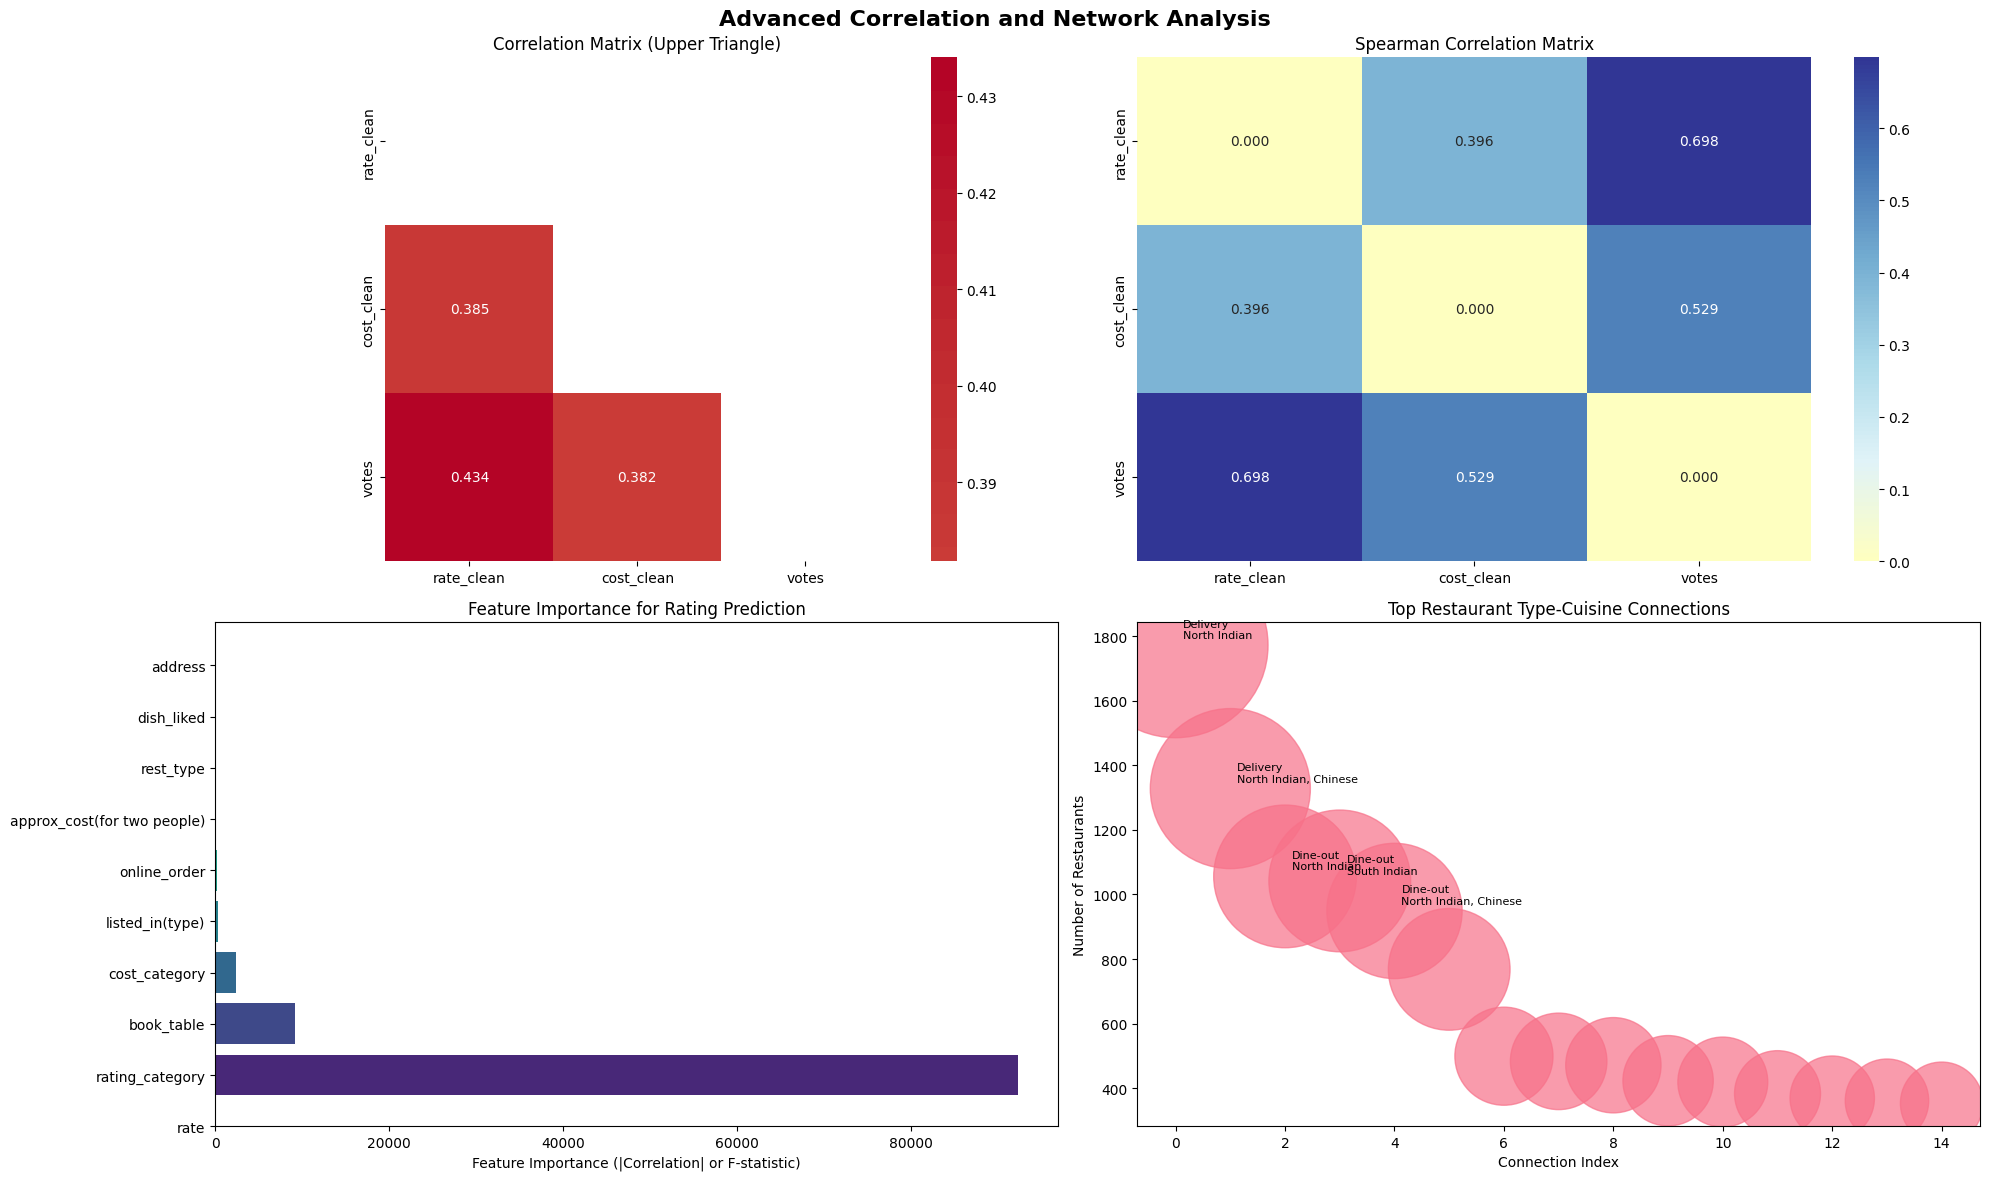

Pearson Correlation Results:
  rate_clean vs cost_clean: 0.385 *** (p=0.000e+00)
  rate_clean vs votes: 0.434 *** (p=0.000e+00)
  cost_clean vs votes: 0.382 *** (p=0.000e+00)

Top 5 Most Important Features for Rating:
  1. rate: inf
  2. rating_category: 92249.051
  3. book_table: 9164.840
  4. cost_category: 2378.993
  5. listed_in(type): 316.866

Top 5 Restaurant Type-Cuisine Connections:
  1. Delivery + North Indian: 1772 restaurants
  2. Delivery + North Indian, Chinese: 1328 restaurants
  3. Dine-out + North Indian: 1056 restaurants
  4. Dine-out + South Indian: 1042 restaurants
  5. Dine-out + North Indian, Chinese: 949 restaurants


In [54]:

fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Advanced Correlation and Network Analysis', fontsize=16, fontweight='bold')
numeric_cols = ['rate_clean', 'cost_clean', 'votes']
correlation_matrix = df[numeric_cols].corr()

p_values = np.zeros((len(numeric_cols), len(numeric_cols)))
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        if i != j:
            valid_data = df[numeric_cols[i]].dropna()
            valid_data2 = df[numeric_cols[j]].dropna()
            
            common_index = valid_data.index.intersection(valid_data2.index)
            if len(common_index) > 0:
                aligned_data1 = valid_data.loc[common_index]
                aligned_data2 = valid_data2.loc[common_index]
                
                if len(aligned_data1) > 1:  
                    corr, p_val = pearsonr(aligned_data1, aligned_data2)
                    p_values[i, j] = p_val
                else:
                    p_values[i, j] = np.nan
            else:
                p_values[i, j] = np.nan

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
           ax=axes[0, 0], fmt='.3f', square=True)
axes[0, 0].set_title('Correlation Matrix (Upper Triangle)')
spearman_corr = np.zeros((len(numeric_cols), len(numeric_cols)))
for i in range(len(numeric_cols)):
    for j in range(len(numeric_cols)):
        if i != j:
            valid_data = df[numeric_cols[i]].dropna()
            valid_data2 = df[numeric_cols[j]].dropna()
            
            common_index = valid_data.index.intersection(valid_data2.index)
            if len(common_index) > 0:
                aligned_data1 = valid_data.loc[common_index]
                aligned_data2 = valid_data2.loc[common_index]
                
                if len(aligned_data1) > 1:
                    corr, _ = spearmanr(aligned_data1, aligned_data2)
                    spearman_corr[i, j] = corr
                else:
                    spearman_corr[i, j] = np.nan
            else:
                spearman_corr[i, j] = np.nan

spearman_df = pd.DataFrame(spearman_corr, index=numeric_cols, columns=numeric_cols)
sns.heatmap(spearman_df, annot=True, cmap='RdYlBu', center=0, ax=axes[0, 1], fmt='.3f')
axes[0, 1].set_title('Spearman Correlation Matrix')

feature_importance = {}
for col in df.columns:
    if col != 'rate_clean' and df[col].dtype in ['object', 'category']:
        groups = [df[df[col] == val]['rate_clean'].dropna() for val in df[col].unique()]
        groups = [group for group in groups if len(group) > 0]
        if len(groups) >= 2:
            try:
                f_stat, p_val = stats.f_oneway(*groups)
                feature_importance[col] = abs(f_stat) if not np.isnan(f_stat) else 0
            except:
                feature_importance[col] = 0
        else:
            feature_importance[col] = 0
    elif col != 'rate_clean' and df[col].dtype in ['int64', 'float64']:
        valid_data = df[[col, 'rate_clean']].dropna()
        if len(valid_data) > 1:
            corr = abs(valid_data[col].corr(valid_data['rate_clean']))
            feature_importance[col] = corr if not np.isnan(corr) else 0
        else:
            feature_importance[col] = 0

feature_importance = dict(sorted(feature_importance.items(), key=lambda x: x[1], reverse=True))

top_features = list(feature_importance.keys())[:10]
top_importance = list(feature_importance.values())[:10]

bars = axes[1, 0].barh(range(len(top_features)), top_importance, 
                      color=plt.cm.viridis(np.linspace(0, 1, len(top_features))))
axes[1, 0].set_yticks(range(len(top_features)))
axes[1, 0].set_yticklabels(top_features)
axes[1, 0].set_xlabel('Feature Importance (|Correlation| or F-statistic)')
axes[1, 0].set_title('Feature Importance for Rating Prediction')

type_cuisine_network = df.groupby(['listed_in(type)', 'cuisines']).size().reset_index(name='count')
type_cuisine_network = type_cuisine_network[type_cuisine_network['count'] >= 3]  

top_connections = type_cuisine_network.nlargest(15, 'count')

axes[1, 1].scatter(range(len(top_connections)), top_connections['count'], 
                  s=top_connections['count']*10, alpha=0.7, cmap='plasma')
axes[1, 1].set_xlabel('Connection Index')
axes[1, 1].set_ylabel('Number of Restaurants')
axes[1, 1].set_title('Top Restaurant Type-Cuisine Connections')

for i, (_, row) in enumerate(top_connections.head(5).iterrows()):
    axes[1, 1].annotate(f"{row['listed_in(type)']}\n{row['cuisines']}", 
                       (i, row['count']), xytext=(5, 5), textcoords='offset points', 
                       fontsize=8, ha='left')

plt.tight_layout()
plt.show()

print("Pearson Correlation Results:")
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i < j:
            corr = correlation_matrix.loc[col1, col2]
            p_val = p_values[i, j]
            if not np.isnan(p_val):
                significance = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
                print(f"  {col1} vs {col2}: {corr:.3f} {significance} (p={p_val:.3e})")
            else:
                print(f"  {col1} vs {col2}: {corr:.3f} (insufficient data)")

print(f"\nTop 5 Most Important Features for Rating:")
for i, (feature, importance) in enumerate(list(feature_importance.items())[:5]):
    print(f"  {i+1}. {feature}: {importance:.3f}")

print(f"\nTop 5 Restaurant Type-Cuisine Connections:")
for i, (_, row) in enumerate(top_connections.head(5).iterrows()):
    print(f"  {i+1}. {row['listed_in(type)']} + {row['cuisines']}: {row['count']} restaurants")